<a href="https://colab.research.google.com/github/pathakchiranjit/Capstone_CDF_April21/blob/main/1004_CDF_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Capstone Group Project (CDF) - **Consulting Assignments**

Telecom operators are waging a war for connectivity and customer intimacy. Being a consultanting group, we have analyzed the user data of **InsaidTelecom** and helping them to better understand their customers, build superior networks, find a sustainable path to growth and achieve cost leadership while maintaining a high-performance organization.

<img src="https://github.com/pathakchiranjit/Capstone_CDF_April21/blob/main/Picture/it-consulting-min.gif?raw=true" align='left'><br/>

### Behavioural analysis of **InsaidTelecom** users

**InsaidTelecom**, one of the leading telecom players, understands that customizing offering is very important for its business to stay competitive.
Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India to help its clients better understand and interact with their audiences.

<img src="https://github.com/pathakchiranjit/Capstone_CDF_April21/blob/main/Picture/Telecom-Industry.jpg?raw=true" align='left'><br/>


### **Data Sources I**:

The Data is collected from mobile apps that use **InsaidTelecom** services. Full recognition and consent from individual user of those apps have been obtained and appropriate anonymization have been performed to protect privacy. Due to confidentiality, **InsaidTelecom** won't provide details on how the gender and age data was obtained.

The data schema can be represented in the following Table:
1.gender_age_train - Devices and their respective user gender, age and age_group.
2.phone_brand_device_model - device ids, brand, and models phone_brand.

These datasets are being downloaded from MySQL instance.          
host	'cpanel.insaid.co'
user	'student'
passwd	'student'
database	'Capstone1'

<img src="https://github.com/pathakchiranjit/Capstone_CDF_April21/blob/main/Picture/device_id_6.jpg?raw=true" align='left'><br/>

### **Data Source II**:

"events_data" - when a user uses mobile on **InsaidTelecom** network, the event gets logged in this data.
Each event has an event id, device id, location (lat/long), and the event corresponds to frequency of mobile usage.
timestamp: when the user is using the mobile.

This dataSet for events_data downloaded from:
https://drive.google.com/file/d/1Ir3rW0YTKmk7MSjVjCU_UGMQevhe1v9W/view

<img src="https://github.com/pathakchiranjit/Capstone_CDF_April21/blob/main/Picture/device_id_2.jpg?raw=true" align='left'><br/>

### **What is a Device Id**:
Device Ids are basically mobile device identifiers. They are unique strings of letters or/and numbers. These identifiers connect apps with specific servers and they are obtained after the app was installed on customers’ gadgets. Using them we can track users based on the data sent by their smartphone or tablet. Obviously, due to customers’ privacy regulations we can do that if and only if they allow us to access that data. When users opt in for being followed by marketers, great things can happen for both parties implied in the process. The device IDs send the information from users towards apps.

<img src="https://github.com/pathakchiranjit/Capstone_CDF_April21/blob/main/Picture/device_id_1.jpg?raw=true" align='left'><br/>




### **How To Use Device IDs for efficient marketing strategy?**:
One of the major disadvantages of these identifiers is that they require users’ approval for gathering data. But for those who offer their consent, mobile IDs represent a very efficient way for customizing ads/services based on customers’ interests. Because device IDs can be tracked inside apps, they allow app owners to learn more about their users’ preferences when it comes to analyze their creation. This information is also very important whenever they want to update the app. It gives a considerable advantage over other competitors who don’t pay attention to this technique. For maintaining the highest standards and to impress customers while they complete the activities inside the app service providers can benefit of this real time opportunity.

<img src="https://github.com/pathakchiranjit/Capstone_CDF_April21/blob/main/Picture/device_id_3.png?raw=true" align='left'><br/>




## Table of Contents

1. [Objective: Problem Statement](#section1)<br>
2. [Tools: Importing Packages](#section2)<br>
3. [Collecting & Loading Data](#section3)<br>
  - 3.1 [Collect data from Google drive:](#section301)<br>
  - 3.2 [Collect data from MySQL Instances:](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Checking the occurance of the missig data:](#section401)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Data Processing:**](#section501)<br>
  - 5.2 [**Total Event Analysis:**](#section502)<br>
  - 5.3 [**Unique Event Analysis:**](#section503)<br>
      - 5.3.1 [Statewise Distribution Analysis:](#section50301)<br>
      - 5.3.2 [City and Brand wise Distribution Analysis:](#section50302)<br>
      - 5.3.3 [Distribution of Users across Gender, Age, Time and Day:](#section50303)<br>
      - 5.3.4 [Distribution of user city and state wise:](#section50304)<br>
      - 5.3.5 [Distribution of Gender for each State, Age segment, Phone brand:](#section50305)<br>
      - 5.3.6 [Summary: Correlation among all the columns:](#section50305)<br>
6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)
  - 6.2 [Limitation of this study](#section602)

### **Weekly Goals for the team?**:
The DS consultant team will follow the below week-wise goals,

<img src="https://github.com/pathakchiranjit/Capstone_CDF_April21/blob/main/Picture/image1.png?raw=true" align='left'><br/>

<a id=section1></a>
## 1. Problem Statement





Based on **user demographic & phone model data** and **service usage data** in **India**, **how can InsaidTelecom customizes** their **offerings** and **plan their way forward** in the future ?

<a id=section2></a>
## 2. Tools : Importing packages:





In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
!pip install mysql-connector-python-rf

In [ ]:
!pip install folium

In [ ]:
import pandas as pd
import numpy as np
import folium
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
# Defining the function to plot the data on Map for latitude and longitude
def plot_on_map(data_to_map):
    center = [data_to_map.iloc[0]['latitude'], data_to_map.iloc[0]['longitude']]
    map_India = folium.Map(location=center, zoom_start=4)
    #count = 0;
    for index, phone_loc in data_to_map.iterrows():
        #print(phone_loc['latitude'], franchise['longitude'])
        #count = count + 1
        location = [phone_loc['latitude'], phone_loc['longitude']]
        folium.Marker(location, popup = f'City:{phone_loc["city"]}').add_to(map_India)
    return map_India

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns                                       
%matplotlib inline
sns.set()
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50 
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
!pip install plotly==4.13.0

In [ ]:
import plotly.express as px

In [ ]:
import plotly.graph_objs as go

<a id=section3></a>
## 3. Collection & Loading data:





### Collect data from Google drive:

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'XXXXXXXXXXXX'})  #'XXXXXXXX' to be found out from file link in gdrive

In [ ]:
fileDownloaded.GetContentFile('project_cdf.csv')

In [ ]:
import pandas as pd
import numpy as np
project_df = pd.read_csv('project_cdf.csv', delimiter=',',dtype={'device_id':np.str})
project_df.head()

**Observation:**
"event_data" contains event_id,device_id, timestamp, longitude , latitude, city and state of the usage

### Collect data from MySQL Instances:

In [ ]:
import mysql.connector
try:
    connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student')

    sql_select_Query = "select * from gender_age_train"
    cursor = connection.cursor()
    cursor.execute(sql_select_Query)
    # get all records
    records = cursor.fetchall()
    print("Total number of rows in table: ", cursor.rowcount)
except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
finally:
    if connection.is_connected():
        connection.close()
        cursor.close()
        print("MySQL connection is closed")

In [ ]:
df = pd.DataFrame(records)
df.tail(10)

In [ ]:
df.reset_index()
df.columns=['device_id', 'gender','age','age_group']
df.head(5)

**Observation:**
"gender_age_train" contains device_id, gender, age and age group of the user

In [ ]:
import mysql.connector
try:
    connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student')

    sql_select_Query = "select * from phone_brand_device_model"
    cursor = connection.cursor()
    cursor.execute(sql_select_Query)
    # get all records
    records1 = cursor.fetchall()
    print("Total number of rows in table: ", cursor.rowcount)
   
except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
finally:
    if connection.is_connected():
        connection.close()
        cursor.close()
        print("MySQL connection is closed")

In [ ]:
df1 = pd.DataFrame(records1)
df1.tail(10)

In [ ]:
df1.reset_index()
df1.columns=['device_id', 'brand','model']
df1.head(5)

**Observation:**
"phone_brand_device_model" contains device_id, brand and model of the devices being used.

Some of the brand & model names are in chinese language which needs to be translated for easy use.

<a id=section4></a>
## 4. Data Pre-processing:





In [ ]:
a = df1.model.unique()

In [ ]:
for i in range(len(a)):
  print("'{}',".format(a[i]))

'Y13',
'V183',
'R7s',
'A368t',
'红米Note2',
'红米Note3',
'S5.1',
'Galaxy Grand Prime',
'MI 2S',
'Galaxy Note 2',
'R1C',
'大神F1Plus',
'note顶配版',
'Galaxy Mega 2',
'星星1号',
'Galaxy S4',
'MI 3',
'Find 7',
'C8816',
'红米note',
'X6 L',
'Galaxy Win',
'青春版',
'MX3',
'Y35',
'G520-5000',
'荣耀4A',
'魅蓝Note 2',
'Y560-CL00',
'荣耀7i',
'3000',
'荣耀畅玩4C',
'C730Lw',
'红米2A',
'A1',
'One',
'Galaxy J7',
'R3',
'MX2',
'荣耀畅玩5',
'荣耀7',
'MI 4',
'One M8',
'红米1S',
'麦芒4',
'Galaxy S6 Edge',
'A3800d',
'P780',
'Ascend G7',
'荣耀6',
'Xperia SL',
'Y17T',
'荣耀畅玩4X',
'Ascend P7',
'Galaxy Grand 2',
'荣耀3X畅玩版',
'荣耀X2',
'Ascend P8',
'R2017',
'魅蓝NOTE',
'Mate 2',
'M8',
'T87+',
'X710L',
'A890e',
'R7',
'X5M',
'MX5',
'Galaxy Mega 5.8',
'L81',
'Xperia Z1',
'荣耀6 Plus',
'X5Max+',
'Galaxy J5',
'Galaxy Note 4',
'A31',
'GN706L',
'G3',
'P8 Lite',
'Sensation XE with Beats Audio Z715e',
'A880',
'荣耀+',
'X5L',
'8720L',
'IVO 6655',
'R7 Plus',
'荣耀畅玩4',
'MX4',
'Y635-TL00',
'Galaxy S3',
'X3L',
'3',
'R807',
'黄金斗士A8',
'One X',
'小米note',
'R6007',
'Galaxy S2 Plus'

**Translation:**
All brand & model unique names are being translated to english from chinese using google translator.

In [ ]:
model={'model':['Y13',
'V183',
'R7s',
'A368t',
'红米Note2',
'红米Note3',
'S5.1',
'Galaxy Grand Prime',
'MI 2S',
'Galaxy Note 2',
'R1C',
'大神F1Plus',
'note顶配版',
'Galaxy Mega 2',
'星星1号',
'Galaxy S4',
'MI 3',
'Find 7',
'C8816',
'红米note',
'X6 L',
'Galaxy Win',
'青春版',
'MX3',
'Y35',
'G520-5000',
'荣耀4A',
'魅蓝Note 2',
'Y560-CL00',
'荣耀7i',
'3000',
'荣耀畅玩4C',
'C730Lw',
'红米2A',
'A1',
'One',
'Galaxy J7',
'R3',
'MX2',
'荣耀畅玩5',
'荣耀7',
'MI 4',
'One M8',
'红米1S',
'麦芒4',
'Galaxy S6 Edge',
'A3800d',
'P780',
'Ascend G7',
'荣耀6',
'Xperia SL',
'Y17T',
'荣耀畅玩4X',
'Ascend P7',
'Galaxy Grand 2',
'荣耀3X畅玩版',
'荣耀X2',
'Ascend P8',
'R2017',
'魅蓝NOTE',
'Mate 2',
'M8',
'T87+',
'X710L',
'A890e',
'R7',
'X5M',
'MX5',
'Galaxy Mega 5.8',
'L81',
'Xperia Z1',
'荣耀6 Plus',
'X5Max+',
'Galaxy J5',
'Galaxy Note 4',
'A31',
'GN706L',
'G3',
'P8 Lite',
'Sensation XE with Beats Audio Z715e',
'A880',
'荣耀+',
'X5L',
'8720L',
'IVO 6655',
'R7 Plus',
'荣耀畅玩4',
'MX4',
'Y635-TL00',
'Galaxy S3',
'X3L',
'3',
'R807',
'黄金斗士A8',
'One X',
'小米note',
'R6007',
'Galaxy S2 Plus',
'R1',
'荣耀3C',
'小米4C',
'R823T',
'Mate 7',
'MI 2',
'F2',
'Galaxy S5',
'Xperia TX',
'Galaxy Trend DUOS 2',
'Z1',
'Y11IT',
'红米note增强版',
'天鉴W900',
'Ascend G700T',
'Galaxy Note 3',
'Galaxy R',
'F301',
'荣耀畅玩5X',
'N1 Mini',
'Find 5',
'红米2',
'X5Pro',
'X5V',
'A11',
'MI pad',
'Z7 Mini',
'Galaxy Note 5',
'MediaPad M2-801W',
'Galaxy Grand Neo Plus',
'Ascend GX1',
'R817',
'X3T',
'Galaxy E7',
'X817',
'GN700W',
'Y20T',
'A680',
'Y27',
'5891',
'大神F1',
'UIMI3',
'Compaq 7',
'G628',
'IVO 6622',
'B199',
'Galaxy Trend 3',
'X1ST',
'S7568I',
'C8818',
'Y622',
'魅蓝2',
'Mate 7 青春版',
'1107',
'Galaxy S2',
'乐檬K3 Note',
'Galaxy S4 Zoom',
'Galaxy Ace Dear',
'火星一号',
'乐檬K3',
'Ascend P1',
'R831T',
'M9',
'U9508',
'X5Max',
'2',
'X8888',
'联想黄金斗士S8',
'S60t',
'大神F2',
'Xplay3S',
'R1S',
'Y60-C1',
'Nexus 5',
'UIMI4',
'R809T',
'Q507T',
'Moto X Style',
'A788t',
'魅蓝',
'Y13iL',
'荣耀6 plus',
'G610S',
'N1T',
'X1 7.0',
'Y613F',
'Galaxy A7',
'N1',
'Y23L',
'大神F2全高清版',
'灵感XL',
'旗舰版',
'Y927',
'Z9 mini',
'X3S',
'Y15',
'R831S',
'R815T',
'R819T',
'Galaxy Core Prime',
'Butterfly',
'Galaxy Style DUOS',
'Xperia S',
'Galaxy Note 3 Lite',
'P6',
'S7',
'Galaxy S6',
'坚果手机',
'M210',
'S7I',
'A51',
'X907',
'红米',
'Y33',
'超级手机1 Pro',
'Galaxy Grand DUOS',
'Xperia Z5',
'G620-L75',
'畅享5',
'Xplay',
'MX4 Pro',
'Galaxy S6 Edge+',
'8185',
'G3588V',
'Y937',
'T528t',
'Galaxy A8',
'N3',
'G610T',
'S7T',
'V5 Max',
'MI One Plus',
'S90-t',
'Xperia Z3 mini',
'8105',
'7270-W00',
'M8St',
'Desire 820',
'A750',
'S898t',
'魅蓝metal',
'P970',
'Galaxy Mega 6.3',
'5890',
'Z9 Max',
'PRO5',
'X5SL',
'Y29L',
'E602T',
'GN150',
'8190Q',
'E620M',
'超级手机1',
'8702D',
'Galaxy Grand',
'Galaxy Note',
'U960E',
'Grand X',
'Xperia arc S',
'T708',
'X',
'T50',
'GN128',
'超级手机1s',
'L700T',
'Galaxy A5',
'F103S',
'5951',
'H1',
'A820',
'G7200',
'荣耀U8860',
'纽扣',
'LT01',
'Y11',
'Y635',
'荣耀畅玩平板T1',
'Xperia Neo',
'G7 Plus',
'Y13L',
'HT-I860',
'8056',
'EVO 3D X515m',
'红辣椒 X1',
'Galaxy A3',
'春雷HD',
'Galaxy S2 HD LTE E120S',
'L5Pro',
'ivvi 小i',
'荣耀畅玩4C运动版',
'麦芒3',
'Ascend G700',
'小鲜2',
'Nexus 4',
'R827T',
'G520-0000',
'Ascend P6',
'ELIFE E3T',
'大器2',
'5950',
'Q519T',
'Galaxy Tab P6800',
'A398t',
'锋尚',
'Z5S',
'Y511-T00',
'MI One C1',
'8085q',
'A3900',
'M4',
'L1 mini',
'V188S',
'大神X7',
'Grand X Quad',
'A320t',
'G2',
'Galaxy Core Advance',
'Y28L',
'Y22IL',
'小苹果',
'SHV-E210L',
'乐玩',
'F103',
'Y928',
'Galaxy Ace 3',
'R821T',
'大神Note3',
'MI 2A',
'Moto X',
'Y321C',
'Xperia Z2',
'I9118',
'8750',
'K860i',
'G730-C00',
'A708t',
'A670t',
'S658t',
'Galaxy On7',
'Desire 820 Mini',
'Galaxy Ace',
'T1',
'A33',
'603e',
'LT416',
'G11',
'S7568',
'T528w',
'6607',
'么么哒3N',
'8730L',
'M2',
'Y11IW',
'W2015',
'锋尚Pro',
'R830',
'ELIFE S5.5',
'Q505T',
'9190l',
'Galaxy Note Edge',
'Touch 2C',
'红辣椒',
'X3F',
'Y913',
'Galaxy Trend DUOS',
'Optimus G',
'7296',
'R5',
'M512',
'Galaxy On5',
'7105',
'Galaxy S3 Neo+',
'G520-T10',
'VIBE X',
'Mate 8',
'S1',
'MI 1S',
'5263',
'S2y',
'A369',
'Grand Memo 2',
'G750-T20',
'Y923',
'M032',
'R8205',
'A688t',
'荣耀3X',
'三星big foot',
'Touch 2',
'Galaxy Premier',
'Y37',
'U956',
'S810t',
'HN3-U01',
'S650',
'L128',
'IPH8',
'荣耀3C畅玩版',
'1100',
'S5830I',
'X6 Plus D',
'G606',
'B9388',
'Desire 826',
'A5800-D',
'Galaxy Core Lite',
'MI pad 2',
'A360t',
'SM-T705C',
'G4',
'ono',
'Find',
'Galaxy Core Max',
'ivvi 小骨Pro',
'A53',
'G718C',
'红辣椒XM',
'V5S',
'3007',
'D800',
'X6 Plus',
'S12',
'I779',
'Y1',
'远航3',
'My 布拉格',
'Y18L',
'Blade S6 Lux',
'H1S',
'GN715',
'metal 标准版',
'U879',
'Desire 7088',
'U930HD',
'Galaxy Note 10.1',
'G3818',
'畅享5S',
'U701',
'X6 D',
'MediaPad M2-803L',
'Blade A1',
'Galaxy Nexus',
'Desire 610t',
'Y19T',
'红辣椒Note',
'锋尚Max',
'Galaxy S L',
'2016版 Galaxy A9',
'Galaxy S3 Mini',
'GN152',
'Desire 816',
'VIBE X2',
'A516',
'S7898',
'红牛V5',
'Moto X Pro',
'Y13T',
'2016版 Galaxy A5',
'S11T',
'VIBE Z2',
'A7',
'7270',
'S6',
'Xperia C',
'7295',
'锋尚2',
'V4',
'M5',
'H5',
'R833T',
'Grand S 2',
'G510',
'C8817E',
'5263S',
'Y22L',
'S820',
'Y51',
'金钢',
'T329t',
'7298D',
'野火S',
'Galaxy J3',
'iPh-800',
'C8815',
'P335M',
'S5.5L',
'1105',
'8729',
'T328w',
'Xperia Z',
'W2014',
'Galaxy Mega Plus',
'G660-L075',
'5200S',
'Y613',
'Mate S',
'A298t',
'Galaxy Tab 3 8.0',
'T20L',
'U880F1',
'2016版 Galaxy A7',
'X8T',
'Two',
'N1 max',
'红米3',
'R820',
'小辣椒 X3',
'L920',
'One S',
'Ulike2',
'A376',
'8029',
'U707T',
'Galaxy Win Pro',
'Z5S Mini',
'ZenFone Max',
'E601M',
'GN708T',
'Xperia C3',
'I8268',
'Galaxy Tab 3 10.1',
'ZenFone 2',
'荣耀平板T1-823L',
'Y600D',
'S2L',
'Galaxy Tab 2 P3100',
'8122',
'Y518-T00',
'V819 3G',
'D2-M',
'A580',
'U3',
'S720',
'Xperia acro S',
'X3V',
'GN151',
'X6',
'5891Q',
'5956',
'P316L',
':UOOGOUT1',
'Y516',
'C8816D',
'7269',
'Galaxy S7 Edge',
'U11',
'SOP M3',
'A828t',
'Y3T',
'大神Note',
'7295C',
'A850',
'U705T',
'A390',
'Galaxy Tab P3108',
'A789',
'E1T',
'A2800d',
'7295A青春版',
'MI 2C',
'M031',
'C8813',
'A199',
'795+',
'E6',
'802w',
'Xperia T',
'D500',
'5219',
'R813T',
'D350',
'8190',
'7231',
'A678t',
'Galaxy Note 8.0',
'A380t',
'A820t',
'7372',
'X1',
'E1',
'X1S',
'8195',
'MT1-U06',
'Y600-U00',
'S890',
'HS-U978',
'H7',
'Y320',
'Xperia P',
'Galaxy Ace 2',
'S920',
'Q705U',
'U817',
'T2',
'S9',
'V719',
'A356',
'EG939',
'A388t',
'R811',
'V1',
'L22',
'8720',
'S850t',
'S3+',
'V182',
'M100',
'P770',
'iSuper S2',
'A798t',
'T9',
'C8813Q',
'EG978',
'Galaxy S Advance',
'7620l',
'8702',
'MI 4S',
'8705',
'T29',
'Y17W',
'K68w',
'Xshot',
'Ascend G6',
'G730-T00',
'GN700T',
'大Q Note',
'P880',
'X50TS',
'M811',
'X68T',
'A390t',
'X6666',
'Y618-T00',
'ZenFone 5',
'IdeaTab A5000-E',
'Galaxy Ace Plus',
'M1',
'Galaxy Tab S T705C',
'Galaxy Tab 4 T231',
'G730-U00',
'U809',
'MI 5',
'V8',
'VIBE Z',
'XL',
'MOMO9',
'M310',
'Galaxy Core Mini',
'GN5001S',
'么么哒',
'Y330',
'小辣椒 M2',
'IVO 6600',
'黄金斗士Note8',
'Galaxy Trend 2',
'Mate',
'7295+',
'7320',
'U930',
'Y300',
'U7',
'A660',
'T3',
'P308L',
'U969',
'Xperia Z Ultra',
'T91',
'炫影S+',
'Galaxy Tab 7.0 Plus',
'M701',
'A658t',
'Moto G',
'P331M',
'P700i',
'N798+',
'7235',
'Galaxy S4 Active',
'E7',
'Xperia Z3',
'S720i',
'TAB 2 A7-30',
'P1',
'8085n',
'S5300',
'V987',
'Grand Memo',
'K1',
'L7',
'P520L',
'P700',
'Galaxy S4 Mini',
'风华3',
'Xperia SP',
'V70',
'MT2-C00',
'Xperia ion',
'7268',
'5892',
'G521',
'M6-M7',
'TALK 7X四核',
'i9',
'V889D',
'iSuper S1',
'7236',
'T9108',
'MM1101',
'L810',
'Xperia T2 Ultra',
'U960S3',
'Touch 3',
'7230',
'Galaxy Gio',
'U9815',
'8012',
'A630t',
'V818',
'Galaxy J1',
'Galaxy Fame',
'A800',
'T958',
'A820e',
'A278t',
'N1W',
'Y500',
'U960S',
'9976A',
'GN100',
'X805',
'8295M',
'C8817L',
'A505e',
'8198T',
'GN137',
'U51GT-W',
'K900',
'ME371MG',
'A520',
'J738M',
'A766',
'5860A',
'R9',
'S696',
'9180',
'S868t',
'TALK 9X',
'Optimus LTE',
'G615-U10',
'A830',
'Galaxy Core 4G',
'Y511-U00',
'V185',
'2016版 Galaxy J7',
'Y80D',
'天鉴T1',
'G716',
'Galaxy W',
'R830S',
'Y22',
'A850+',
'U795+',
'R8000',
'E5',
'GN9002',
'E6T',
'Galaxy J',
'5217',
'Z9',
'土星一号',
'W999',
'XT615',
'Y627',
'Vibe Z2 Pro',
'麦芒3S',
'8079',
'Q802T',
'W2013',
'BF T18',
'N910C',
'E912S',
'8295',
'L9',
'A770e',
'Q501U',
'SCH-I939',
'G6-U00',
'L1',
'E3',
'A698t',
'A765e',
'Xperia Z3+ Dual',
'A3000-H',
'Y623',
'G717C',
'飞马',
'T329d',
'T8620',
'S9T',
'3S',
'ivvi K1 mini',
'S5831I',
'联想VIBE X2',
'7296S',
'U966',
'A785e',
'T328t',
'T7',
'威武3',
'P8max',
'E70-T',
'E8',
'R9 Plus',
'P306C',
'One E8',
'Q503U',
'Galaxy S2 Epic 4G Touch',
'P9',
'201',
'Droid Ultra',
'T80',
'M812C',
'V955',
'3005',
'红辣椒任性版 Plus',
'L5 Plus',
'Galaxy Alpha',
'S938t',
'XT1060',
'U950',
'A2580',
'S899t',
'VS980',
'U980',
'C8650',
'S850',
'U2',
'Vibe Shot',
'Desire 626',
'X2',
'Z7 Max',
'Galaxy Mini',
'A750e',
'T619+',
'S7566',
'小辣椒 9',
'Galaxy Core 2',
'R805',
'GN305',
'C8812',
'A760',
'大观4',
'A399',
'超级手机Max',
'Galaxy K Zoom',
'R5s plus',
'P332U',
'N910U',
'星星2号',
'Blade S6',
'V956',
'雷霆战机',
'EG970',
'S5.1Pro',
'MI 1',
'X80HD',
'A858t',
'V526',
'Y628',
'G610C',
'R801',
'Y3100',
'Touch 3c',
'威武3C',
'F303',
'One max',
'5360',
'A560',
'8021',
'Galaxy Golden',
'I9050',
'7i',
'倾城L3',
'M20-T',
'E613M',
'G730-L075',
'Galaxy S Plus',
'8085',
'Z9 mini 精英版',
'小辣椒S1',
'8721',
'S686',
'S858t',
'P705',
'L8',
'小辣椒 5',
'G3609',
'E75T',
'Optimus G Pro',
'Galaxy Tab 3 Lite T111',
'R817T',
'T03锋至版',
'N909',
'乐玩2C',
'GN708W',
'C630Lw',
'VT898',
'One M9+',
'Nexus S',
'A7-30',
'S930',
'P70',
'C230w',
'Desire 616',
'7260',
'AxonMini',
'8712S',
'GT7',
'Galaxy Tab 4 T331C',
'One E9',
'么么哒3S',
'N1-Y',
'Y31',
'V5',
'乐檬K31',
'黄金斗士S8畅玩版',
'SM-T325',
'Galaxy Trend',
'IdeaTab A2207A-H',
'A318t',
'U807',
'XT910',
'A706',
'A330e',
'D520',
'K860',
'A8-50',
'SM-T2558',
'8295c',
'ELIFE E6 mini',
'A630',
'Grand Era',
'TL1000',
'Z5',
'S5000',
'C8813DQ',
'T9508',
'R2010',
'Q201T',
'N821',
'idol X',
'DROID RAZR',
'G6-C00',
'ELIFE E7 Mini',
'A5',
'Ascend D2',
'V967S',
'X5',
'GN168t',
'YOGA Tablet B6000',
'G3819D',
'Galaxy Tab 2 P5110',
'V6',
'Y320T',
'A288t',
'Touch V',
'时尚手机',
'A628t',
'OKU3',
'I8258',
'Galaxy Tab 3 7.0',
'Defy+',
'P301M',
'5872',
'V9',
'8732',
'8070',
'Galaxy Y',
'7060',
'S2',
'GT-I8160',
'T967',
'A3300-T',
'T5',
'Tab2 A7-10F',
'A308t',
'Galaxy Tab Pro T321',
'V975s Core4',
'Desire S',
'L168',
'R850',
'GN705T',
'7251',
'M601',
'U5482',
'S90-u',
'Xperia U',
'U880',
'D330',
'C986t',
'EV5',
'T528d',
'G630',
'A656',
'S660',
'T60',
'Y325',
'Q7',
'I95',
'8089',
'Galaxy S',
'5832',
'G525',
'Desire 310',
'EG966',
'V10',
'大神1s',
'GN135',
'S3',
'M10-M',
'A378t',
'A889',
's820e',
'5860S',
'8076D',
'8017',
'Butterfly s',
'M6',
'Xperia ZR ',
'608t',
'GN810',
'N986',
'Blade C',
'7019',
'N828',
'S880i',
'M030',
'G616-L076',
'A208t',
'GN139',
'VT898S',
'U939',
'Q301C',
'Galaxy Ace DUOS',
'A269i',
'GN878',
'One M8 Eye',
'A238t',
'VT868',
'A398t+',
'Q701C',
'TS1018',
'N818',
'T20',
'8707',
'S8-701u',
'Desire 5088',
'8017-T00',
'M8x',
'T327w',
'GN105',
'E600M',
'Xperia ZL',
'606w',
'MK260',
'memo 5S',
'Desire 609d',
'A3',
'Desire D516d',
'T8830Pro',
'HT-I717',
'A6800',
'I630T',
'T35',
'8713',
'Galaxy Tab S T800',
'E621T',
'Galaxy Grand Max',
'倾城L3C',
't789',
'U701T',
'Nexus 7',
'5218S',
'L70',
'M3',
'Q302C',
'U8825D',
'V919',
'One ME',
'Galaxy Infinite',
'Y220T',
'IVO 6688',
'Y610-U00',
'5216D',
'小辣椒 4',
'T820',
'X920e',
'L820',
'S939',
'Xperia Z1 炫彩版',
'T9003',
'微客',
'T21',
'V95',
'A860e',
'V188',
'S8-701w',
'S5Q',
'One M9',
'voga v1',
'MM1103',
'M535',
'5261',
'i1',
'idol3',
'G5',
'S5',
'T12',
'A2860',
'黄金斗士青春版',
'P8',
'802d',
'红辣椒NX Plus',
'A51kc',
'T004',
'BF A500',
'T1-821w',
'Sensation Z710E',
'小鲜3',
'小星星',
'M5 Plus',
'Galaxy Note 10.1 2014 Edition P601',
'Galaxy S DUOS',
'A355e',
'A30',
'TL500',
'Z5 Mini',
'BM001',
'A690',
'A68e',
'W619',
'GN106',
'GT-N8000',
'EG971',
'N880F',
'J320T',
'EG936D',
'Desire D516t',
'T929',
'I8250',
'A338t',
'T327t',
'N881F',
'GN180',
'5316',
'5930',
'S880',
'MC002',
'U819',
'JX8166',
'A300t',
'8717',
'9976D',
'Desire D316d',
'A805e',
'KDOOR X5-Y12',
'大器3',
'S960',
'X7',
'Desire HD',
'E602M',
'H2',
'78P01',
'A588t',
'T619',
'8150',
'LT02',
'M1L',
'U8',
'8712',
'2C',
'M201S',
'T90',
'M20-M',
'SM-T2556',
'M3S',
'S6-NT1',
'A3600d',
'X98 3G',
'小辣椒 6',
'A606',
'Q801L',
'P318L',
'S860e',
'T9600',
'T890',
'Galaxy Tab P7500',
'金刚II',
'F105',
'L108',
'A768t',
'D557',
'W800',
'VIBE P1',
'L100',
'R2',
'中兴远航3',
'C03',
'Axon天机',
'OKA51',
'A385e',
'Galaxy Tab 2 P5100',
'N880E',
'MediaPad 10 Link',
'XT1033',
'EG980',
'210R',
'U86',
'Doeasy E700',
'Q501T',
'Y310-T10',
'Y310-5000',
'S6T',
's800',
'GN108',
'K88L',
'U1',
'Z4',
'8076',
'5311',
'L930i',
'Xperia M2',
'P2',
'L820c',
'VT888',
'U81t',
'Xperia ZR',
'I630M',
'C8813D',
'青漾3',
'Xperia ray',
'GN9004',
'Galaxy Grand 2 LTE',
'5876',
'C8812+',
'D516w',
'D360',
'小辣椒 3',
'G629',
'P500M',
'GN800',
'N2',
'DM',
'I639T',
'PHAB Plus',
'Galaxy Tab 3 Lite T110',
'U968',
'Sonic+',
'P302C',
'Nexus 6P',
'7605',
'Y70-C',
'U808',
'T703',
'K23',
'旋影90w',
'V931',
'小辣椒 7',
'W700',
'H3',
'Tab2A7-20F',
'8736',
'Mos1',
'S8-50',
'5216s',
'W88',
'Ascend G330C',
'BM002',
'醉享',
'MAX3',
'L5 mini',
'渴望HD',
'A358t',
'N919D',
'5879',
'E913',
'V981',
'小辣椒 M3',
'Galaxy Tab S T805C',
'Desire V',
'I635T',
'E99',
'X6088',
'Optimus G Pro 2',
'A500',
'5310',
'7275',
'P501M',
'P518L',
'E260-T',
'U818',
'P502U',
'I900',
'U880S',
'飞马3',
'7061',
'BM002-G5',
'P360W',
'P21',
'E968',
'HT-I857',
'Y523-L176',
'领世旗舰3',
'K80',
'Galaxy Ace 4',
'L82',
'Moto X 3',
'小辣椒X4',
'V880',
'i600',
'U889',
'F320L',
'K012',
'U55GT',
'Xperia Z5 Premium',
'A375e',
'302U',
'T00G',
'L823',
'C666t',
'EG929',
'MediaPad M1',
'W6618',
'A590',
'a218t',
'E956Q',
'S300',
'A3500',
'E50-T',
'GN705',
'BM003',
'A780',
'D1',
'Q3C',
'A360e',
'P305',
'F1',
'LT988',
'5313S',
'红辣椒Note3',
'Galaxy S7',
'Xplay5',
'Desire 816x',
'S668t',
'T9608',
'IdeaTab A1010-T',
'W700+',
'5200',
'F240S',
'M15',
'T928',
'Q805T',
'U970',
'A396',
'S90-e',
'天鉴W808',
'J636D+',
'V923',
'T13',
'P51',
'X10i',
'E820',
'GN5002',
'G9',
'P9 Plus',
'A328t',
'8715',
'U880E',
'天鉴W900S',
'One A9',
'8722',
'V889M',
'T780+',
'N919',
'Galaxy Core',
'U793',
'L855',
'T9500',
'P3',
'大观铂顿',
'S560',
'Xperia J',
'A3890',
'G610M',
'魅蓝Note3',
'Hol-U10',
'Q509T',
'XT928',
'X18',
'A630e',
'MM1104',
'I7',
'A380e',
'A65',
'U25GT',
'Razr V锋芒',
'T6',
'IVO 6666',
'Z7',
'S8-303L',
'9300-M9',
'V983',
'G730-U30',
'V701s Core4',
'A366t',
'V965T',
'ME7510KG',
'W2016',
'One X9',
'T328d',
'YOGA Tablet B8000',
'A100',
'C986t+',
'ZenFone Selfie',
'火星一号探索版',
'P596',
'S838M',
'IdeaTab A1000-T',
'G309T',
'A780e',
'DROID RAZR M',
'VIBE X2 Pro',
'Moto X极',
'A395e',
'Gigaset ME',
'Ascend D1',
'Galaxy Tab P1000',
'Find 3',
'U960',
'G620-L72',
'T918',
'U936',
'I699I',
'E622M',
'X80h',
'B8080-F',
'魔镜 X5',
'Moto Turbo',
'A1020',
'T860',
'S870e',
'小章鱼',
'Z1988',
'X98 Air 3G',
'King 7',
'King 7s',
'T621',
'Y320C',
'M228-M51',
'I6',
'Galaxy S DUOS 2',
'乐檬3',
'T89-2',
'm310',
'H6',
'乐檬X3',
'飞马2 Plus',
'Galaxy Tab S T705',
'IVO 8800',
'U59GT'], 
    'model_eng':['Y13',
'V183',
'R7s',
'A368t',
'Redmi Note2',
'Redmi Note3',
'S5.1',
'Galaxy Grand Prime',
'MI 2S',
'Galaxy Note 2',
'R1C',
'Great God F1Plus',
'note top version',
'Galaxy Mega 2',
'Star 1',
'Galaxy S4',
'MI 3',
'Find 7',
'C8816',
'Red rice note',
'X6 L',
'Galaxy Win',
'Youth Edition',
'MX3',
'Y35',
'G520-5000',
'Glory 4A',
'Charm Blue Note 2',
'Y560-CL00',
'Glory 7i',
'3000',
'Honor Play 4C',
'C730Lw',
'Redmi 2A',
'A1',
'One',
'Galaxy J7',
'R3',
'MX2',
'Honor Play 5',
'Glory 7',
'MI 4',
'One M8',
'Redmi 1S',
'Maimang 4',
'Galaxy S6 Edge',
'A3800d',
'P780',
'Ascend G7',
'Glory 6',
'Xperia SL',
'Y17T',
'Honor Play 4X',
'Ascend P7',
'Galaxy Grand 2',
'Honor 3X Play Edition',
'Glory X2',
'Ascend P8',
'R2017',
'Charm Blue NOTE',
'Mate 2',
'M8',
'T87+',
'X710L',
'A890e',
'R7',
'X5M',
'MX5',
'Galaxy Mega 5.8',
'L81',
'Xperia Z1',
'Honor 6 Plus',
'X5Max+',
'Galaxy J5',
'Galaxy Note 4',
'A31',
'GN706L',
'G3',
'P8 Lite',
'Sensation XE with Beats Audio Z715e',
'A880',
'Glory+',
'X5L',
'8720L',
'IVO 6655',
'R7 Plus',
'Honor Play 4',
'MX4',
'Y635-TL00',
'Galaxy S3',
'X3L',
'3',
'R807',
'Golden Fighter A8',
'One X',
'Xiaomi note',
'R6007',
'Galaxy S2 Plus',
'R1',
'Honor 3C',
'Millet 4C',
'R823T',
'Mate 7',
'MI 2',
'F2',
'Galaxy S5',
'Xperia TX',
'Galaxy Trend DUOS 2',
'Z1',
'Y11IT',
'Redmi note enhanced version',
'Tianjian W900',
'Ascend G700T',
'Galaxy Note 3',
'Galaxy R',
'F301',
'Honor Play 5X',
'N1 Mini',
'Find 5',
'Redmi 2',
'X5Pro',
'X5V',
'A11',
'MI pad',
'Z7 Mini',
'Galaxy Note 5',
'MediaPad M2-801W',
'Galaxy Grand Neo Plus',
'Ascend GX1',
'R817',
'X3T',
'Galaxy E7',
'X817',
'GN700W',
'Y20T',
'A680',
'Y27',
'5891',
'Great God F1',
'UIMI3',
'Compaq 7',
'G628',
'IVO 6622',
'B199',
'Galaxy Trend 3',
'X1ST',
'S7568I',
'C8818',
'Y622',
'Charm Blue 2',
'Mate 7 Youth Edition',
'1107',
'Galaxy S2',
'Lemon K3 Note',
'Galaxy S4 Zoom',
'Galaxy Ace Dear',
'Mars One',
'Lemon K3',
'Ascend P1',
'R831T',
'M9',
'U9508',
'X5Max',
'2',
'X8888',
'Lenovo Gold Fighter S8',
'S60t',
'Great God F2',
'Xplay3S',
'R1S',
'Y60-C1',
'Nexus 5',
'UIMI4',
'R809T',
'Q507T',
'Moto X Style',
'A788t',
'Charm Blue',
'Y13iL',
'Glory 6 plus',
'G610S',
'N1T',
'X1 7.0',
'Y613F',
'Galaxy A7',
'N1',
'Y23L',
'Great God F2 Full HD Version',
'Inspiration XL',
'Ultimate Edition',
'Y927',
'Z9 mini',
'X3S',
'Y15',
'R831S',
'R815T',
'R819T',
'Galaxy Core Prime',
'Butterfly',
'Galaxy Style DUOS',
'Xperia S',
'Galaxy Note 3 Lite',
'P6',
'S7',
'Galaxy S6',
'Nut Phone',
'M210',
'S7I',
'A51',
'X907',
'Red rice',
'Y33',
'Super Phone 1 Pro',
'Galaxy Grand DUOS',
'Xperia Z5',
'G620-L75',
'Enjoy 5',
'Xplay',
'MX4 Pro',
'Galaxy S6 Edge+',
'8185',
'G3588V',
'Y937',
'T528t',
'Galaxy A8',
'N3',
'G610T',
'S7T',
'V5 Max',
'MI One Plus',
'S90-t',
'Xperia Z3 mini',
'8105',
'7270-W00',
'M8St',
'Desire 820',
'A750',
'S898t',
'Charm blue metal',
'P970',
'Galaxy Mega 6.3',
'5890',
'Z9 Max',
'PRO5',
'X5SL',
'Y29L',
'E602T',
'GN150',
'8190Q',
'E620M',
'Super Phone 1',
'8702D',
'Galaxy Grand',
'Galaxy Note',
'U960E',
'Grand X',
'Xperia arc S',
'T708',
'X',
'T50',
'GN128',
'Super phone 1s',
'L700T',
'Galaxy A5',
'F103S',
'5951',
'H1',
'A820',
'G7200',
'Glory U8860',
'Button',
'LT01',
'Y11',
'Y635',
'Honor Play Tablet T1',
'Xperia Neo',
'G7 Plus',
'Y13L',
'HT-I860',
'8056',
'EVO 3D X515m',
'Red Pepper X1',
'Galaxy A3',
'Spring Thunder HD',
'Galaxy S2 HD LTE E120S',
'L5Pro',
'ivvi little i',
'Honor Play 4C Sports Edition',
'Maimang 3',
'Ascend G700',
'Xiao Xian 2',
'Nexus 4',
'R827T',
'G520-0000',
'Ascend P6',
'ELIFE E3T',
'Daqi 2',
'5950',
'Q519T',
'Galaxy Tab P6800',
'A398t',
'Feng Shang',
'Z5S',
'Y511-T00',
'MI One C1',
'8085q',
'A3900',
'M4',
'L1 mini',
'V188S',
'Great God X7',
'Grand X Quad',
'A320t',
'G2',
'Galaxy Core Advance',
'Y28L',
'Y22IL',
'Little Apple',
'SHV-E210L',
'Happy to play',
'F103',
'Y928',
'Galaxy Ace 3',
'R821T',
'Great God Note3',
'MI 2A',
'Moto X',
'Y321C',
'Xperia Z2',
'I9118',
'8750',
'K860i',
'G730-C00',
'A708t',
'A670t',
'S658t',
'Galaxy On7',
'Desire 820 Mini',
'Galaxy Ace',
'T1',
'A33',
'603e',
'LT416',
'G11',
'S7568',
'T528w',
'6607',
'Mameda 3N',
'8730L',
'M2',
'Y11IW',
'W2015',
'Fengshang Pro',
'R830',
'ELIFE S5.5',
'Q505T',
'9190l',
'Galaxy Note Edge',
'Touch 2C',
'Red chili',
'X3F',
'Y913',
'Galaxy Trend DUOS',
'Optimus G',
'7296',
'R5',
'M512',
'Galaxy On5',
'7105',
'Galaxy S3 Neo+',
'G520-T10',
'VIBE X',
'Mate 8',
'S1',
'MI 1S',
'5263',
'S2y',
'A369',
'Grand Memo 2',
'G750-T20',
'Y923',
'M032',
'R8205',
'A688t',
'Honor 3X',
'Samsung big foot',
'Touch 2',
'Galaxy Premier',
'Y37',
'U956',
'S810t',
'HN3-U01',
'S650',
'L128',
'IPH8',
'Honor 3C Play Edition',
'1100',
'S5830I',
'X6 Plus D',
'G606',
'B9388',
'Desire 826',
'A5800-D',
'Galaxy Core Lite',
'MI pad 2',
'A360t',
'SM-T705C',
'G4',
'ono',
'Find',
'Galaxy Core Max',
'ivvi Small Bone Pro',
'A53',
'G718C',
'Red Pepper XM',
'V5S',
'3007',
'D800',
'X6 Plus',
'S12',
'I779',
'Y1',
'Voyage 3',
'My Prague',
'Y18L',
'Blade S6 Lux',
'H1S',
'GN715',
'Metal Standard Edition',
'U879',
'Desire 7088',
'U930HD',
'Galaxy Note 10.1',
'G3818',
'Enjoy 5S',
'U701',
'X6 D',
'MediaPad M2-803L',
'Blade A1',
'Galaxy Nexus',
'Desire 610t',
'Y19T',
'Red Pepper Note',
'Feng Shang Max',
'Galaxy S L',
'2016 Galaxy A9',
'Galaxy S3 Mini',
'GN152',
'Desire 816',
'VIBE X2',
'A516',
'S7898',
'Red Bull V5',
'Moto X Pro',
'Y13T',
'2016 Galaxy A5',
'S11T',
'VIBE Z2',
'A7',
'7270',
'S6',
'Xperia C',
'7295',
'Feng Shang 2',
'V4',
'M5',
'H5',
'R833T',
'Grand S 2',
'G510',
'C8817E',
'5263S',
'Y22L',
'S820',
'Y51',
'Golden Steel',
'T329t',
'7298D',
'Wildfire S',
'Galaxy J3',
'iPh-800',
'C8815',
'P335M',
'S5.5L',
'1105',
'8729',
'T328w',
'Xperia Z',
'W2014',
'Galaxy Mega Plus',
'G660-L075',
'5200S',
'Y613',
'Mate S',
'A298t',
'Galaxy Tab 3 8.0',
'T20L',
'U880F1',
'2016 Galaxy A7',
'X8T',
'Two',
'N1 max',
'Redmi 3',
'R820',
'Little Pepper X3',
'L920',
'One S',
'Ulike2',
'A376',
'8029',
'U707T',
'Galaxy Win Pro',
'Z5S Mini',
'ZenFone Max',
'E601M',
'GN708T',
'Xperia C3',
'I8268',
'Galaxy Tab 3 10.1',
'ZenFone 2',
'Honor Tablet T1-823L',
'Y600D',
'S2L',
'Galaxy Tab 2 P3100',
'8122',
'Y518-T00',
'V819 3G',
'D2-M',
'A580',
'U3',
'S720',
'Xperia acro S',
'X3V',
'GN151',
'X6',
'5891Q',
'5956',
'P316L',
':UOOGOUT1',
'Y516',
'C8816D',
'7269',
'Galaxy S7 Edge',
'U11',
'SOP M3',
'A828t',
'Y3T',
'Great God Note',
'7295C',
'A850',
'U705T',
'A390',
'Galaxy Tab P3108',
'A789',
'E1T',
'A2800d',
'7295A Youth Edition',
'MI 2C',
'M031',
'C8813',
'A199',
'795+',
'E6',
'802w',
'Xperia T',
'D500',
'5219',
'R813T',
'D350',
'8190',
'7231',
'A678t',
'Galaxy Note 8.0',
'A380t',
'A820t',
'7372',
'X1',
'E1',
'X1S',
'8195',
'MT1-U06',
'Y600-U00',
'S890',
'HS-U978',
'H7',
'Y320',
'Xperia P',
'Galaxy Ace 2',
'S920',
'Q705U',
'U817',
'T2',
'S9',
'V719',
'A356',
'EG939',
'A388t',
'R811',
'V1',
'L22',
'8720',
'S850t',
'S3+',
'V182',
'M100',
'P770',
'iSuper S2',
'A798t',
'T9',
'C8813Q',
'EG978',
'Galaxy S Advance',
'7620l',
'8702',
'MI 4S',
'8705',
'T29',
'Y17W',
'K68w',
'Xshot',
'Ascend G6',
'G730-T00',
'GN700T',
'Big Q Note',
'P880',
'X50TS',
'M811',
'X68T',
'A390t',
'X6666',
'Y618-T00',
'ZenFone 5',
'IdeaTab A5000-E',
'Galaxy Ace Plus',
'M1',
'Galaxy Tab S T705C',
'Galaxy Tab 4 T231',
'G730-U00',
'U809',
'MI 5',
'V8',
'VIBE Z',
'XL',
'MOMO9',
'M310',
'Galaxy Core Mini',
'GN5001S',
'muah',
'Y330',
'Little Pepper M2',
'IVO 6600',
'Golden Fighter Note8',
'Galaxy Trend 2',
'Mate',
'7295+',
'7320',
'U930',
'Y300',
'U7',
'A660',
'T3',
'P308L',
'U969',
'Xperia Z Ultra',
'T91',
'Hyun Shadow S+',
'Galaxy Tab 7.0 Plus',
'M701',
'A658t',
'Moto G',
'P331M',
'P700i',
'N798+',
'7235',
'Galaxy S4 Active',
'E7',
'Xperia Z3',
'S720i',
'TAB 2 A7-30',
'P1',
'8085n',
'S5300',
'V987',
'Grand Memo',
'K1',
'L7',
'P520L',
'P700',
'Galaxy S4 Mini',
'Fenghua 3',
'Xperia SP',
'V70',
'MT2-C00',
'Xperia ion',
'7268',
'5892',
'G521',
'M6-M7',
'TALK 7X Quad Core',
'i9',
'V889D',
'iSuper S1',
'7236',
'T9108',
'MM1101',
'L810',
'Xperia T2 Ultra',
'U960S3',
'Touch 3',
'7230',
'Galaxy Gio',
'U9815',
'8012',
'A630t',
'V818',
'Galaxy J1',
'Galaxy Fame',
'A800',
'T958',
'A820e',
'A278t',
'N1W',
'Y500',
'U960S',
'9976A',
'GN100',
'X805',
'8295M',
'C8817L',
'A505e',
'8198T',
'GN137',
'U51GT-W',
'K900',
'ME371MG',
'A520',
'J738M',
'A766',
'5860A',
'R9',
'S696',
'9180',
'S868t',
'TALK 9X',
'Optimus LTE',
'G615-U10',
'A830',
'Galaxy Core 4G',
'Y511-U00',
'V185',
'2016 Galaxy J7',
'Y80D',
'Tianjian T1',
'G716',
'Galaxy W',
'R830S',
'Y22',
'A850+',
'U795+',
'R8000',
'E5',
'GN9002',
'E6T',
'Galaxy J',
'5217',
'Z9',
'Saturn One',
'W999',
'XT615',
'Y627',
'Vibe Z2 Pro',
'Maimang 3S',
'8079',
'Q802T',
'W2013',
'BF T18',
'N910C',
'E912S',
'8295',
'L9',
'A770e',
'Q501U',
'SCH-I939',
'G6-U00',
'L1',
'E3',
'A698t',
'A765e',
'Xperia Z3+ Dual',
'A3000-H',
'Y623',
'G717C',
'Pegasus',
'T329d',
'T8620',
'S9T',
'3S',
'ivvi K1 mini',
'S5831I',
'Lenovo VIBE X2',
'7296S',
'U966',
'A785e',
'T328t',
'T7',
'Mighty 3',
'P8max',
'E70-T',
'E8',
'R9 Plus',
'P306C',
'One E8',
'Q503U',
'Galaxy S2 Epic 4G Touch',
'P9',
'201',
'Droid Ultra',
'T80',
'M812C',
'V955',
'3005',
'Red Pepper Willful Edition Plus',
'L5 Plus',
'Galaxy Alpha',
'S938t',
'XT1060',
'U950',
'A2580',
'S899t',
'VS980',
'U980',
'C8650',
'S850',
'U2',
'Vibe Shot',
'Desire 626',
'X2',
'Z7 Max',
'Galaxy Mini',
'A750e',
'T619+',
'S7566',
'Little Pepper 9',
'Galaxy Core 2',
'R805',
'GN305',
'C8812',
'A760',
'Grand View 4',
'A399',
'Super Phone Max',
'Galaxy K Zoom',
'R5s plus',
'P332U',
'N910U',
'Star 2',
'Blade S6',
'V956',
'Thunder Fighter',
'EG970',
'S5.1Pro',
'MI 1',
'X80HD',
'A858t',
'V526',
'Y628',
'G610C',
'R801',
'Y3100',
'Touch 3c',
'Mighty 3C',
'F303',
'One max',
'5360',
'A560',
'8021',
'Galaxy Golden',
'I9050',
'7i',
'Allure L3',
'M20-T',
'E613M',
'G730-L075',
'Galaxy S Plus',
'8085',
'Z9 mini Elite Edition',
'Little Pepper S1',
'8721',
'S686',
'S858t',
'P705',
'L8',
'Little Pepper 5',
'G3609',
'E75T',
'Optimus G Pro',
'Galaxy Tab 3 Lite T111',
'R817T',
'T03 Feng Zhi Edition',
'N909',
'Lewan 2C',
'GN708W',
'C630Lw',
'VT898',
'One M9+',
'Nexus S',
'A7-30',
'S930',
'P70',
'C230w',
'Desire 616',
'7260',
'AxonMini',
'8712S',
'GT7',
'Galaxy Tab 4 T331C',
'One E9',
'Mameda 3S',
'N1-Y',
'Y31',
'V5',
'Lemon K31',
'Golden Fighter S8 Play Edition',
'SM-T325',
'Galaxy Trend',
'IdeaTab A2207A-H',
'A318t',
'U807',
'XT910',
'A706',
'A330e',
'D520',
'K860',
'A8-50',
'SM-T2558',
'8295c',
'ELIFE E6 mini',
'A630',
'Grand Era',
'TL1000',
'Z5',
'S5000',
'C8813DQ',
'T9508',
'R2010',
'Q201T',
'N821',
'idol X',
'DROID RAZR',
'G6-C00',
'ELIFE E7 Mini',
'A5',
'Ascend D2',
'V967S',
'X5',
'GN168t',
'YOGA Tablet B6000',
'G3819D',
'Galaxy Tab 2 P5110',
'V6',
'Y320T',
'A288t',
'Touch V',
'Fashion mobile phone',
'A628t',
'OKU3',
'I8258',
'Galaxy Tab 3 7.0',
'Defy+',
'P301M',
'5872',
'V9',
'8732',
'8070',
'Galaxy Y',
'7060',
'S2',
'GT-I8160',
'T967',
'A3300-T',
'T5',
'Tab2 A7-10F',
'A308t',
'Galaxy Tab Pro T321',
'V975s Core4',
'Desire S',
'L168',
'R850',
'GN705T',
'7251',
'M601',
'U5482',
'S90-u',
'Xperia U',
'U880',
'D330',
'C986t',
'EV5',
'T528d',
'G630',
'A656',
'S660',
'T60',
'Y325',
'Q7',
'I95',
'8089',
'Galaxy S',
'5832',
'G525',
'Desire 310',
'EG966',
'V10',
'Great God 1s',
'GN135',
'S3',
'M10-M',
'A378t',
'A889',
's820e',
'5860S',
'8076D',
'8017',
'Butterfly s',
'M6',
'Xperia ZR',
'608t',
'GN810',
'N986',
'Blade C',
'7019',
'N828',
'S880i',
'M030',
'G616-L076',
'A208t',
'GN139',
'VT898S',
'U939',
'Q301C',
'Galaxy Ace DUOS',
'A269i',
'GN878',
'One M8 Eye',
'A238t',
'VT868',
'A398t+',
'Q701C',
'TS1018',
'N818',
'T20',
'8707',
'S8-701u',
'Desire 5088',
'8017-T00',
'M8x',
'T327w',
'GN105',
'E600M',
'Xperia ZL',
'606w',
'MK260',
'memo 5S',
'Desire 609d',
'A3',
'Desire D516d',
'T8830Pro',
'HT-I717',
'A6800',
'I630T',
'T35',
'8713',
'Galaxy Tab S T800',
'E621T',
'Galaxy Grand Max',
'Allure L3C',
't789',
'U701T',
'Nexus 7',
'5218S',
'L70',
'M3',
'Q302C',
'U8825D',
'V919',
'One ME',
'Galaxy Infinite',
'Y220T',
'IVO 6688',
'Y610-U00',
'5216D',
'Little Pepper 4',
'T820',
'X920e',
'L820',
'S939',
'Xperia Z1 Colorful Edition',
'T9003',
'Wechat',
'T21',
'V95',
'A860e',
'V188',
'S8-701w',
'S5Q',
'One M9',
'voga v1',
'MM1103',
'M535',
'5261',
'i1',
'idol3',
'G5',
'S5',
'T12',
'A2860',
'Golden Fighter Youth Edition',
'P8',
'802d',
'Red Pepper NX Plus',
'A51kc',
'T004',
'BF A500',
'T1-821w',
'Sensation Z710E',
'Xiao Xian 3',
'little stars',
'M5 Plus',
'Galaxy Note 10.1 2014 Edition P601',
'Galaxy S DUOS',
'A355e',
'A30',
'TL500',
'Z5 Mini',
'BM001',
'A690',
'A68e',
'W619',
'GN106',
'GT-N8000',
'EG971',
'N880F',
'J320T',
'EG936D',
'Desire D516t',
'T929',
'I8250',
'A338t',
'T327t',
'N881F',
'GN180',
'5316',
'5930',
'S880',
'MC002',
'U819',
'JX8166',
'A300t',
'8717',
'9976D',
'Desire D316d',
'A805e',
'KDOOR X5-Y12',
'Daqi 3',
'S960',
'X7',
'Desire HD',
'E602M',
'H2',
'78P01',
'A588t',
'T619',
'8150',
'LT02',
'M1L',
'U8',
'8712',
'2C',
'M201S',
'T90',
'M20-M',
'SM-T2556',
'M3S',
'S6-NT1',
'A3600d',
'X98 3G',
'Little Pepper 6',
'A606',
'Q801L',
'P318L',
'S860e',
'T9600',
'T890',
'Galaxy Tab P7500',
'King Kong II',
'F105',
'L108',
'A768t',
'D557',
'W800',
'VIBE P1',
'L100',
'R2',
'ZTE Voyage 3',
'C03',
'Axon secret',
'OKA51',
'A385e',
'Galaxy Tab 2 P5100',
'N880E',
'MediaPad 10 Link',
'XT1033',
'EG980',
'210R',
'U86',
'Doeasy E700',
'Q501T',
'Y310-T10',
'Y310-5000',
'S6T',
's800',
'GN108',
'K88L',
'U1',
'Z4',
'8076',
'5311',
'L930i',
'Xperia M2',
'P2',
'L820c',
'VT888',
'U81t',
'Xperia ZR',
'I630M',
'C8813D',
'Qing Yang 3',
'Xperia ray',
'GN9004',
'Galaxy Grand 2 LTE',
'5876',
'C8812+',
'D516w',
'D360',
'Little Pepper 3',
'G629',
'P500M',
'GN800',
'N2',
'DM',
'I639T',
'PHAB Plus',
'Galaxy Tab 3 Lite T110',
'U968',
'Sonic+',
'P302C',
'Nexus 6P',
'7605',
'Y70-C',
'U808',
'T703',
'K23',
'Xuanying 90w',
'V931',
'Little Pepper 7',
'W700',
'H3',
'Tab2A7-20F',
'8736',
'Mos1',
'S8-50',
'5216s',
'W88',
'Ascend G330C',
'BM002',
'Drunk enjoy',
'MAX3',
'L5 mini',
'Craving for HD',
'A358t',
'N919D',
'5879',
'E913',
'V981',
'Little Pepper M3',
'Galaxy Tab S T805C',
'Desire V',
'I635T',
'E99',
'X6088',
'Optimus G Pro 2',
'A500',
'5310',
'7275',
'P501M',
'P518L',
'E260-T',
'U818',
'P502U',
'I900',
'U880S',
'Pegasus 3',
'7061',
'BM002-G5',
'P360W',
'P21',
'E968',
'HT-I857',
'Y523-L176',
'Leading Flagship 3',
'K80',
'Galaxy Ace 4',
'L82',
'Moto X 3',
'Little Pepper X4',
'V880',
'i600',
'U889',
'F320L',
'K012',
'U55GT',
'Xperia Z5 Premium',
'A375e',
'302U',
'T00G',
'L823',
'C666t',
'EG929',
'MediaPad M1',
'W6618',
'A590',
'a218t',
'E956Q',
'S300',
'A3500',
'E50-T',
'GN705',
'BM003',
'A780',
'D1',
'Q3C',
'A360e',
'P305',
'F1',
'LT988',
'5313S',
'Red Pepper Note3',
'Galaxy S7',
'Xplay5',
'Desire 816x',
'S668t',
'T9608',
'IdeaTab A1010-T',
'W700+',
'5200',
'F240S',
'M15',
'T928',
'Q805T',
'U970',
'A396',
'S90-e',
'Tianjian W808',
'J636D+',
'V923',
'T13',
'P51',
'X10i',
'E820',
'GN5002',
'G9',
'P9 Plus',
'A328t',
'8715',
'U880E',
'Tianjian W900S',
'One A9',
'8722',
'V889M',
'T780+',
'N919',
'Galaxy Core',
'U793',
'L855',
'T9500',
'P3',
'Daguan Bodun',
'S560',
'Xperia J',
'A3890',
'G610M',
'Charm Blue Note3',
'Hol-U10',
'Q509T',
'XT928',
'X18',
'A630e',
'MM1104',
'I7',
'A380e',
'A65',
'U25GT',
'Razr V Edge',
'T6',
'IVO 6666',
'Z7',
'S8-303L',
'9300-M9',
'V983',
'G730-U30',
'V701s Core4',
'A366t',
'V965T',
'ME7510KG',
'W2016',
'One X9',
'T328d',
'YOGA Tablet B8000',
'A100',
'C986t+',
'ZenFone Selfie',
'Mars One Exploration Edition',
'P596',
'S838M',
'IdeaTab A1000-T',
'G309T',
'A780e',
'DROID RAZR M',
'VIBE X2 Pro',
'Moto X pole',
'A395e',
'Gigaset ME',
'Ascend D1',
'Galaxy Tab P1000',
'Find 3',
'U960',
'G620-L72',
'T918',
'U936',
'I699I',
'E622M',
'X80h',
'B8080-F',
'Mirror X5',
'Moto Turbo',
'A1020',
'T860',
'S870e',
'Little octopus',
'Z1988',
'X98 Air 3G',
'King 7',
'King 7s',
'T621',
'Y320C',
'M228-M51',
'I6',
'Galaxy S DUOS 2',
'Le Lemon 3',
'T89-2',
'm310',
'H6',
'Le Lemon X3',
'Pegasus 2 Plus',
'Galaxy Tab S T705',
'IVO 8800',
'U59GT']}
md_df=pd.DataFrame.from_dict(model)
md_df

,model,model_eng
0,Y13,Y13
1,V183,V183
2,R7s,R7s
3,A368t,A368t
4,红米Note2,Redmi Note2
...,...,...
1462,乐檬X3,Le Lemon X3
1463,飞马2 Plus,Pegasus 2 Plus
1464,Galaxy Tab S T705,Galaxy Tab S T705
1465,IVO 8800,IVO 8800


In [ ]:
df1.brand.unique()

array(['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], dtype=object)

In [ ]:
phone={'brand':['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], 
    'brand_eng':['vivo','Xiaomi','OPPO','Samsung','Coolpad','Lenovo','Huawei','Qiku','Meizu','Phicom',
       'China Mobile','HTC','Tianyu','Extreme Bao','LG','Oberxin','Yumi','ZUK','Nubia','HP',
       'Nibiru','Meitu','Xiangmi','Motorola','Mengmi','Hammer','InFocus','LeTV','Hisense','Bai Li Feng',
       'OnePlus','Yuxin','Haier','Cubbie','Newman','Bird','Dove','Lingyun','TCL','Copper','Aipel ',
       'LOGO','green onion','fruit rice','ASUS','Onda','Aiyouni','Konka','Yougo','Banghua','Cyber ​​Yuhua',
       'Black Rice','Lovme','Pioneer','E School','Shenzhou','Nokia','Pnair','Candy Gourd','Yitong','Ouxin',
       'Mickey','Cubbie Rubik','Blue Devils','Little Poplar','Bairfeng','Nuomi','Mi Song','E People E Book','Simi','Big Q' ,
       'Taipower','Philips','Weimi','Daxian','Changhong','Vitu','Green Orange','Originally','Xia Mi','Amoi','Wei Mi',
       'Bajia','SUGAR','Ouqi','Century Star','Zhimei','Obi','Kivu','Femtosecond','Desai','Yipai',
       'Google','Venus Digital','Guangxin','Noah Xin','MIL','White Rice','Coke','Baojiexun','Youyu','Shouyun',
       'Rimei','Rigao','Wopfung','Mole','Fresh Rice','Kailyton','Weibi','Ouwo','Fengmi','Hengyufeng ',
       'Ox','Siemens','Orlandi','PPTV']}
ph_df=pd.DataFrame.from_dict(phone)
ph_df

,brand,brand_eng
0,vivo,vivo
1,小米,Xiaomi
2,OPPO,OPPO
3,三星,Samsung
4,酷派,Coolpad
...,...,...
111,恒宇丰,Hengyufeng
112,奥克斯,Ox
113,西门子,Siemens
114,欧乐迪,Orlandi


In [ ]:
df2=df1.copy()

In [ ]:
df2=pd.merge(df2,ph_df,how='left',on='brand')
df2.head(3)

,device_id,brand,model,brand_eng
0,1877775838486905855,vivo,Y13,vivo
1,-3766087376657242966,小米,V183,Xiaomi
2,-6238937574958215831,OPPO,R7s,OPPO


In [ ]:
df2=pd.merge(df2,md_df,how='left',on='model')
df2.head(3)

,device_id,brand,model,brand_eng,model_eng
0,1877775838486905855,vivo,Y13,vivo,Y13
1,-3766087376657242966,小米,V183,Xiaomi,V183
2,-6238937574958215831,OPPO,R7s,OPPO,R7s


In [ ]:
df2.drop('brand',axis=1,inplace=True)
df2.drop('model',axis=1,inplace=True)

In [ ]:
df2.head()

,device_id,brand_eng,model_eng
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,Xiaomi,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,Samsung,A368t
4,-2015528097870762664,Xiaomi,Redmi Note2


In [ ]:
df2.brand_eng.unique()

array(['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei',
       'Qiku', 'Meizu', 'Phicom', 'China Mobile', 'HTC', 'Tianyu',
       'Extreme Bao', 'LG', 'Oberxin', 'Yumi', 'ZUK', 'Nubia', 'HP',
       'Nibiru', 'Meitu', 'Xiangmi', 'Motorola', 'Mengmi', 'Hammer',
       'InFocus', 'LeTV', 'Hisense', 'Bai Li Feng', 'OnePlus', 'Yuxin',
       'Haier', 'Cubbie', 'Newman', 'Bird', 'Dove', 'Lingyun', 'TCL',
       'Copper', 'Aipel ', 'LOGO', 'green onion', 'fruit rice', 'ASUS',
       'Onda', 'Aiyouni', 'Konka', 'Yougo', 'Banghua',
       'Cyber \u200b\u200bYuhua', 'Black Rice', 'Lovme', 'Pioneer',
       'E School', 'Shenzhou', 'Nokia', 'Pnair', 'Candy Gourd', 'Yitong',
       'Ouxin', 'Mickey', 'Cubbie Rubik', 'Blue Devils', 'Little Poplar',
       'Bairfeng', 'Nuomi', 'Mi Song', 'E People E Book', 'Simi', 'Big Q',
       'Taipower', 'Philips', 'Weimi', 'Daxian', 'Changhong', 'Vitu',
       'Green Orange', 'Originally', 'Xia Mi', 'Amoi', 'Wei Mi', 'Bajia',
       'SUGAR', 

In [ ]:
df2.model_eng.unique().shape

(1466,)

In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(project_df)

,Total,Percent
device_id,453,0.013926
latitude,423,0.013004
longitude,423,0.013004
state,377,0.011589
city,0,0.000000
timestamp,0,0.000000
event_id,0,0.000000


**Observations:**

1. Some of the device_id, latitude, longitude and state are missing in the event dataset. 

2. But city is present for all datapoints.

In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
age_group,0,0.0
age,0,0.0
gender,0,0.0
device_id,0,0.0


**Observations:**

1. No missing values for "age_gender_train" dataset

In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df2)

,Total,Percent
model_eng,0,0.0
brand_eng,0,0.0
device_id,0,0.0


**Observations:**

1. No missing values for "phone_band_model" dataset

### Checking the occurance of the missig data:

In [ ]:
df1 = project_df.copy()

In [ ]:
df1['device_id'].fillna(1001, inplace = True)
df1['latitude'].fillna(1001, inplace = True)
df1['longitude'].fillna(1001, inplace = True)
df1['state'].fillna(1001, inplace = True)

In [ ]:
df1[(df1.device_id==1001) & (df1.latitude==1001)]

,event_id,device_id,timestamp,longitude,latitude,city,state


**Observations:**

1. device_id and latitude are independently missing (i.e. not missing together)

In [ ]:
df1[(df1.longitude==1001) & (df1.latitude==1001)]

,event_id,device_id,timestamp,longitude,latitude,city,state
8015,2929521,1779631023439405334,2016-05-05 01:15:22,1001.0,1001.0,Delhi,Delhi
9697,1017749,-8790560034584248901,2016-05-03 17:22:52,1001.0,1001.0,Indore,MadhyaPradesh
10949,2132415,4865606571395669317,2016-05-07 19:57:06,1001.0,1001.0,Visakhapatnam,AndhraPradesh
16038,926804,7983871429718484702,2016-05-03 12:29:47,1001.0,1001.0,Chennai,TamilNadu
20586,3074782,-7364840628879980812,2016-05-04 19:39:28,1001.0,1001.0,Pune,Maharashtra
...,...,...,...,...,...,...,...
3226082,1955966,6774071338248978547,2016-05-06 01:10:38,1001.0,1001.0,Moga,Punjab
3240057,2318768,1779631023439405334,2016-05-06 09:22:44,1001.0,1001.0,Delhi,Delhi
3240304,2387314,-7364840628879980812,2016-05-05 06:20:46,1001.0,1001.0,Pune,Maharashtra
3246545,2857050,4580179444377397556,2016-05-07 14:25:41,1001.0,1001.0,Jaipur,Rajasthan


**Observations:**

1. latitude and longitude are completely missing together.

In [ ]:
df1[(df1.device_id==1001) & (df1.state==1001)]

,event_id,device_id,timestamp,longitude,latitude,city,state


**Observations:**

1. device_id and state are independently missing (i.e. not missing together)

In [ ]:
df1[(df1.latitude==1001) & (df1.state==1001)]

,event_id,device_id,timestamp,longitude,latitude,city,state


**Observations:**

1. latitude/longitude and state are independently missing (i.e. not missing together)

In [ ]:
df1[df1.state==1001]

,event_id,device_id,timestamp,longitude,latitude,city,state
2931,706554,-5829328361235250344,2016-05-05 16:58:46,73.851671,18.593313,Pune,1001
16243,1918653,3137053756433768671,2016-05-03 00:46:10,83.326714,17.829748,Visakhapatnam,1001
26956,1068940,-1752057305775059707,2016-05-04 16:09:17,75.930969,22.818845,Indore,1001
30889,2164200,-394582654031064105,2016-05-04 19:33:09,83.366564,17.757190,Visakhapatnam,1001
32685,460124,5536513450525271144,2016-05-01 21:30:10,80.359796,13.128174,Chennai,1001
...,...,...,...,...,...,...,...
3210326,1070365,-5858653205052383030,2016-05-07 17:03:06,88.619418,25.484459,Gangarampur,1001
3226848,145171,4620270824872937618,2016-05-07 20:38:45,87.812710,22.957980,Arambagh,1001
3235317,210361,-8340098378141155823,2016-05-05 20:53:20,77.305988,28.688980,Delhi,1001
3236931,2738361,4113023436861671597,2016-05-02 18:15:04,75.906533,22.732515,Indore,1001


**Observations:**

1. city value to be used to fill the missing states.

In [ ]:
df1[df1.device_id==1001]

,event_id,device_id,timestamp,longitude,latitude,city,state
2055,1936567,1001,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh
26367,2659282,1001,2016-05-04 14:06:24,75.888487,26.948689,Jaipur,Rajasthan
42088,442198,1001,2016-05-06 09:27:37,75.846007,26.960796,Jaipur,Rajasthan
43061,1903648,1001,2016-05-02 15:41:54,75.923332,22.777781,Indore,MadhyaPradesh
44823,3227383,1001,2016-05-05 08:37:09,75.992551,31.561747,Hoshiarpur,Punjab
...,...,...,...,...,...,...,...
3212337,2191286,1001,2016-05-04 18:16:06,83.357991,17.805195,Visakhapatnam,AndhraPradesh
3215120,572054,1001,2016-05-07 08:48:22,83.371738,17.752819,Visakhapatnam,AndhraPradesh
3230115,332451,1001,2016-05-07 09:01:45,75.992551,31.561747,Hoshiarpur,Punjab
3235494,2534073,1001,2016-05-06 21:07:01,83.371738,17.752819,Visakhapatnam,AndhraPradesh


In [ ]:
df1[df1.city=='Indore'].head(10)

,event_id,device_id,timestamp,longitude,latitude,city,state
36,1440842,-8030970152489632167,2016-05-03 23:59:49,75.920838,22.782454,Indore,MadhyaPradesh
56,124198,1355800986482163144,2016-05-01 07:24:41,75.919540,22.747004,Indore,MadhyaPradesh
69,2901758,6276407431663380354,2016-05-04 08:44:58,75.958564,22.793154,Indore,MadhyaPradesh
98,1035495,5425313463903234434,2016-05-05 10:55:48,75.888745,22.737506,Indore,MadhyaPradesh
111,1734871,-1750587505744339316,2016-05-01 22:06:36,75.918667,22.749000,Indore,MadhyaPradesh
152,2348848,6259584432101179526,2016-05-01 19:47:30,75.956158,22.781937,Indore,MadhyaPradesh
173,3225653,5239536486169400333,2016-05-04 07:46:26,75.911307,22.771701,Indore,MadhyaPradesh
183,466536,7580036394434457107,2016-05-02 17:18:42,75.935055,22.746807,Indore,MadhyaPradesh
198,2480450,5454789504599154272,2016-05-06 14:24:06,75.945880,22.771225,Indore,MadhyaPradesh
227,1067475,-6705737572680864998,2016-05-03 15:00:41,75.924731,22.781924,Indore,MadhyaPradesh


**Observations:**

1. Since in the same city different geo-location presents so using mode of the latitude/longitude for respective city the device ids can be filled for missing device ids.

### WEEK-2:

Replace the NaN values
Considering city as the column for taking all the modes as this column has no missing values
Replacing the missing Latitude and Longitude for the records with the maximum occured (mode) latitude and longitude for a city

In [ ]:
# Creating a list of all cities where the latitude/longitude is missing 
missing_ll_city_list = project_df[project_df.latitude.isnull()]['city'].unique()

In [ ]:
print(missing_ll_city_list)

['Delhi' 'Indore' 'Visakhapatnam' 'Chennai' 'Pune' 'Jaipur' 'Araria'
 'Moga' 'Bagaha']


In [ ]:
# Creating a dictionary of city and modes of latitude and longitude
city_ll_mode_dict = {}

for city in missing_ll_city_list:
    mode_latitude = (project_df.loc[project_df['city'] == city]['latitude']).mode()[0]
    mode_longitude = (project_df.loc[project_df['city'] == city]['longitude']).mode()[0]
    city_ll_mode_dict[city] = [mode_latitude, mode_longitude]
    
print(city_ll_mode_dict)

{'Delhi': [28.749820000000003, 77.29399099999998], 'Indore': [22.809817000000002, 75.89546299999998], 'Visakhapatnam': [17.829748000000006, 83.326714], 'Chennai': [13.128174, 80.359796], 'Pune': [18.616127, 73.926254], 'Jaipur': [26.949746, 75.89405699999998], 'Araria': [26.211919, 87.570736], 'Moga': [30.904178, 75.268748], 'Bagaha': [27.17739700000001, 84.1409]}


In [ ]:
# Updating the Latitude and Longitude with the value of mode latitude/logitude for the city
for city in city_ll_mode_dict:
    project_df.loc[((project_df['city'] == city) & (project_df['latitude'].isnull())), 'latitude'] = float(city_ll_mode_dict[city][0])
    project_df.loc[((project_df['city'] == city) & (project_df['longitude'].isnull())), 'longitude'] = float(city_ll_mode_dict[city][1])

Replacing the missing value of State for the records with the existing value of state for a city

In [ ]:
# Creating a list of all cities where the state is missing
missing_state_city_list = project_df[project_df.state.isnull()]['city'].unique()

In [ ]:
# Creating a dictionary of city and states
city_state_dict = {}

for city in missing_state_city_list:
    city_state_dict[city] = (project_df.loc[(project_df['city'] == city) & (~project_df['state'].isnull())]['state']).reset_index(drop=True)[0]
    
print(city_state_dict)

{'Pune': 'Maharashtra', 'Visakhapatnam': 'AndhraPradesh', 'Indore': 'MadhyaPradesh', 'Chennai': 'TamilNadu', 'Delhi': 'Delhi', 'Channapatna': 'Karnataka', 'Jaipur': 'Rajasthan', 'Gangarampur': 'WestBengal', 'Arambagh': 'WestBengal'}


In [ ]:
# Updating the state for the missing values of state for a city
for city in city_state_dict:
    print("The city and state are {} and {}".format(city, str(city_state_dict[city])))
    project_df.loc[((project_df['city'] == city) & (project_df['state'].isnull())), 'state'] = str(city_state_dict[city])

In [ ]:
# Adding a temporary column by combining latitude and longitude
project_df['joint_lat_long'] = [''.join([str(x), '-', str(y)]) for x, y in zip(project_df['latitude'], project_df['longitude'])]

In [ ]:
project_df.head()

In [ ]:
project_df.nunique()

Replacing the missing device_id for the records with the maximum used (mode) location for a device

In [ ]:
missing_device_id_ll_list = project_df[project_df.device_id.isnull()]['joint_lat_long'].unique()

In [ ]:
print(missing_device_id_ll_list)

['22.814519-75.88295600000002' '26.948689-75.888487' '26.960796-75.846007'
 '22.777781-75.92333199999999' '31.561746999999997-75.99255099999998'
 '18.628057-73.862756' '18.566925-73.86016500000002' '17.805195-83.357991'
 '28.719966000000003-77.29248100000002' '18.614812-73.92649899999998'
 '13.153332-80.34361299999998' '13.149176-80.30927199999998'
 '28.721053-77.27481399999998' '17.752819-83.371738' '22.817526-75.95805'
 '17.822906-83.342711' '26.95399-75.836167' '13.189053-80.33543499999998'
 '21.194283-73.16934499999998' '21.790693-70.686387'
 '28.728888-77.30315300000002']


In [ ]:
# Creating a dictionary of lat_long and device_id
ll_device_id_dict = {}

for ll in missing_device_id_ll_list:
    ll_device_id_dict[ll] = (project_df.loc[project_df['joint_lat_long'] == ll]['device_id']).mode()[0]
     
print(ll_device_id_dict)

In [ ]:
for ll in ll_device_id_dict:
    print("The ll and device ids are {} and {}".format(ll, str(ll_device_id_dict[ll])))
    project_df.loc[((project_df['joint_lat_long'] == ll) & (project_df['device_id'].isnull())), 'device_id'] = str(ll_device_id_dict[ll])

In [ ]:
#Dropping the temporary column
project_df = project_df.drop(['joint_lat_long'], axis = 1)

In [ ]:
#check the missing data
missing_data(project_df)

**Analysis on Latitude and Longitude**

The latitude and longitude for India are in the range:
Longitude : 68.7 - 97.25 (West -> East)
Latitude : 08.0 - 37.60 (South -> North)
If we can find the latitude and longitude between these ranges the data for latitude and longitude can be said to be of India, though we still can't be sure that each city's latitude and longitude is provided correctly or not. For this activity we will only calculate the outliers of lat and long out of India's boundary. If any of it is found out of India, we will fix the value for those using the existing mode of latitude/longitude for the city

In [ ]:
#Plotting top 600 records to start with
data_to_map = project_df.head(600)

map_India = plot_on_map(data_to_map)
map_India

In [ ]:
#Plotting last 600 records to start with
data_to_map = project_df.tail(600)

map_India = plot_on_map(data_to_map)
map_India

Looking at above 2 Maps, it seems all the top and bottom records are in India, let's do the analysis based on Latitude and Longitude values

Let's first describe the latitude and longitude column values and see, if anything lies outside of the range of India's range of latitude and longitude

In [ ]:
project_df[['latitude', 'longitude']].describe()

Looking at the max and min values for latitude (max 41.87, greater than 37.60) and longitude (min 42.35, lesser than 68.7), looks like few records are out of the range of India. Let's do below analysis to find the places having locations outside of India

Sort columns by latitude to do analysis of outliers of latitude values

In [ ]:
#Sorting by latitude in ascending order (default)
events_lat_sorted = project_df.sort_values('latitude')

In [ ]:
#Getting top 300 records for plotting on the map
data_to_map = events_lat_sorted.head(300)

map_India = plot_on_map(data_to_map)
map_India

In [ ]:
#Now plotting the last X records sorted by latitude
#Started with 300 and found few records outside of India, then after few retries found the last 42 records plotted out of India
data_to_map = events_lat_sorted.tail(42)

map_India = plot_on_map(data_to_map)
map_India

After few retries, below Observation can be confirmd:
Problem identified in latitude values at the higher end (42 records, value greater than 34.5553), for many cities the latitude and longitude values are not correct. This also confirms our inital analysis of latitude value more than 37.6

Sort columns by longitude to do analysis of outliers of longitude values¶

In [ ]:
#Sorting by latitude in ascending order (default)
events_long_sorted = project_df.sort_values('longitude')

In [ ]:
#Now plotting the top X records sorted by latitude
#Started with 300 and found few records outside of India, then after few retries found the last 63 records plotted out of India
data_to_map = events_long_sorted.head(63)

map_India = plot_on_map(data_to_map)
map_India

After few retries, below Observation can be confirmd:
Problem identified in longitude values (63 records, value less than 69.207500), for many cities the latitude and longitude values are not correct. This also confirms our inital analysis of longitude value less than 68.7

In [ ]:
#Now plotting the last X records sorted by longitude
data_to_map = events_long_sorted.tail(300)

map_India = plot_on_map(data_to_map)
map_India

All records seems to be in India and looks like to be East of India, it confirms our analysis of all longitude records within 95.49

In [ ]:
project_df[(project_df.latitude<8.0) & (project_df.latitude>37.6) & (project_df.longitude<68.7) & (project_df.longitude>97.25)]

,event_id,device_id,timestamp,longitude,latitude,city,state


In [ ]:
project_df[(project_df.latitude<8.0) & (project_df.latitude>37.6)]

In [ ]:
project_df[(project_df.longitude<68.7) & (project_df.longitude>97.25)]

In [ ]:
project_df[(project_df.latitude<8.0)].city.unique()

array([], dtype=object)

In [ ]:
project_df[(project_df.latitude>37.6)].city.unique()

array(['Jaipur', 'Chennai', 'Delhi', 'Pune', 'Visakhapatnam', 'Indore',
       'Purnia'], dtype=object)

In [ ]:
project_df[(project_df.city=='Visakhapatnam')].latitude.max()

41.8719

In [ ]:
project_df[(project_df.city=='Jaipur')].latitude.unique()

array([26.93117 , 26.955495, 26.985617, ..., 26.940927, 26.933678,
       26.961401])

### Obseration:

It is seen that all latitude values seems not correct for 'Jaipur', 'Chennai', 'Delhi', 'Pune', 'Visakhapatnam', 'Indore', 'Purnia' cities. 

In [ ]:
project_df[(project_df.longitude<68.7)].city.unique()

array(['Jaipur', 'Chennai', 'Delhi', 'Pune', 'Indore', 'Visakhapatnam',
       'Ilkal', 'Purnia', 'Bari'], dtype=object)

In [ ]:
project_df[(project_df.city=='Visakhapatnam')].longitude.min()

12.5674

In [ ]:
project_df[(project_df.longitude>97.25)]

,event_id,device_id,timestamp,longitude,latitude,city,state


In [ ]:
cty_lat = project_df[(project_df.latitude>37.6)].city.unique()

In [ ]:
# Creating a dictionary of city and non-outlier latitude
lat_cty_dict = {}

for ll in cty_lat:
    lat_cty_dict[ll] = (project_df.loc[(project_df['city'] == ll) & (project_df['latitude'] > 8.0) & (project_df['latitude'] < 37.6)]['latitude']).mode()[0]
     
print(lat_cty_dict)

{'Jaipur': 26.949746, 'Chennai': 13.128174, 'Delhi': 28.749820000000003, 'Pune': 18.616127, 'Visakhapatnam': 17.829748000000006, 'Indore': 22.809817000000002, 'Purnia': 25.871217}


In [ ]:
cty_long = project_df[(project_df.longitude<68.7)].city.unique()

In [ ]:
# Creating a dictionary of city and non-outlier longitude
long_cty_dict = {}

for ll in cty_long:
    long_cty_dict[ll] = (project_df.loc[(project_df['city'] == ll) & (project_df['longitude'] > 68.7) & (project_df['longitude'] < 97.25)]['longitude']).mode()[0]
     
print(long_cty_dict)

{'Jaipur': 75.89405699999998, 'Chennai': 80.359796, 'Delhi': 77.29399099999998, 'Pune': 73.926254, 'Indore': 75.89546299999998, 'Visakhapatnam': 83.326714, 'Ilkal': 76.22425899999998, 'Purnia': 87.507743, 'Bari': 77.665702}


In [ ]:
for ll in lat_cty_dict:
    print("The ll and latitude are {} and {}".format(ll, str(lat_cty_dict[ll])))
    project_df.loc[((project_df['city'] == ll) & (project_df['latitude'].gt(37.6))), 'latitude'] = float(lat_cty_dict[ll])

The ll and latitude are Jaipur and 26.949746
The ll and latitude are Chennai and 13.128174
The ll and latitude are Delhi and 28.749820000000003
The ll and latitude are Pune and 18.616127
The ll and latitude are Visakhapatnam and 17.829748000000006
The ll and latitude are Indore and 22.809817000000002
The ll and latitude are Purnia and 25.871217


In [ ]:
project_df[(project_df.latitude>37.6)].city.unique()

array([], dtype=object)

In [ ]:
for ll in long_cty_dict:
    print("The ll and longitude are {} and {}".format(ll, str(long_cty_dict[ll])))
    project_df.loc[((project_df['city'] == ll) & (project_df['longitude'].lt(68.7))), 'longitude'] = float(long_cty_dict[ll])

The ll and longitude are Jaipur and 75.89405699999998
The ll and longitude are Chennai and 80.359796
The ll and longitude are Delhi and 77.29399099999998
The ll and longitude are Pune and 73.926254
The ll and longitude are Indore and 75.89546299999998
The ll and longitude are Visakhapatnam and 83.326714
The ll and longitude are Ilkal and 76.22425899999998
The ll and longitude are Purnia and 87.507743
The ll and longitude are Bari and 77.665702


In [ ]:
project_df[(project_df.longitude<68.7)].city.unique()

array([], dtype=object)

In [ ]:
project_df[['latitude', 'longitude']].describe()

,latitude,longitude
count,3.252950e+06,3.252950e+06
mean,2.168843e+01,7.815926e+01
std,5.788871e+00,4.231844e+00
min,8.190110e+00,6.920750e+01
25%,1.780171e+01,7.583544e+01
50%,2.216491e+01,7.726814e+01
75%,2.868278e+01,8.031916e+01
max,3.455530e+01,9.545946e+01


### Obseration:

All latitude and longitude values are now corrected inside India

In [ ]:
missing_data(project_df)

,Total,Percent
state,0,0.0
city,0,0.0
latitude,0,0.0
longitude,0,0.0
timestamp,0,0.0
device_id,0,0.0
event_id,0,0.0


### WEEK-3:

<a id=section5></a>
## 5. Exploratory Data Analysis:





<a id=section5.1></a>
## 5.1 Data Processing:





In [ ]:
project_work = project_df[project_df["state"].isin(['AndhraPradesh', 'Pondicherry', 'Mizoram', 'AndamanandNicobarIslands', 'Meghalaya', 'HimachalPradesh'])]

In [ ]:
project_work.shape

(329172, 7)

In [ ]:
project_work.head(5)

,event_id,device_id,timestamp,longitude,latitude,city,state
5,1078723,-512424213979236423,2016-05-02 02:21:20,83.398244,17.768149,Visakhapatnam,AndhraPradesh
7,280014,-8879643774076165575,2016-05-05 13:06:01,78.155397,16.390327,Wanparti,AndhraPradesh
12,2334601,-601883305299256779,2016-05-05 11:17:48,83.380111,17.828583,Visakhapatnam,AndhraPradesh
32,2064864,-2764520535330416860,2016-05-03 23:58:20,83.315014,17.825280,Visakhapatnam,AndhraPradesh
48,1341801,4986891477794016217,2016-05-07 15:24:58,83.324339,17.778384,Visakhapatnam,AndhraPradesh


In [ ]:
missing_data(project_work)

,Total,Percent
state,0,0.0
city,0,0.0
latitude,0,0.0
longitude,0,0.0
timestamp,0,0.0
device_id,0,0.0
event_id,0,0.0


In [ ]:
import datetime
import pandas as pd
project_work['Date_Time'] = pd.to_datetime(project_work['timestamp'])
project_work['Day']=project_work['Date_Time'].dt.day_name()
project_work['Day_number']=project_work['Date_Time'].dt.dayofweek                  #The day of the week with Monday=0, Sunday=6.
project_work.head(3)

,event_id,device_id,timestamp,longitude,latitude,city,state,Date_Time,Day,Day_number
5,1078723,-512424213979236423,2016-05-02 02:21:20,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-02 02:21:20,Monday,0
7,280014,-8879643774076165575,2016-05-05 13:06:01,78.155397,16.390327,Wanparti,AndhraPradesh,2016-05-05 13:06:01,Thursday,3
12,2334601,-601883305299256779,2016-05-05 11:17:48,83.380111,17.828583,Visakhapatnam,AndhraPradesh,2016-05-05 11:17:48,Thursday,3


In [ ]:
project_work.drop('timestamp',axis=1,inplace=True)

In [ ]:
def hr_func(ts):
    return ts.hour
project_work['Time'] = project_work['Date_Time'].apply(hr_func)

In [ ]:
project_work.head(3)

,event_id,device_id,longitude,latitude,city,state,Date_Time,Day,Day_number,Time
5,1078723,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-02 02:21:20,Monday,0,2
7,280014,-8879643774076165575,78.155397,16.390327,Wanparti,AndhraPradesh,2016-05-05 13:06:01,Thursday,3,13
12,2334601,-601883305299256779,83.380111,17.828583,Visakhapatnam,AndhraPradesh,2016-05-05 11:17:48,Thursday,3,11


In [ ]:
missing_data(project_work)

,Total,Percent
Time,0,0.0
Day_number,0,0.0
Day,0,0.0
Date_Time,0,0.0
state,0,0.0
city,0,0.0
latitude,0,0.0
longitude,0,0.0
device_id,0,0.0
event_id,0,0.0


In [ ]:
project_work.state.unique()

array(['AndhraPradesh', 'Mizoram', 'Pondicherry', 'Meghalaya',
       'HimachalPradesh', 'AndamanandNicobarIslands'], dtype=object)

In [ ]:
df.head(3)

,device_id,gender,age,age_group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38


In [ ]:
df2.head(3)

,device_id,brand_eng,model_eng
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,Xiaomi,V183
2,-6238937574958215831,OPPO,R7s


In [ ]:
df['device_id']=df['device_id'].astype(str)
df2['device_id']=df2['device_id'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  object
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   age_group  74645 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  87726 non-null  object
 1   brand_eng  87726 non-null  object
 2   model_eng  87726 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [ ]:
project_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329172 entries, 5 to 3252948
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_id    329172 non-null  int64         
 1   device_id   329172 non-null  object        
 2   longitude   329172 non-null  float64       
 3   latitude    329172 non-null  float64       
 4   city        329172 non-null  object        
 5   state       329172 non-null  object        
 6   Date_Time   329172 non-null  datetime64[ns]
 7   Day         329172 non-null  object        
 8   Day_number  329172 non-null  int64         
 9   Time        329172 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 27.6+ MB


In [ ]:
df_age=df.copy()
df_phone=df2.copy()

In [ ]:
df_age.device_id.nunique(),df_phone.device_id.nunique()

(74645, 87726)

In [ ]:
df_age=pd.merge(df_age,df_phone,how='inner',on='device_id')
df_age.head(3)

,device_id,gender,age,age_group,brand_eng,model_eng
0,-8076087639492063270,M,35,M32-38,Xiaomi,MI 2
1,-2897161552818060146,M,35,M32-38,Xiaomi,MI 2
2,-8260683887967679142,M,35,M32-38,Xiaomi,MI 2


In [ ]:
df_age.tail(3)

,device_id,gender,age,age_group,brand_eng,model_eng
74614,180946546684162312,M,20,M22-,Xiaomi,Red rice note
74615,1390702386071991851,M,37,M32-38,Huawei,Ascend P8
74616,89181010588227347,M,25,M23-26,Huawei,Ascend P8


In [ ]:
missing_data(df_age)

,Total,Percent
model_eng,0,0.0
brand_eng,0,0.0
age_group,0,0.0
age,0,0.0
gender,0,0.0
device_id,0,0.0


In [ ]:
df_age.shape

(74617, 6)

In [ ]:
project_work.head(3)

,event_id,device_id,longitude,latitude,city,state,Date_Time,Day,Day_number,Time
5,1078723,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-02 02:21:20,Monday,0,2
7,280014,-8879643774076165575,78.155397,16.390327,Wanparti,AndhraPradesh,2016-05-05 13:06:01,Thursday,3,13
12,2334601,-601883305299256779,83.380111,17.828583,Visakhapatnam,AndhraPradesh,2016-05-05 11:17:48,Thursday,3,11


In [ ]:
project_work.shape

(329172, 10)

In [ ]:
project_work.describe()

,event_id,longitude,latitude,Day_number,Time
count,3.291720e+05,329172.000000,329172.000000,329172.000000,329172.000000
mean,1.626011e+06,82.468438,17.596542,2.996464,13.285298
std,9.403975e+05,2.203644,1.535303,1.969213,5.932082
min,5.985000e+03,69.207500,10.941103,0.000000,0.000000
25%,8.114755e+05,82.230455,17.744599,1.000000,9.000000
50%,1.627440e+06,83.339626,17.774964,3.000000,13.000000
75%,2.440260e+06,83.372565,17.807317,5.000000,18.000000
max,3.252943e+06,92.859813,34.555300,6.000000,23.000000


In [ ]:
project_work.event_id.nunique()

329172

In [ ]:
project_work=pd.merge(project_work,df_age,how='inner',on='device_id')

In [ ]:
project_work.tail(10)

,event_id,device_id,longitude,latitude,city,state,Date_Time,Day,Day_number,Time,gender,age,age_group,brand_eng,model_eng
329162,989826,-2543634717554077915,77.885333,16.243256,Gadwal,AndhraPradesh,2016-05-07 14:25:47,Saturday,5,14,F,54,F43+,Lenovo,Star 1
329163,1386938,-4195605545446933003,79.476813,13.690440,Tirupati,AndhraPradesh,2016-05-03 18:37:34,Tuesday,1,18,M,29,M29-31,Xiaomi,MI 4
329164,2680565,5592065276904214380,82.291410,17.046796,Kakinada,AndhraPradesh,2016-05-07 20:16:20,Saturday,5,20,F,20,F23-,Huawei,G730-T00
329165,1546043,3345889484624383866,78.878398,14.514764,ChinnaChawk,AndhraPradesh,2016-05-01 19:27:56,Sunday,6,19,F,31,F29-32,Huawei,X1 7.0
329166,808480,-3598741577135566597,80.735894,17.692688,Palwancha,AndhraPradesh,2016-05-02 06:03:02,Monday,0,6,F,22,F23-,Coolpad,8190
329167,618827,-5246983015387274952,79.528665,19.097418,Belampalli,AndhraPradesh,2016-05-05 01:54:03,Thursday,3,1,M,58,M39+,Samsung,Galaxy Grand 2
329168,1826129,-3403327378839291087,78.444871,17.388422,Rajendranagar,AndhraPradesh,2016-05-01 11:58:37,Sunday,6,11,M,72,M39+,Samsung,Galaxy Note 3
329169,3113359,-4219481726229605157,81.540534,16.624615,Bhimavaram,AndhraPradesh,2016-05-06 11:34:39,Friday,4,11,M,22,M22-,Xiaomi,MI 2A
329170,2820491,1343667561591912257,78.567015,17.440430,LalbahadurNagar,AndhraPradesh,2016-05-07 04:48:23,Saturday,5,4,M,51,M39+,Samsung,G3588V
329171,821647,-2737906663746405250,78.558058,17.514426,Qutubullapur,AndhraPradesh,2016-05-06 15:58:16,Friday,4,15,M,42,M39+,Xiaomi,MI 2S


In [ ]:
project_work.state.unique()

array(['AndhraPradesh', 'Mizoram', 'Pondicherry', 'Meghalaya',
       'HimachalPradesh', 'AndamanandNicobarIslands'], dtype=object)

In [ ]:
project_work.nunique()

event_id      329172
device_id     5223  
longitude     5201  
latitude      5209  
city          113   
state         6     
Date_Time     240679
Day           7     
Day_number    7     
Time          24    
gender        2     
age           72    
age_group     12    
brand_eng     69    
model_eng     721   
dtype: int64

In [ ]:
project_work.head(10)

,event_id,device_id,longitude,latitude,city,state,Date_Time,Day,Day_number,Time,gender,age,age_group,brand_eng,model_eng
0,1078723,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-02 02:21:20,Monday,0,2,M,31,M29-31,Xiaomi,MI 2A
1,1250159,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-06 10:40:29,Friday,4,10,M,31,M29-31,Xiaomi,MI 2A
2,1413455,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-02 22:10:18,Monday,0,22,M,31,M29-31,Xiaomi,MI 2A
3,1812818,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-07 21:38:54,Saturday,5,21,M,31,M29-31,Xiaomi,MI 2A
4,2965021,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-07 05:35:32,Saturday,5,5,M,31,M29-31,Xiaomi,MI 2A
5,376137,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-01 13:16:22,Sunday,6,13,M,31,M29-31,Xiaomi,MI 2A
6,1595376,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-06 02:44:07,Friday,4,2,M,31,M29-31,Xiaomi,MI 2A
7,2176349,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-07 06:33:58,Saturday,5,6,M,31,M29-31,Xiaomi,MI 2A
8,2859218,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-01 17:41:50,Sunday,6,17,M,31,M29-31,Xiaomi,MI 2A
9,1843888,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-01 03:20:30,Sunday,6,3,M,31,M29-31,Xiaomi,MI 2A


In [ ]:
project_work.age_group.unique()

array(['M29-31', 'M32-38', 'F27-28', 'M39+', 'F33-42', 'M23-26', 'M22-',
       'F43+', 'M27-28', 'F24-26', 'F29-32', 'F23-'], dtype=object)

In [ ]:
project_work.describe()

,event_id,longitude,latitude,Day_number,Time,age
count,3.291720e+05,329172.000000,329172.000000,329172.000000,329172.000000,329172.000000
mean,1.626011e+06,82.468438,17.596542,2.996464,13.285298,30.968579
std,9.403975e+05,2.203644,1.535303,1.969213,5.932082,9.848919
min,5.985000e+03,69.207500,10.941103,0.000000,0.000000,1.000000
25%,8.114755e+05,82.230455,17.744599,1.000000,9.000000,24.000000
50%,1.627440e+06,83.339626,17.774964,3.000000,13.000000,29.000000
75%,2.440260e+06,83.372565,17.807317,5.000000,18.000000,35.000000
max,3.252943e+06,92.859813,34.555300,6.000000,23.000000,88.000000


In [ ]:
project_work[project_work.age<10].shape

(10, 15)

### Observation:

Below 10 years age we have 10 number datapoint, which may be considered as an outlier and can also be deleted. It will not affecting much in the analysis even if present in the dataset.

In [ ]:
bins = [0, 18, 24, 30, 36, 100]
labels = ['Below 18','19-24','25-30','31-36','Above 36']
project_work['age_range'] = pd.cut(project_work['age'], bins=bins, labels=labels)
project_work.head(3)

,event_id,device_id,longitude,latitude,city,state,Date_Time,Day,Day_number,Time,gender,age,age_group,brand_eng,model_eng,age_range
0,1078723,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-02 02:21:20,Monday,0,2,M,31,M29-31,Xiaomi,MI 2A,31-36
1,1250159,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-06 10:40:29,Friday,4,10,M,31,M29-31,Xiaomi,MI 2A,31-36
2,1413455,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-02 22:10:18,Monday,0,22,M,31,M29-31,Xiaomi,MI 2A,31-36


In [ ]:
project_work.drop('age_group',axis=1,inplace=True)

In [ ]:
missing_data(project_work)

,Total,Percent
age_range,0,0.0
model_eng,0,0.0
brand_eng,0,0.0
age,0,0.0
gender,0,0.0
Time,0,0.0
Day_number,0,0.0
Day,0,0.0
Date_Time,0,0.0
state,0,0.0


In [ ]:
project_work.head(3)

,event_id,device_id,longitude,latitude,city,state,Date_Time,Day,Day_number,Time,gender,age,brand_eng,model_eng,age_range
0,1078723,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-02 02:21:20,Monday,0,2,M,31,Xiaomi,MI 2A,31-36
1,1250159,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-06 10:40:29,Friday,4,10,M,31,Xiaomi,MI 2A,31-36
2,1413455,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-02 22:10:18,Monday,0,22,M,31,Xiaomi,MI 2A,31-36


In [ ]:
df31 = project_work.copy()

In [ ]:
before_shape = df31.shape
print('Data Shape [Before]:', before_shape)

df31.drop_duplicates(inplace = True)

after_shape = df31.shape
print('Data Shape [After]:', after_shape)

drop_nums = before_shape[0] - after_shape[0]
drop_percent = np.round(drop_nums / before_shape[0], decimals = 5) * 100

print('Drop Ratio:', drop_percent, '%')

Data Shape [Before]: (329172, 15)
Data Shape [After]: (329172, 15)
Drop Ratio: 0.0 %


### Observation:

No duplicate row/columns presents in the dataset.

<a id=section5.2></a>
## 5.2 Total Event Analysis:





Text(0.5, 1.0, 'Total no of event across the age')

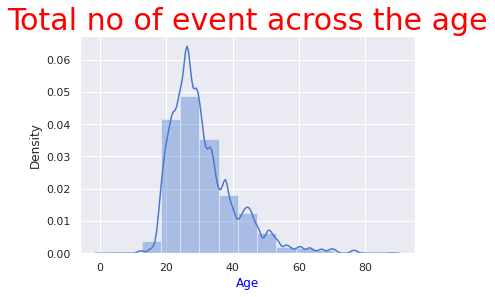

In [ ]:
#trends over ages
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(project_work.age)],bins=15)

plt.xlabel('Age', color='blue')
plt.title('Total no of event across the age',color='red',fontsize=30)

### Observation:

20-25 and 25-30 age groups are mostly uses the devices (multiple times)

Text(0.5, 1.0, 'Total no of event across the 24-hours cycle')

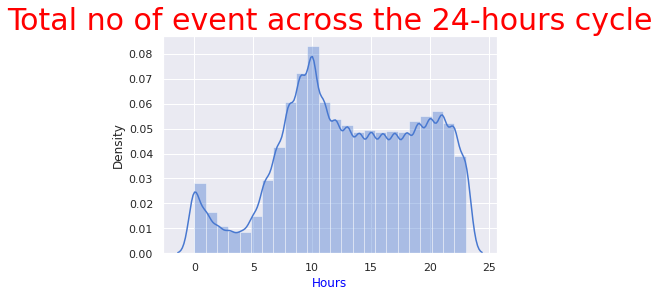

In [ ]:
#trends over hours
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(project_work.Time)],bins=24)

plt.xlabel('Hours', color='blue')
plt.title('Total no of event across the 24-hours cycle',color='red',fontsize=30)

### Observation:

Mostly the devices are being used (multiple times) during morning 8-11 AM and evening during 7-9 PM.

Text(0.5, 1.0, 'Total no of event across the Weekdays')

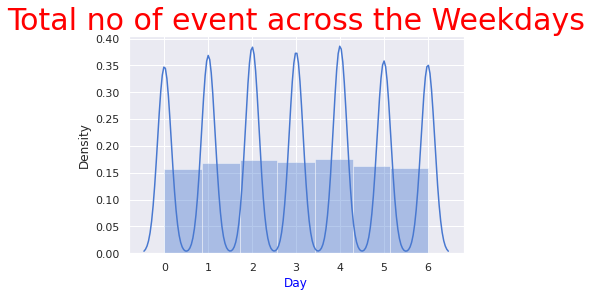

In [ ]:
#trends over hours
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(project_work.Day_number)],bins=7)

plt.xlabel('Day', color='blue')
plt.title('Total no of event across the Weekdays',color='red',fontsize=30)

### Observation:

The devices are being used uniformly throughout the week.

Text(0.5, 1.0, 'Total no of event across the Latitude')

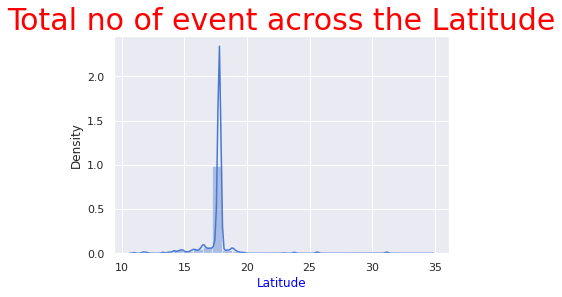

In [ ]:
#trends over geo-locations
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(project_work.latitude)],bins=30)

plt.xlabel('Latitude', color='blue')
plt.title('Total no of event across the Latitude',color='red',fontsize=30)

Text(0.5, 1.0, 'Total no of event across the Longitude')

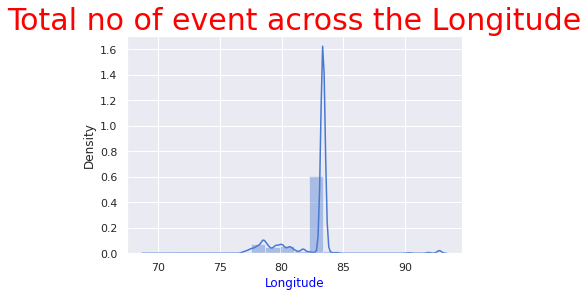

In [ ]:
#trends over geo-locations
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(project_work.longitude)],bins=20)

plt.xlabel('Longitude', color='blue')
plt.title('Total no of event across the Longitude',color='red',fontsize=30)

Text(0.5, 1.0, 'State wise all events count')

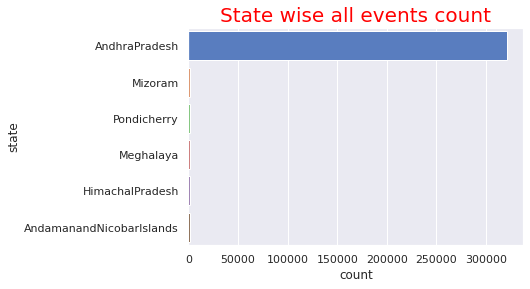

In [ ]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.countplot(y='state', data=project_work)
plt.title('State wise all events count',fontsize=20, color='red')

### Observation:

Visakhapatnam has most users (multiple times)

In [ ]:
most_city=project_work['city'].value_counts().reset_index()
most_city.columns=['city', 'eventcount']
most_city.head(10)

,city,eventcount
0,Visakhapatnam,235772
1,Bodhan,1539
2,Sattenapalle,1521
3,PortBlair,1515
4,Kodar,1488
5,Rayadrug,1482
6,Shimla,1409
7,Ramagundam,1331
8,Palwancha,1298
9,Bhongir,1282


Text(0.5, 1.0, 'No of events by top 10 cities')

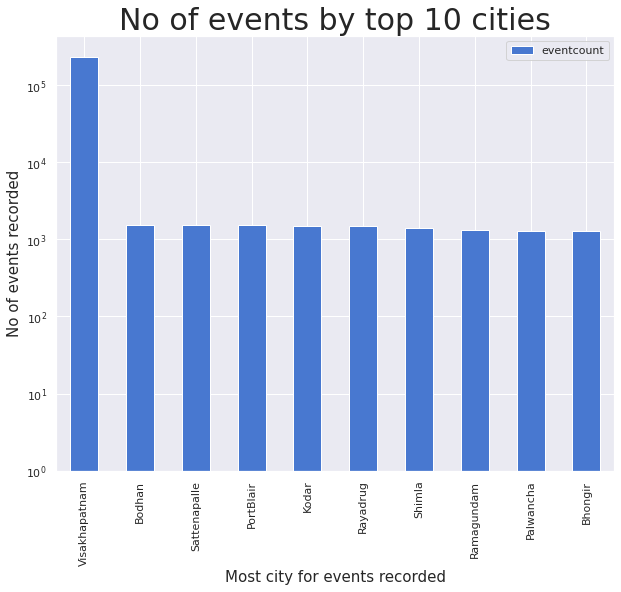

In [ ]:
most_city.head(10).plot(x='city', y='eventcount', kind='bar', figsize=(10,8),log=True)
plt.xlabel('Most city for events recorded',fontsize=15)
plt.ylabel('No of events recorded',fontsize=15)
plt.title('No of events by top 10 cities',fontsize=30)

<a id=section5.3></a>
## 5.3 Unique Event Analysis:





In [ ]:
project_work.device_id.nunique()

5223

In [ ]:
df31 = df31.drop_duplicates('device_id', keep='first')

In [ ]:
df31.shape

(5223, 15)

Text(0.5, 1.0, 'Unique event across the age')

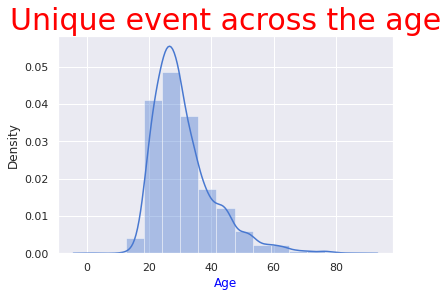

In [ ]:
#trends over ages
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(df31.age)],bins=15)

plt.xlabel('Age', color='blue')
plt.title('Unique event across the age',color='red',fontsize=30)

Text(0.5, 1.0, 'Unique event across the 24-hours cycle')

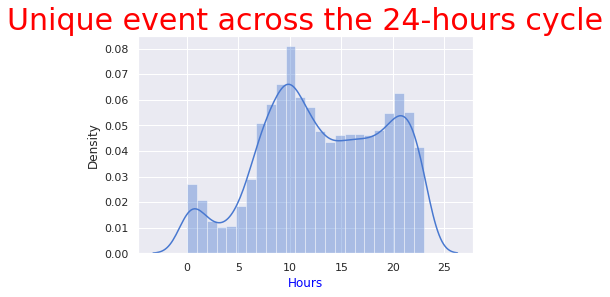

In [ ]:
#trends over hours
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(df31.Time)],bins=24)

plt.xlabel('Hours', color='blue')
plt.title('Unique event across the 24-hours cycle',color='red',fontsize=30)

Text(0.5, 1.0, 'Unique event across the Weekdays')

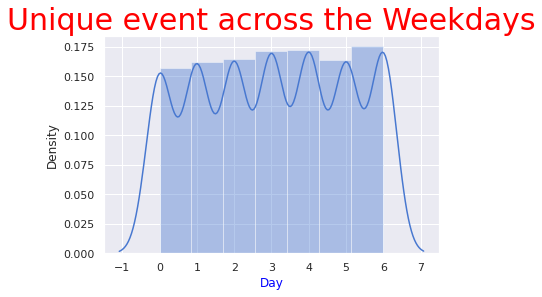

In [ ]:
#trends over hours
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(df31.Day_number)],bins=7)

plt.xlabel('Day', color='blue')
plt.title('Unique event across the Weekdays',color='red',fontsize=30)

Text(0.5, 1.0, 'Unique event across the Latitude')

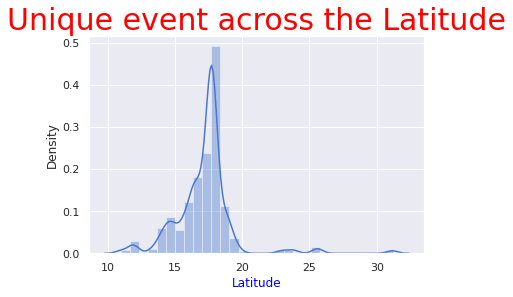

In [ ]:
#trends over geo-locations
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(df31.latitude)],bins=30)

plt.xlabel('Latitude', color='blue')
plt.title('Unique event across the Latitude',color='red',fontsize=30)

Text(0.5, 1.0, 'Unique event across the Longitude')

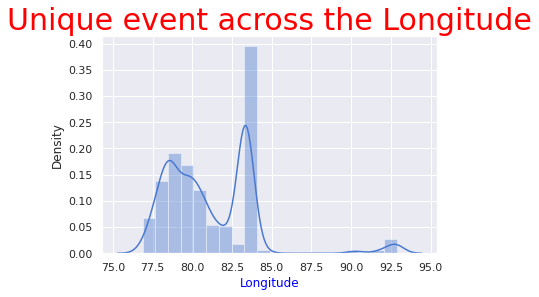

In [ ]:
#trends over geo-locations
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(df31.longitude)],bins=20)

plt.xlabel('Longitude', color='blue')
plt.title('Unique event across the Longitude',color='red',fontsize=30)

In [ ]:
city_ll_mode_dict['Visakhapatnam']

[17.829748000000006, 83.326714]

### Distribution of Users across State:

Text(0.5, 1.0, 'State wise unique events count')

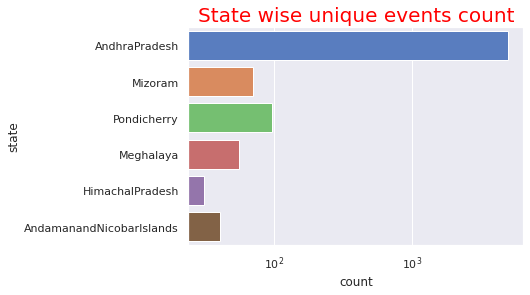

In [ ]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.countplot(y='state', data=df31,log=True)
plt.title('State wise unique events count',fontsize=20, color='red')

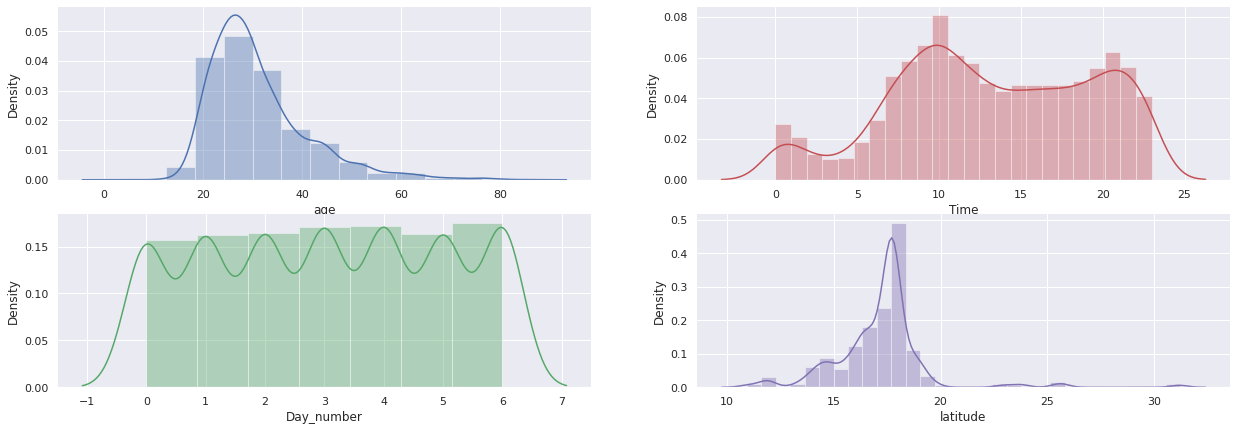

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(21, 7), sharex=False)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(df31['age'],bins=15, color="b", ax=axes[0, 0])

sns.distplot(df31['Time'],bins=24, color="r", ax=axes[0, 1])

sns.distplot(df31['Day_number'],bins=7, color="g", ax=axes[1, 0])

sns.distplot(df31['latitude'],bins=30, color="m", ax=axes[1, 1])

### Observation:

- 25-30 is the bracket for most users.
- Morning 8-11 AM and evening 7-9 PM are the most event/call occured.
- Day numbers are uniform throughout the week.

<a id=section5.3.1></a>
## 5.3.1 Statewise Distribution Analysis:





Text(0.5, 1.0, 'AndamanandNicobarIslands')

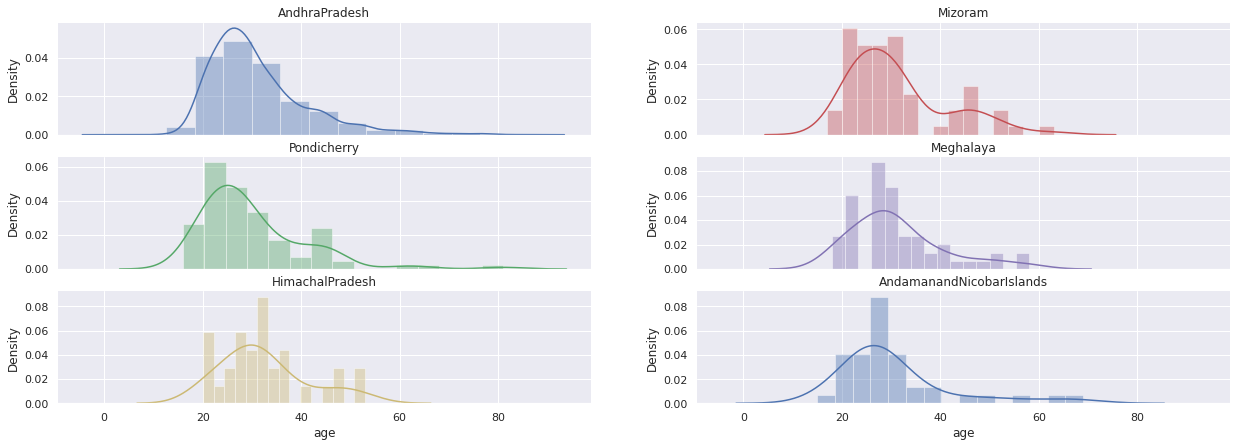

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(21, 7), sharex=True)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(df31[df31.state=='AndhraPradesh']['age'],bins=15, color="b", ax=axes[0, 0]).set_title("AndhraPradesh")

sns.distplot(df31[df31.state=='Mizoram']['age'],bins=15, color="r", ax=axes[0, 1]).set_title("Mizoram") 

sns.distplot(df31[df31.state=='Pondicherry']['age'],bins=15, color="g", ax=axes[1, 0]).set_title("Pondicherry")

sns.distplot(df31[df31.state=='Meghalaya']['age'],bins=15, color="m", ax=axes[1, 1]).set_title("Meghalaya")

sns.distplot(df31[df31.state=='HimachalPradesh']['age'],bins=15, color="y", ax=axes[2, 0]).set_title("HimachalPradesh")

sns.distplot(df31[df31.state=='AndamanandNicobarIslands']['age'],bins=15, color="b", ax=axes[2, 1]).set_title("AndamanandNicobarIslands")

### Observation:

- 25-30 is the bracket for most users for all States except HimachalPradesh, where the mean lies above 30 years.

###  HimachalPradesh has potential for telecom growth for young people.  

Text(0.5, 1.0, 'AndamanandNicobarIslands - Female')

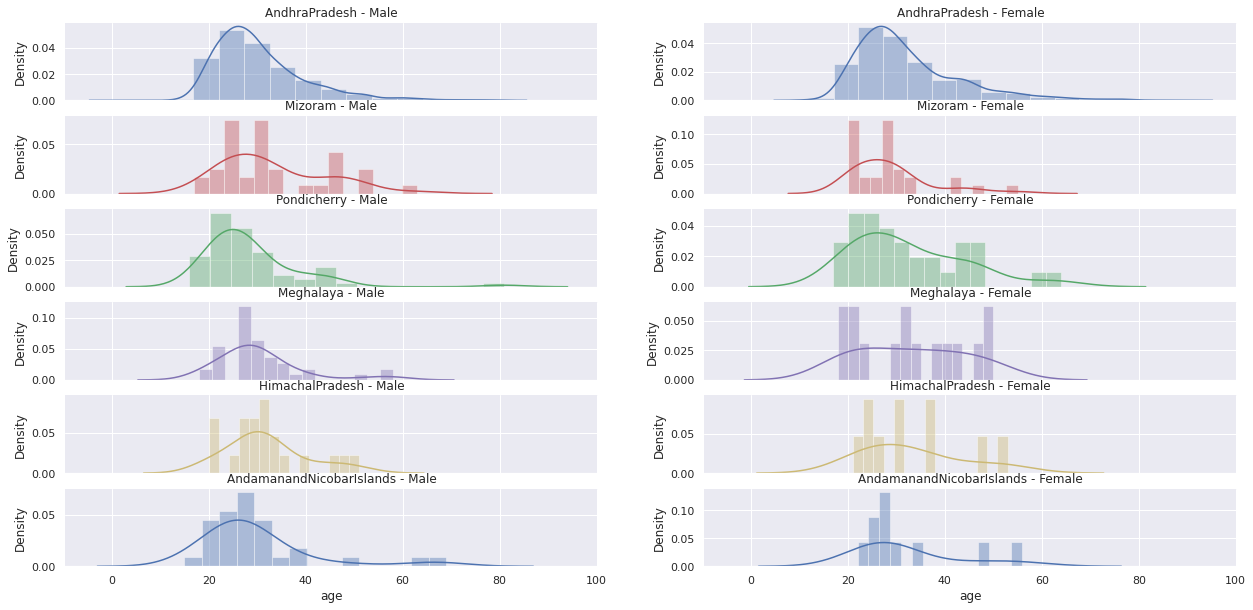

In [ ]:
f, axes = plt.subplots(6, 2, figsize=(21, 10), sharex=True)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(df31[(df31.state=='AndhraPradesh') & (df31.gender=='M')]['age'],bins=15, color="b", ax=axes[0, 0]).set_title("AndhraPradesh - Male")

sns.distplot(df31[(df31.state=='AndhraPradesh') & (df31.gender=='F')]['age'],bins=15, color="b", ax=axes[0, 1]).set_title("AndhraPradesh - Female")

sns.distplot(df31[(df31.state=='Mizoram') & (df31.gender=='M')]['age'],bins=15, color="r", ax=axes[1, 0]).set_title("Mizoram - Male") 

sns.distplot(df31[(df31.state=='Mizoram') & (df31.gender=='F')]['age'],bins=15, color="r", ax=axes[1, 1]).set_title("Mizoram - Female") 

sns.distplot(df31[(df31.state=='Pondicherry') & (df31.gender=='M')]['age'],bins=15, color="g", ax=axes[2, 0]).set_title("Pondicherry - Male")

sns.distplot(df31[(df31.state=='Pondicherry') & (df31.gender=='F')]['age'],bins=15, color="g", ax=axes[2, 1]).set_title("Pondicherry - Female")

sns.distplot(df31[(df31.state=='Meghalaya') & (df31.gender=='M')]['age'],bins=15, color="m", ax=axes[3, 0]).set_title("Meghalaya - Male")

sns.distplot(df31[(df31.state=='Meghalaya') & (df31.gender=='F')]['age'],bins=15, color="m", ax=axes[3, 1]).set_title("Meghalaya - Female")

sns.distplot(df31[(df31.state=='HimachalPradesh') & (df31.gender=='M')]['age'],bins=15, color="y", ax=axes[4, 0]).set_title("HimachalPradesh - Male")

sns.distplot(df31[(df31.state=='HimachalPradesh') & (df31.gender=='F')]['age'],bins=15, color="y", ax=axes[4, 1]).set_title("HimachalPradesh - Female")

sns.distplot(df31[(df31.state=='AndamanandNicobarIslands') & (df31.gender=='M')]['age'],bins=15, color="b", ax=axes[5, 0]).set_title("AndamanandNicobarIslands - Male")

sns.distplot(df31[(df31.state=='AndamanandNicobarIslands') & (df31.gender=='F')]['age'],bins=15, color="b", ax=axes[5, 1]).set_title("AndamanandNicobarIslands - Female")

### Observation:

- Mizoram, Meghalaya and HimachalPradesh to be considered for promotional event for young group of people.

- Mizoram, HimachalPradesh to be also considered for "Female" focused promotional event.

Text(0.5, 1.0, 'AndamanandNicobarIslands')

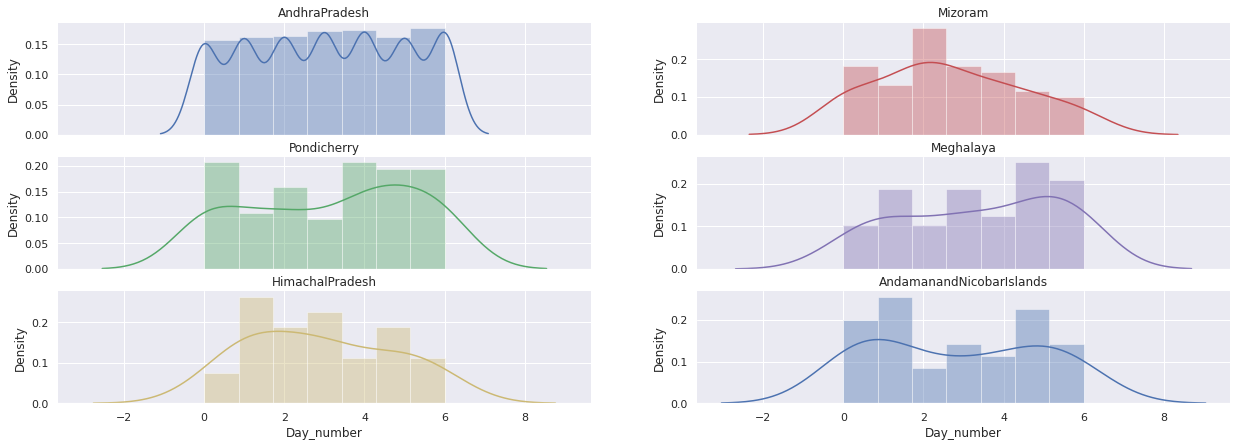

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(21, 7), sharex=True)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(df31[df31.state=='AndhraPradesh']['Day_number'],bins=7, color="b", ax=axes[0, 0]).set_title("AndhraPradesh")

sns.distplot(df31[df31.state=='Mizoram']['Day_number'],bins=7, color="r", ax=axes[0, 1]).set_title("Mizoram") 

sns.distplot(df31[df31.state=='Pondicherry']['Day_number'],bins=7, color="g", ax=axes[1, 0]).set_title("Pondicherry")

sns.distplot(df31[df31.state=='Meghalaya']['Day_number'],bins=7, color="m", ax=axes[1, 1]).set_title("Meghalaya")

sns.distplot(df31[df31.state=='HimachalPradesh']['Day_number'],bins=7, color="y", ax=axes[2, 0]).set_title("HimachalPradesh")

sns.distplot(df31[df31.state=='AndamanandNicobarIslands']['Day_number'],bins=7, color="b", ax=axes[2, 1]).set_title("AndamanandNicobarIslands")

### Observation:

- Mizoram and HimachalPradesh users mostly talk/call during weekday-1 (Tuesday) and weekday-2 (Wenesday), so weekend based "special" offer may be provided to them.

- Pondicherry and Meghalaya most events occured during weekend; weekday "special tariff program" may be proposed to engage more user.

- Andaman & Pondicherry have saddle curve nature.

Text(0.5, 1.0, 'AndamanandNicobarIslands - Female')

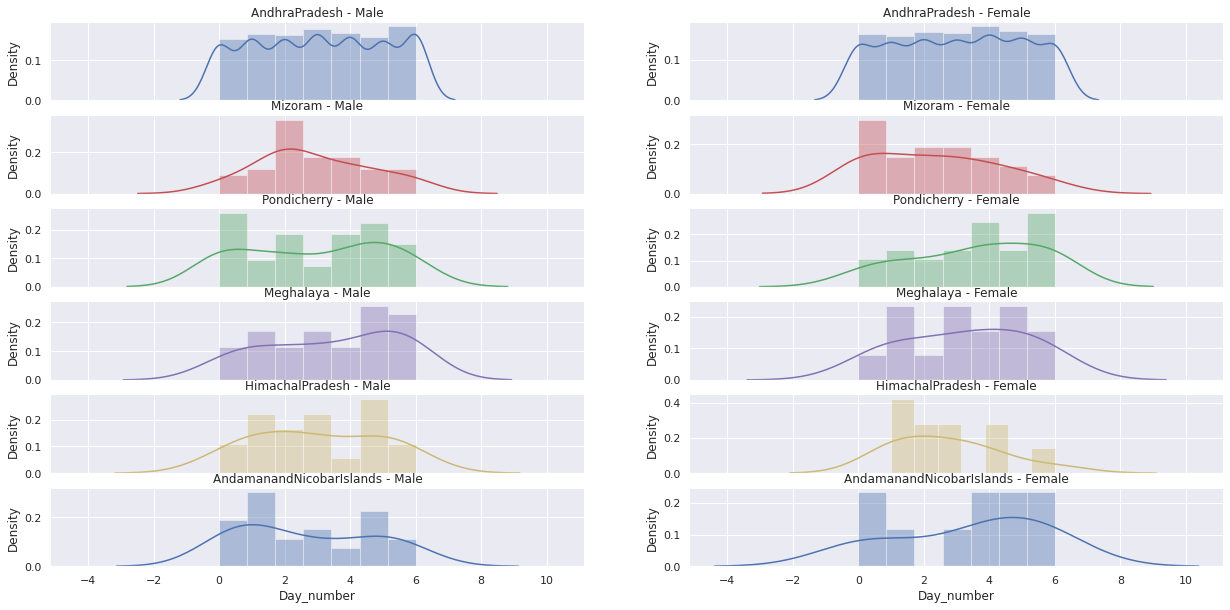

In [ ]:
f, axes = plt.subplots(6, 2, figsize=(21, 10), sharex=True)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(df31[(df31.state=='AndhraPradesh') & (df31.gender=='M')]['Day_number'],bins=7, color="b", ax=axes[0, 0]).set_title("AndhraPradesh - Male")

sns.distplot(df31[(df31.state=='AndhraPradesh') & (df31.gender=='F')]['Day_number'],bins=7, color="b", ax=axes[0, 1]).set_title("AndhraPradesh - Female")

sns.distplot(df31[(df31.state=='Mizoram') & (df31.gender=='M')]['Day_number'],bins=7, color="r", ax=axes[1, 0]).set_title("Mizoram - Male") 

sns.distplot(df31[(df31.state=='Mizoram') & (df31.gender=='F')]['Day_number'],bins=7, color="r", ax=axes[1, 1]).set_title("Mizoram - Female") 

sns.distplot(df31[(df31.state=='Pondicherry') & (df31.gender=='M')]['Day_number'],bins=7, color="g", ax=axes[2, 0]).set_title("Pondicherry - Male")

sns.distplot(df31[(df31.state=='Pondicherry') & (df31.gender=='F')]['Day_number'],bins=7, color="g", ax=axes[2, 1]).set_title("Pondicherry - Female")

sns.distplot(df31[(df31.state=='Meghalaya') & (df31.gender=='M')]['Day_number'],bins=7, color="m", ax=axes[3, 0]).set_title("Meghalaya - Male")

sns.distplot(df31[(df31.state=='Meghalaya') & (df31.gender=='F')]['Day_number'],bins=7, color="m", ax=axes[3, 1]).set_title("Meghalaya - Female")

sns.distplot(df31[(df31.state=='HimachalPradesh') & (df31.gender=='M')]['Day_number'],bins=7, color="y", ax=axes[4, 0]).set_title("HimachalPradesh - Male")

sns.distplot(df31[(df31.state=='HimachalPradesh') & (df31.gender=='F')]['Day_number'],bins=7, color="y", ax=axes[4, 1]).set_title("HimachalPradesh - Female")

sns.distplot(df31[(df31.state=='AndamanandNicobarIslands') & (df31.gender=='M')]['Day_number'],bins=7, color="b", ax=axes[5, 0]).set_title("AndamanandNicobarIslands - Male")

sns.distplot(df31[(df31.state=='AndamanandNicobarIslands') & (df31.gender=='F')]['Day_number'],bins=7, color="b", ax=axes[5, 1]).set_title("AndamanandNicobarIslands - Female")

### Observation:

- Dissimilar call habits between Male and Female users lead to have saddle curve for Andaman and Pondicherry.

- Andaman (Male) users can be specifically focused for weekend offer.

Text(0.5, 1.0, 'AndamanandNicobarIslands')

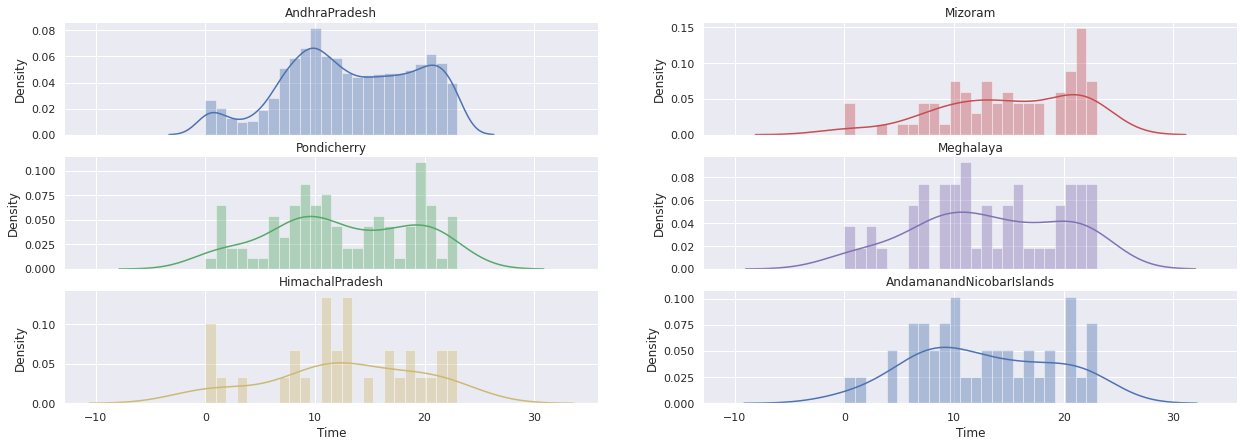

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(21, 7), sharex=True)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(df31[df31.state=='AndhraPradesh']['Time'],bins=24, color="b", ax=axes[0, 0]).set_title("AndhraPradesh")

sns.distplot(df31[df31.state=='Mizoram']['Time'],bins=24, color="r", ax=axes[0, 1]).set_title("Mizoram") 

sns.distplot(df31[df31.state=='Pondicherry']['Time'],bins=24, color="g", ax=axes[1, 0]).set_title("Pondicherry")

sns.distplot(df31[df31.state=='Meghalaya']['Time'],bins=24, color="m", ax=axes[1, 1]).set_title("Meghalaya")

sns.distplot(df31[df31.state=='HimachalPradesh']['Time'],bins=24, color="y", ax=axes[2, 0]).set_title("HimachalPradesh")

sns.distplot(df31[df31.state=='AndamanandNicobarIslands']['Time'],bins=24, color="b", ax=axes[2, 1]).set_title("AndamanandNicobarIslands")

### Observation:

- Mizoram users are rarely uses during day time so promotional event considering business hours can be benefacial for Mizoram.

Text(0.5, 1.0, 'AndamanandNicobarIslands - Female')

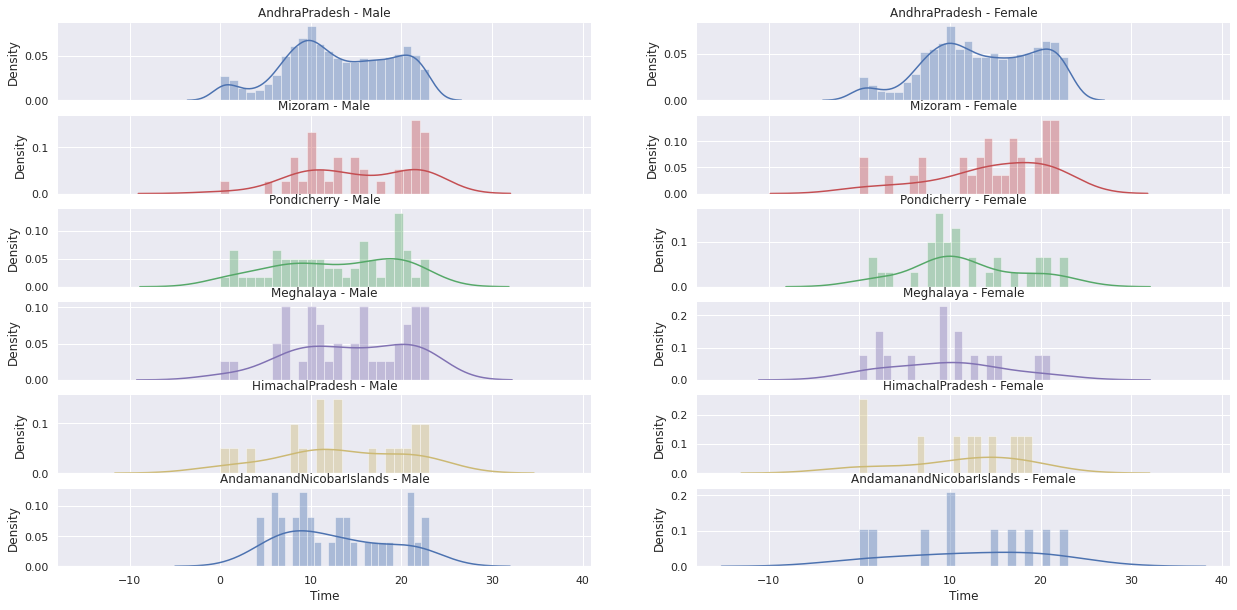

In [ ]:
f, axes = plt.subplots(6, 2, figsize=(21, 10), sharex=True)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(df31[(df31.state=='AndhraPradesh') & (df31.gender=='M')]['Time'],bins=24, color="b", ax=axes[0, 0]).set_title("AndhraPradesh - Male")

sns.distplot(df31[(df31.state=='AndhraPradesh') & (df31.gender=='F')]['Time'],bins=24, color="b", ax=axes[0, 1]).set_title("AndhraPradesh - Female")

sns.distplot(df31[(df31.state=='Mizoram') & (df31.gender=='M')]['Time'],bins=24, color="r", ax=axes[1, 0]).set_title("Mizoram - Male") 

sns.distplot(df31[(df31.state=='Mizoram') & (df31.gender=='F')]['Time'],bins=24, color="r", ax=axes[1, 1]).set_title("Mizoram - Female") 

sns.distplot(df31[(df31.state=='Pondicherry') & (df31.gender=='M')]['Time'],bins=24, color="g", ax=axes[2, 0]).set_title("Pondicherry - Male")

sns.distplot(df31[(df31.state=='Pondicherry') & (df31.gender=='F')]['Time'],bins=24, color="g", ax=axes[2, 1]).set_title("Pondicherry - Female")

sns.distplot(df31[(df31.state=='Meghalaya') & (df31.gender=='M')]['Time'],bins=24, color="m", ax=axes[3, 0]).set_title("Meghalaya - Male")

sns.distplot(df31[(df31.state=='Meghalaya') & (df31.gender=='F')]['Time'],bins=24, color="m", ax=axes[3, 1]).set_title("Meghalaya - Female")

sns.distplot(df31[(df31.state=='HimachalPradesh') & (df31.gender=='M')]['Time'],bins=24, color="y", ax=axes[4, 0]).set_title("HimachalPradesh - Male")

sns.distplot(df31[(df31.state=='HimachalPradesh') & (df31.gender=='F')]['Time'],bins=24, color="y", ax=axes[4, 1]).set_title("HimachalPradesh - Female")

sns.distplot(df31[(df31.state=='AndamanandNicobarIslands') & (df31.gender=='M')]['Time'],bins=24, color="b", ax=axes[5, 0]).set_title("AndamanandNicobarIslands - Male")

sns.distplot(df31[(df31.state=='AndamanandNicobarIslands') & (df31.gender=='F')]['Time'],bins=24, color="b", ax=axes[5, 1]).set_title("AndamanandNicobarIslands - Female")

### Observation:

- Special tariff for night calling may be helpful for all 6 states.

<a id=section5.3.2></a>
## 5.3.2 City and Brand wise Distribution Analysis:





In [ ]:
most_city_u=df31['city'].value_counts().reset_index()
most_city_u.columns=['city', 'eventcount']
most_city_u.head(10)

,city,eventcount
0,Visakhapatnam,1547
1,Samalkot,46
2,LalbahadurNagar,43
3,Qutubullapur,43
4,Narasapur,42
5,Palwancha,42
6,Nuzvid,42
7,PortBlair,41
8,Proddatur,41
9,Koratla,40


Text(0.5, 1.0, 'No of unique events by top 10 cities')

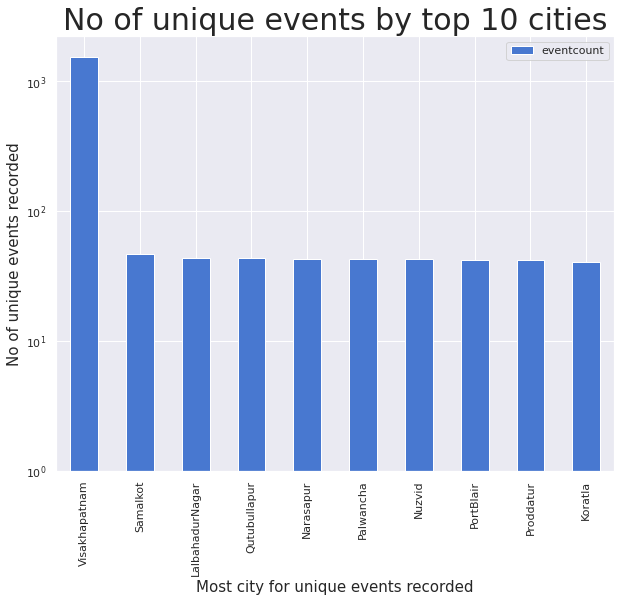

In [ ]:
most_city_u.head(10).plot(x='city', y='eventcount', kind='bar', figsize=(10,8), log = True)
plt.xlabel('Most city for unique events recorded',fontsize=15)
plt.ylabel('No of unique events recorded',fontsize=15)
plt.title('No of unique events by top 10 cities',fontsize=30)

### Observation:

- Those 10 cities are having good number of user so special tariff plan for those cities will attract more user with less effort.

### Distribution of Users across Brand & Model:

In [ ]:
most_brand=df31['brand_eng'].value_counts().reset_index()
most_brand.columns=['brand', 'eventcount']
most_brand.head(10)

,brand,eventcount
0,Xiaomi,1279
1,Samsung,1165
2,Huawei,861
3,vivo,482
4,OPPO,417
5,Meizu,320
6,Coolpad,234
7,HTC,71
8,Lenovo,67
9,LeTV,34


Text(0.5, 1.0, 'No of unique events by top 10 brands')

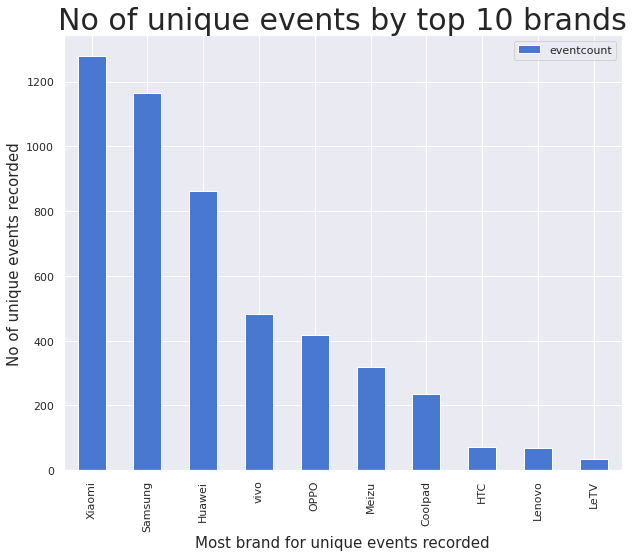

In [ ]:
most_brand.head(10).plot(x='brand', y='eventcount', kind='bar', figsize=(10,8))
plt.xlabel('Most brand for unique events recorded',fontsize=15)
plt.ylabel('No of unique events recorded',fontsize=15)
plt.title('No of unique events by top 10 brands',fontsize=30)

### Observation:

- Bundled offer along with those top 10 brands new phone purchase will significantly generate revenue for InsaidTelecom.

In [ ]:
most_model=df31['model_eng'].value_counts().reset_index()
most_model.columns=['model', 'eventcount']
most_model.head(10)

,model,eventcount
0,Red rice note,218
1,MI 2S,176
2,MI 3,172
3,Galaxy Note 3,167
4,MI 4,125
5,Galaxy Note 2,111
6,Galaxy S4,110
7,Glory 6,87
8,Honor 3C,86
9,Redmi 1S,85


Text(0.5, 1.0, 'No of unique events by top 10 models')

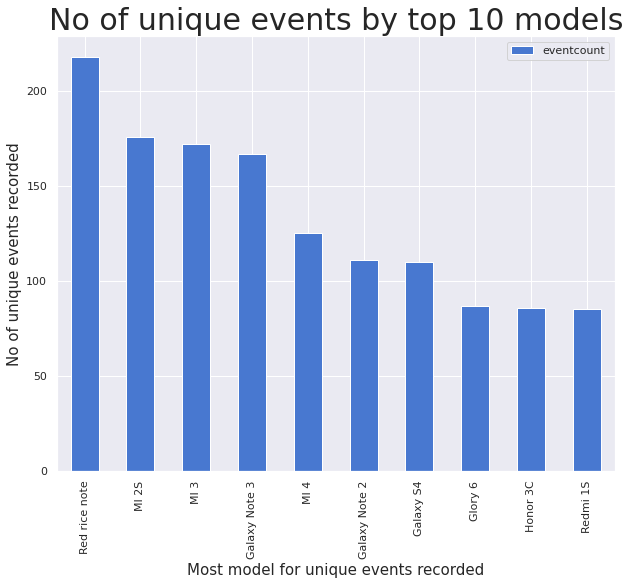

In [ ]:
most_model.head(10).plot(x='model', y='eventcount', kind='bar', figsize=(10,8))
plt.xlabel('Most model for unique events recorded',fontsize=15)
plt.ylabel('No of unique events recorded',fontsize=15)
plt.title('No of unique events by top 10 models',fontsize=30)

<a id=section5.3.3></a>
## 5.3.3 Distribution of Users across Gender, Age, Time and Day:





Text(0.5, 1.0, 'Gender wise unique events count')

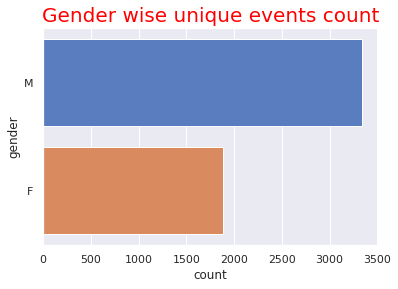

In [ ]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.countplot(y='gender', data=df31)
plt.title('Gender wise unique events count',fontsize=20, color='red')

Text(0.5, 1.0, 'Day wise unique event')

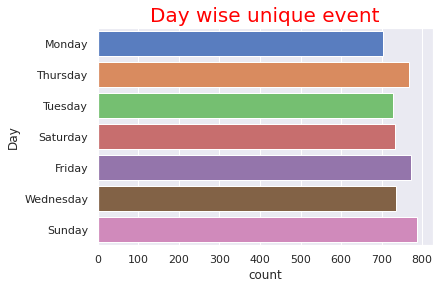

In [ ]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.countplot(y='Day', data=df31)
plt.title('Day wise unique event',fontsize=20, color='red')

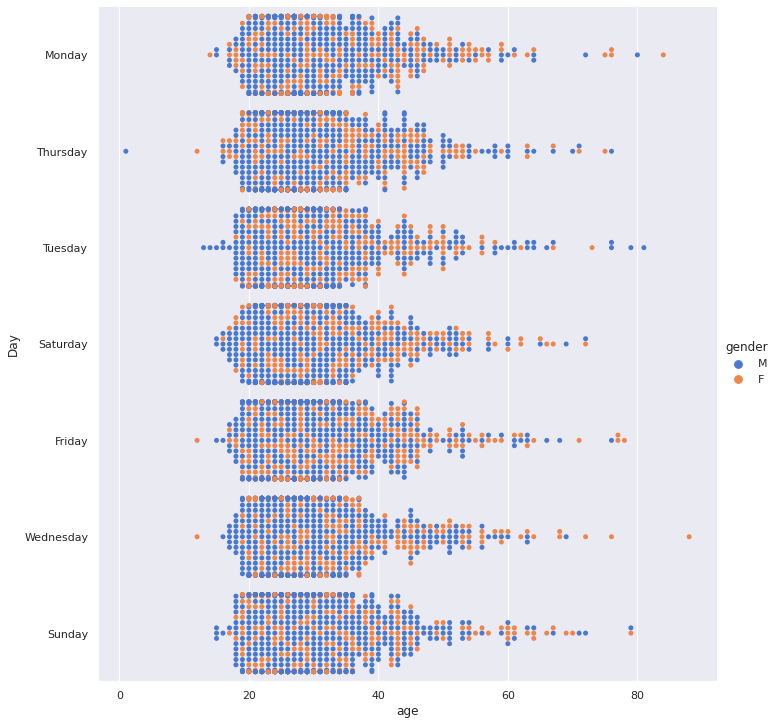

In [ ]:
sns.catplot(x="age", y="Day", hue="gender",
            kind="swarm", data=df31,height=10, aspect=1)

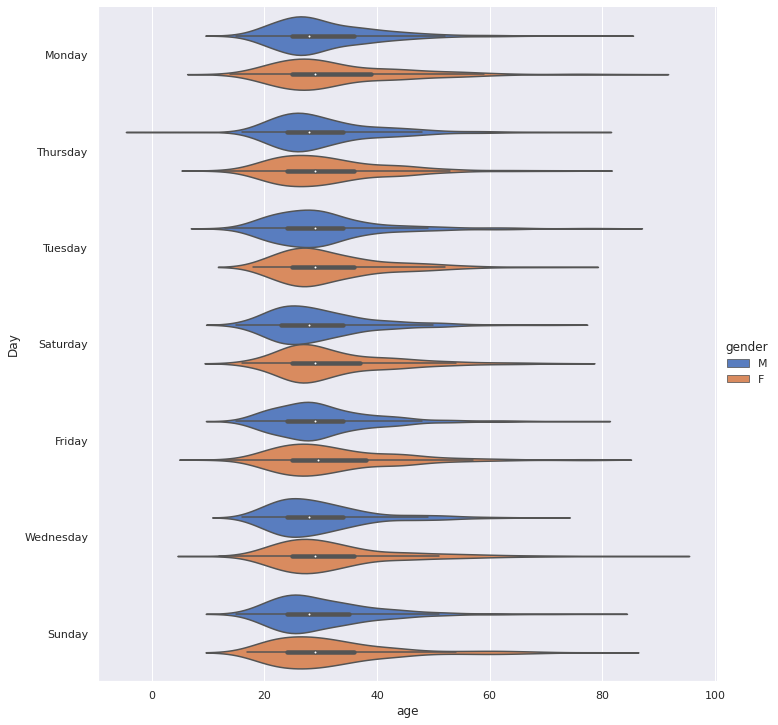

In [ ]:
sns.catplot(x="age", y="Day", hue="gender",
            kind="violin", data=df31,height=10, aspect=1)

### Observation:

- No such specific pattern observed for Weekday/weekend with the Gender and Age. 

<a id=section5.3.4></a>
## 5.3.4 Distribution of user city and state wise:





In [ ]:
Most_state=df31.groupby(['state'])['city'].value_counts()
Most_state=pd.DataFrame(Most_state)
Most_state.columns=['Count']
Most_state.head(3)

Count
state                    city                
AndamanandNicobarIslands PortBlair      41   
AndhraPradesh            Visakhapatnam  1547 
                         Samalkot       46

In [ ]:
Most_state.reset_index(inplace=True)
Most_state.columns=['state','city','Count']
Most_state

,state,city,Count
0,AndamanandNicobarIslands,PortBlair,41
1,AndhraPradesh,Visakhapatnam,1547
2,AndhraPradesh,Samalkot,46
3,AndhraPradesh,LalbahadurNagar,43
4,AndhraPradesh,Qutubullapur,43
...,...,...,...
108,Mizoram,Aizawl,39
109,Mizoram,Lunglei,31
110,Pondicherry,Pondicherry,36
111,Pondicherry,Karaikal,31


In [ ]:
df32=Most_state.pivot_table(index='state',values='Count',aggfunc='sum')
df32.reset_index(inplace=True)
df32.columns=['state','Total Count']
df32

,state,Total Count
0,AndamanandNicobarIslands,41
1,AndhraPradesh,4929
2,HimachalPradesh,31
3,Meghalaya,56
4,Mizoram,70
5,Pondicherry,96


In [ ]:
Most_state=pd.merge(Most_state,df32,how='left',on='state')
Most_state
Most_state['Percentage']=100*Most_state['Count']/Most_state['Total Count']
Most_state

,state,city,Count,Total Count,Percentage
0,AndamanandNicobarIslands,PortBlair,41,41,100.000000
1,AndhraPradesh,Visakhapatnam,1547,4929,31.385677
2,AndhraPradesh,Samalkot,46,4929,0.933252
3,AndhraPradesh,LalbahadurNagar,43,4929,0.872388
4,AndhraPradesh,Qutubullapur,43,4929,0.872388
...,...,...,...,...,...
108,Mizoram,Aizawl,39,70,55.714286
109,Mizoram,Lunglei,31,70,44.285714
110,Pondicherry,Pondicherry,36,96,37.500000
111,Pondicherry,Karaikal,31,96,32.291667


In [ ]:
a1=[]
b1=[]
for i in range(len(Most_state)) : 
    a1.append(Most_state.loc[i, "city"])  
    b1.append(Most_state.loc[i, "Percentage"])  
print(a1)
print(b1)

['PortBlair', 'Visakhapatnam', 'Samalkot', 'LalbahadurNagar', 'Qutubullapur', 'Narasapur', 'Nuzvid', 'Palwancha', 'Proddatur', 'Bodhan', 'Koratla', 'Nandyal', 'Rayadrug', 'Guntur', 'Tadpatri', 'Anantapur', 'Gudivada', 'Kodar', 'Malkajgiri', 'Mangalagiri', 'Narasaraopet', 'Piduguralla', 'Tandur', 'Vuyyuru', 'Adoni', 'ChinnaChawk', 'Cuddapah', 'Eluru', 'Kadiri', 'Kamareddi', 'Kapra', 'Nirmal', 'Rajamahendri', 'Ramagundam', 'Tadepalle', 'Belampalli', 'Bobbili', 'Karimnagar', 'Nizamabad', 'Serilungampalle', 'Vinukonda', 'Bapatla', 'Guntakal', 'Kagaznagar', 'Machilipatnam', 'Nalgonda', 'Sattenapalle', 'Vijayawada', 'Yemmiganur', 'Kavali', 'Mancheral', 'Palakollu', 'Gadwal', 'Hyderabad', 'Kondukur', 'Ongole', 'Sangareddi', 'Tanuku', 'Bhongir', 'Gaddiannaram', 'Adilabad', 'Alwal', 'Bhimavaram', 'Chittur', 'Dharmavaram', 'Kukatpalle', 'Ponnur', 'Siddipet', 'Tuni', 'Gudur', 'Rajampet', 'Srikalahasti', 'Suriapet', 'Chilakalurupet', 'Gajuwaka', 'Jagtial', 'Patancheru', 'Rayachoti', 'Sirsilla', 'T

In [ ]:
Most_state.state.unique()

array(['AndamanandNicobarIslands', 'AndhraPradesh', 'HimachalPradesh',
       'Meghalaya', 'Mizoram', 'Pondicherry'], dtype=object)

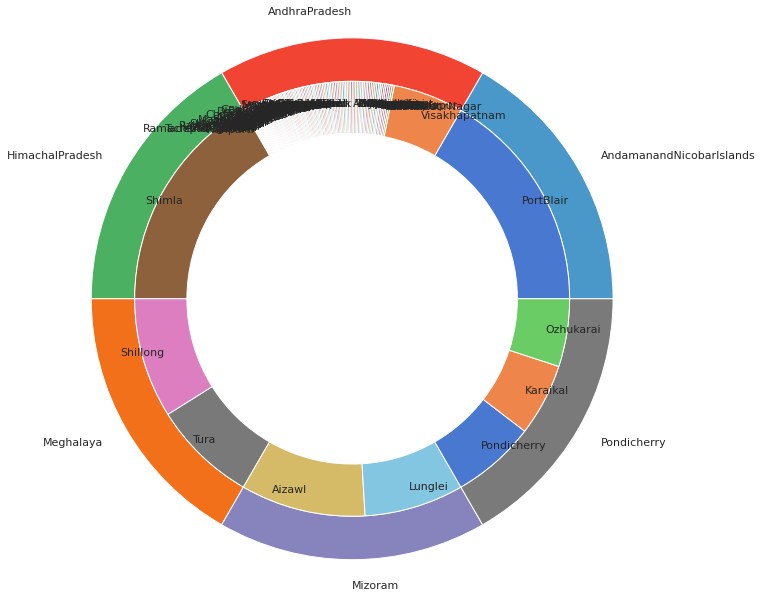

In [ ]:
# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
group_names=['AndamanandNicobarIslands', 'AndhraPradesh', 'HimachalPradesh','Meghalaya', 'Mizoram', 'Pondicherry']
group_size=[100,100,100,100,100,100]
subgroup_names = a1
subgroup_size = b1
 
# Create colors
a, b, c,d,e,f=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens,plt.cm.Oranges, plt.cm.Purples,plt.cm.Greys]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.6), e(0.6), f(0.6)])
plt.setp( mypie, width=0.5, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=3-0.5, labels=subgroup_names, labeldistance=0.9)
plt.setp( mypie2, width=0.6, edgecolor='white')
plt.margins(0,0)
# show it
plt.show()


### Observation:

- HimachalPradesh and Andaman have only city Shimla and PortBlair respectively for the user and Meghalaya & Mizoram are having two cities each , Pondicherry has users from three cities, whereas AndhraPradesh is having 104 cities among which Visakhapatnam holds 31% users.

- AndhraPradesh might be be having good infrastructure hence state specific special offer might influence more users with less efforts. 

In [ ]:
Most_andhra=Most_state[Most_state.state=='AndhraPradesh'].reset_index()
Most_andhra.drop(['index'], axis=1,inplace=True)
Most_andhra.columns=['state','city','Count','Total Count','Percentage']
Most_andhra.head(10)

,state,city,Count,Total Count,Percentage
0,AndhraPradesh,Visakhapatnam,1547,4929,31.385677
1,AndhraPradesh,Samalkot,46,4929,0.933252
2,AndhraPradesh,LalbahadurNagar,43,4929,0.872388
3,AndhraPradesh,Qutubullapur,43,4929,0.872388
4,AndhraPradesh,Narasapur,42,4929,0.852100
5,AndhraPradesh,Nuzvid,42,4929,0.852100
6,AndhraPradesh,Palwancha,42,4929,0.852100
7,AndhraPradesh,Proddatur,41,4929,0.831812
8,AndhraPradesh,Bodhan,40,4929,0.811524
9,AndhraPradesh,Koratla,40,4929,0.811524


In [ ]:
a11=[]
b11=[]
for i in range(len(Most_andhra)) : 
    a11.append(Most_andhra.loc[i, "city"])  
    b11.append(Most_andhra.loc[i, "Percentage"])  
print(a11)
print(b11)

['Visakhapatnam', 'Samalkot', 'LalbahadurNagar', 'Qutubullapur', 'Narasapur', 'Nuzvid', 'Palwancha', 'Proddatur', 'Bodhan', 'Koratla', 'Nandyal', 'Rayadrug', 'Guntur', 'Tadpatri', 'Anantapur', 'Gudivada', 'Kodar', 'Malkajgiri', 'Mangalagiri', 'Narasaraopet', 'Piduguralla', 'Tandur', 'Vuyyuru', 'Adoni', 'ChinnaChawk', 'Cuddapah', 'Eluru', 'Kadiri', 'Kamareddi', 'Kapra', 'Nirmal', 'Rajamahendri', 'Ramagundam', 'Tadepalle', 'Belampalli', 'Bobbili', 'Karimnagar', 'Nizamabad', 'Serilungampalle', 'Vinukonda', 'Bapatla', 'Guntakal', 'Kagaznagar', 'Machilipatnam', 'Nalgonda', 'Sattenapalle', 'Vijayawada', 'Yemmiganur', 'Kavali', 'Mancheral', 'Palakollu', 'Gadwal', 'Hyderabad', 'Kondukur', 'Ongole', 'Sangareddi', 'Tanuku', 'Bhongir', 'Gaddiannaram', 'Adilabad', 'Alwal', 'Bhimavaram', 'Chittur', 'Dharmavaram', 'Kukatpalle', 'Ponnur', 'Siddipet', 'Tuni', 'Gudur', 'Rajampet', 'Srikalahasti', 'Suriapet', 'Chilakalurupet', 'Gajuwaka', 'Jagtial', 'Patancheru', 'Rayachoti', 'Sirsilla', 'Tirupati', 'An

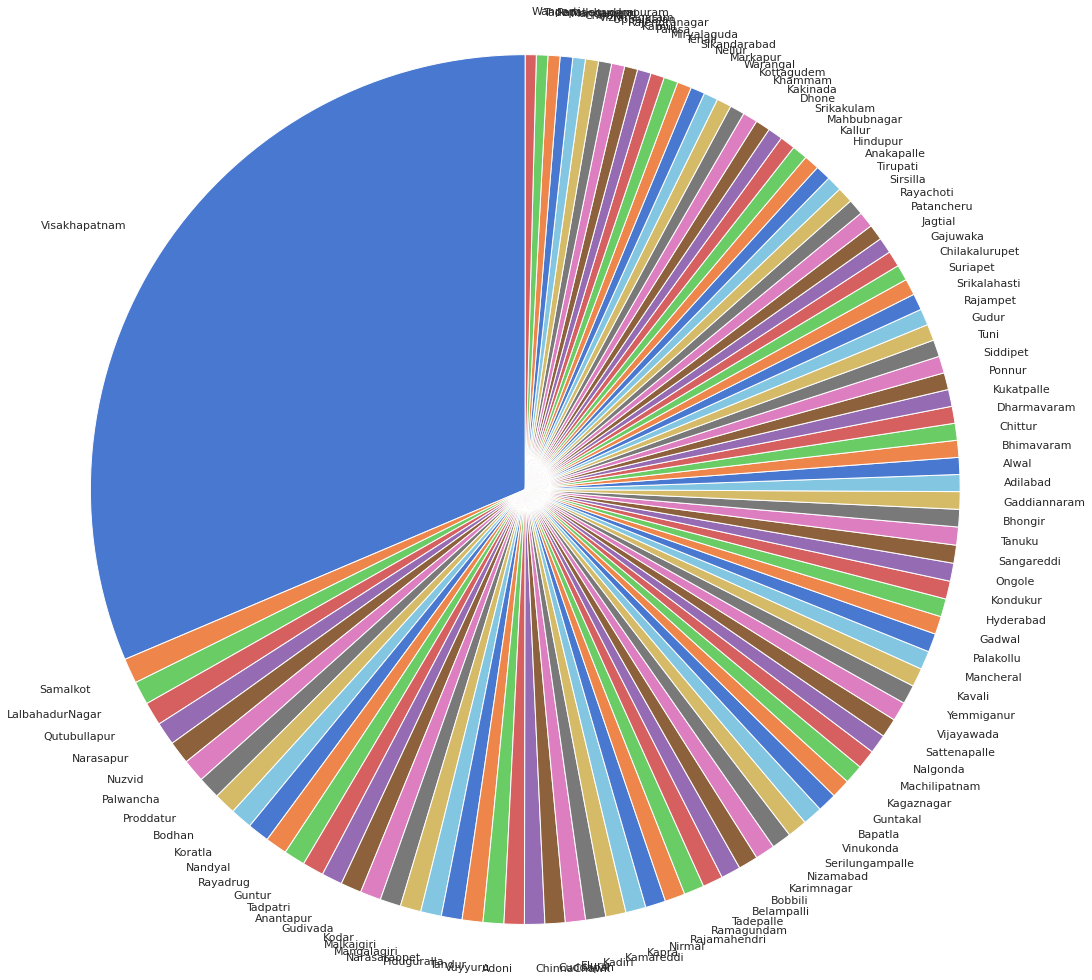

Cities in AP is 104


In [ ]:
y = b11
mylabels = a11
plt.pie(y, labels = mylabels, startangle = 90,radius=5)
#plt.legend(title = "Cities")
plt.show()
print('Cities in AP is {}'.format(Most_andhra.city.nunique()))

In [ ]:
state={'state':['AndamanandNicobarIslands', 'AndhraPradesh', 'HimachalPradesh','Meghalaya', 'Mizoram', 'Pondicherry'], 
    'state_geo':['Andaman & Nicobar','Andhra Pradesh', 'Himachal Pradesh','Meghalaya', 'Mizoram', 'Puducherry']}
st_df=pd.DataFrame.from_dict(state)
st_df

,state,state_geo
0,AndamanandNicobarIslands,Andaman & Nicobar
1,AndhraPradesh,Andhra Pradesh
2,HimachalPradesh,Himachal Pradesh
3,Meghalaya,Meghalaya
4,Mizoram,Mizoram
5,Pondicherry,Puducherry


In [ ]:
df31=pd.merge(df31,st_df,how='left',on='state')
df31.head(3)

,event_id,device_id,longitude,latitude,city,state,Date_Time,Day,Day_number,Time,gender,age,brand_eng,model_eng,age_range,state_geo
0,1078723,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,2016-05-02 02:21:20,Monday,0,2,M,31,Xiaomi,MI 2A,31-36,Andhra Pradesh
1,280014,-8879643774076165575,78.155397,16.390327,Wanparti,AndhraPradesh,2016-05-05 13:06:01,Thursday,3,13,M,34,Samsung,Galaxy On7,31-36,Andhra Pradesh
2,2334601,-601883305299256779,83.380111,17.828583,Visakhapatnam,AndhraPradesh,2016-05-05 11:17:48,Thursday,3,11,M,30,Huawei,Mate 7,25-30,Andhra Pradesh


In [ ]:
st_age=df31.pivot_table(index='state_geo',values='age',aggfunc='mean')
st_age.reset_index(inplace=True)
st_age

,state_geo,age
0,Andaman & Nicobar,30.439024
1,Andhra Pradesh,31.043822
2,Himachal Pradesh,32.419355
3,Meghalaya,31.142857
4,Mizoram,31.271429
5,Puducherry,30.000000


In [ ]:
import plotly.express as px
fig = px.choropleth(
    st_age,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state_geo',
    color='age',
    color_continuous_scale='Reds'
)

fig.update_geos(fitbounds="locations", visible=True)

fig.show()

### Observation:

- Statewise distribution of mean age of users.
- In HimachalPradesh, promotional event focussing young people must be looked upon. 

In [ ]:
st_event=df31.pivot_table(index='state_geo',values='device_id',aggfunc='count',)
st_event.reset_index(inplace=True)
st_event

,state_geo,device_id
0,Andaman & Nicobar,41
1,Andhra Pradesh,4929
2,Himachal Pradesh,31
3,Meghalaya,56
4,Mizoram,70
5,Puducherry,96


In [ ]:
import plotly.express as px
fig = px.choropleth(
    st_event,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state_geo',
    color='device_id',
    color_continuous_scale='Greens'
)

fig.update_geos(fitbounds="locations", visible=True)

fig.show()

Statewise total unique user distribution

<a id=section5.3.5></a>
## 5.3.5 Distribution of Gender for each State, Age segment, Phone brand:





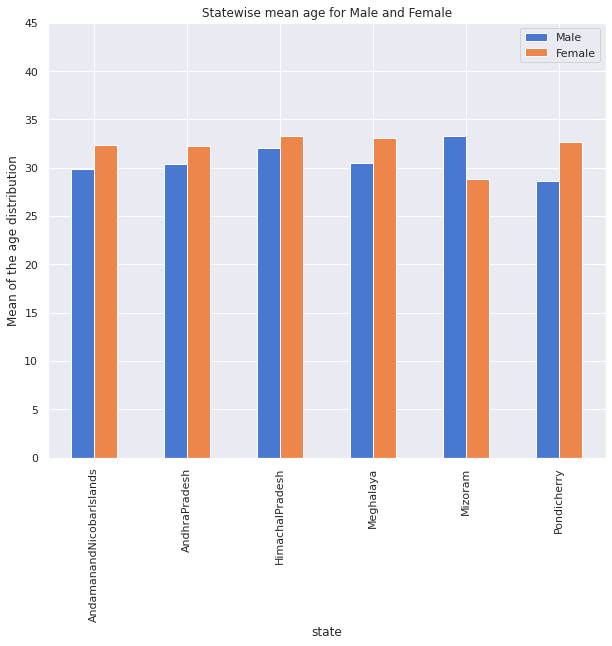

In [ ]:
    a=df31[df31['gender'] == 'M'].groupby(['state'])['age'].mean()
    b=df31[df31['gender'] == 'F'].groupby(['state'])['age'].mean()
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Male': a, 'Female' : b})
    ax1 = bd1.plot.bar(stacked=False,legend='upper right',figsize=(10,8))
    plt.xticks(np.arange(6),x)
    plt.yticks(np.arange(0, 50, 5))
    #plot.show(block=True)
    plt.ylabel('Mean of the age distribution')
    plt.title('Statewise mean age for Male and Female')
    plt.legend(['Male', 'Female'])

Male state
AndamanandNicobarIslands    31  
AndhraPradesh               3145
HimachalPradesh             21  
Meghalaya                   41  
Mizoram                     39  
Pondicherry                 63  
Name: device_id, dtype: int64, 
 and Female state
AndamanandNicobarIslands    10  
AndhraPradesh               1784
HimachalPradesh             10  
Meghalaya                   15  
Mizoram                     31  
Pondicherry                 33  
Name: device_id, dtype: int64


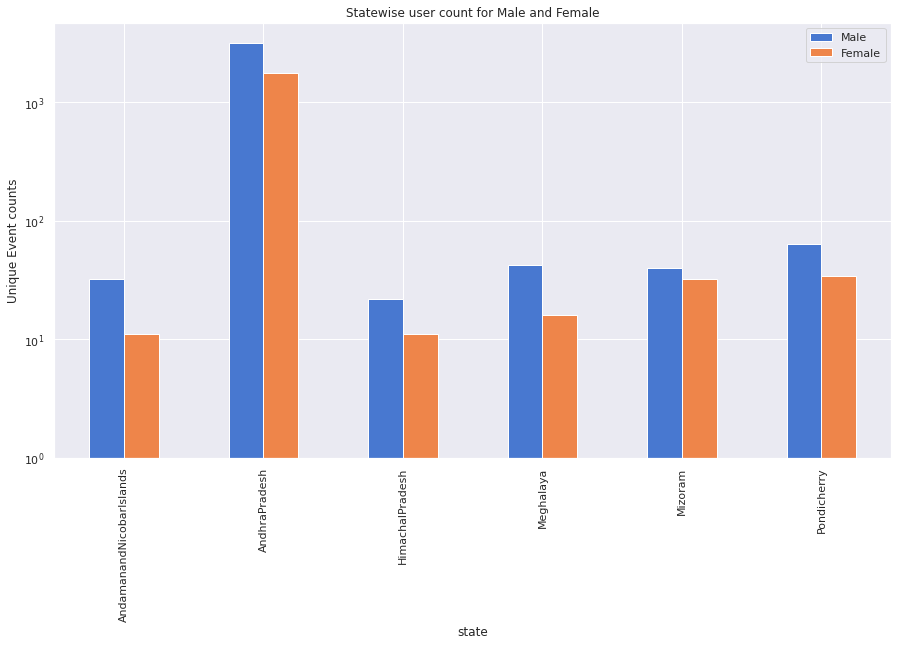

In [ ]:
    a=df31[df31['gender'] == 'M'].groupby(['state'])['device_id'].count()
    b=df31[df31['gender'] == 'F'].groupby(['state'])['device_id'].count()
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Male': a, 'Female' : b})
    ax1 = bd1.plot.bar(stacked=False,legend='upper right',figsize=(15,8),log=True)
    plt.xticks(np.arange(6),x)
    #plt.yticks(np.arange(0, 3200,50))
    #plot.show(block=True)
    plt.ylabel('Unique Event counts')
    plt.legend(['Male', 'Female'])
    plt.title('Statewise user count for Male and Female')
    print('Male {}, \n and Female {}'.format(a,b))

### Observation:

- HimachalPradesh and Andaman to be focused more for generating more growth. 

Text(0.5, 1.0, 'Statewise age segment count')

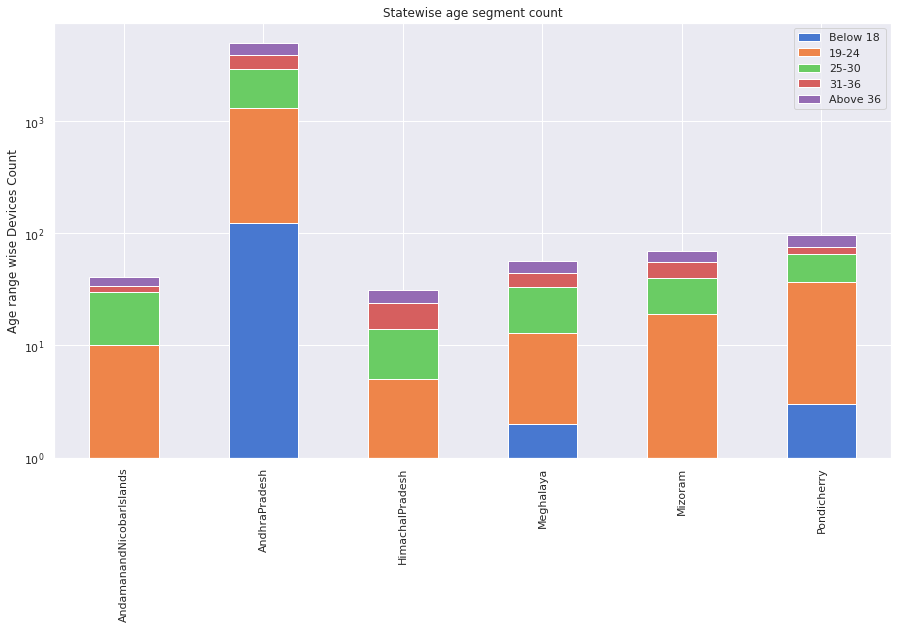

In [ ]:
    a=df31[df31['age_range'] == 'Below 18'].groupby(['state'])['device_id'].count()
    b=df31[df31['age_range'] == '19-24'].groupby(['state'])['device_id'].count()
    c=df31[df31['age_range'] == '25-30'].groupby(['state'])['device_id'].count()
    d=df31[df31['age_range'] == '31-36'].groupby(['state'])['device_id'].count()
    e=df31[df31['age_range'] == 'Above 36'].groupby(['state'])['device_id'].count()
  
    
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Below 18' : a, '19-24' : b, '25-30' : c,'31-36' : d, 'Above 36' : e})
    ax1 = bd1.plot(kind='bar', stacked=True, log=True, legend='upper right',figsize=(15,8))
    #plt.xticks(np.arange(6),x)
    #plt.yticks(np.arange(0, 20000, 50))
    #plot.show(block=True)
    plt.ylabel('Age range wise Devices Count')
    plt.title('Statewise age segment count')
    #plt.legend(['Xiaomi', 'Samsung' ,'Huawei' ,'vivo', 'OPPO' ,'Meizu', 'Coolpad','HTC', 'Lenovo' ,'LeTV' ])

### Observation:

- HimachalPradesh, Mizoram and Andaman having no "Below 18" user, those age group can be targetted thru' promotional offer for E-learning platform etc. 

Text(0.5, 1.0, 'Statewise age segment for Male')

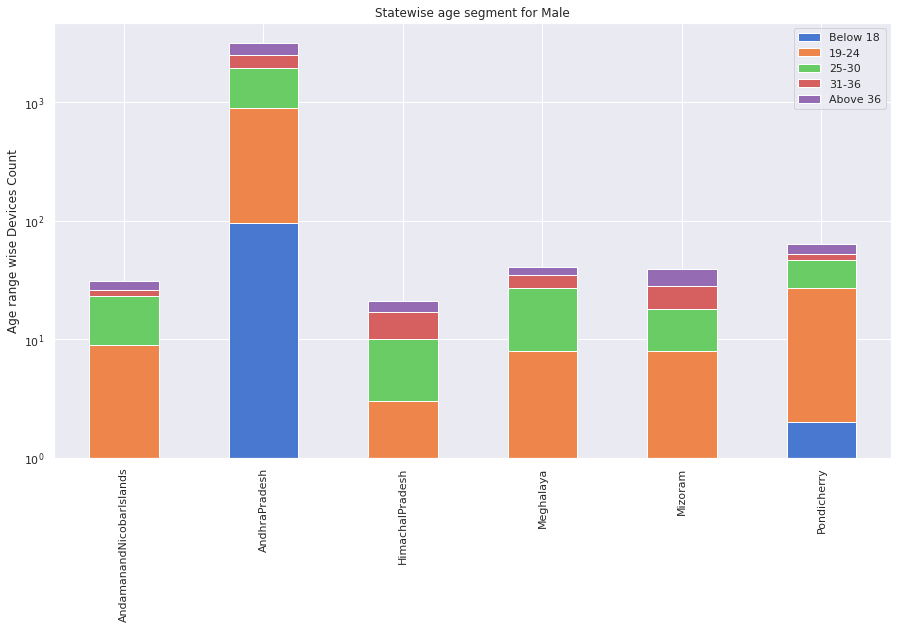

In [ ]:
    a=df31[(df31['age_range'] == 'Below 18') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    b=df31[(df31['age_range'] == '19-24') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    c=df31[(df31['age_range'] == '25-30') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    d=df31[(df31['age_range'] == '31-36') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    e=df31[(df31['age_range'] == 'Above 36') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
  
    
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Below 18' : a, '19-24' : b, '25-30' : c,'31-36' : d, 'Above 36' : e})
    ax1 = bd1.plot(kind='bar', stacked=True, log=True, legend='upper right',figsize=(15,8))
    #plt.xticks(np.arange(6),x)
    #plt.yticks(np.arange(0, 20000, 50))
    #plot.show(block=True)
    plt.ylabel('Age range wise Devices Count')
    plt.title('Statewise age segment for Male')

### Observation:

- HimachalPradesh, Mizoram and Andaman having no "Below 18" user, those age group can be targetted thru' promotional offer for E-learning platform etc. 

Text(0.5, 1.0, 'Statewise age segment for Female')

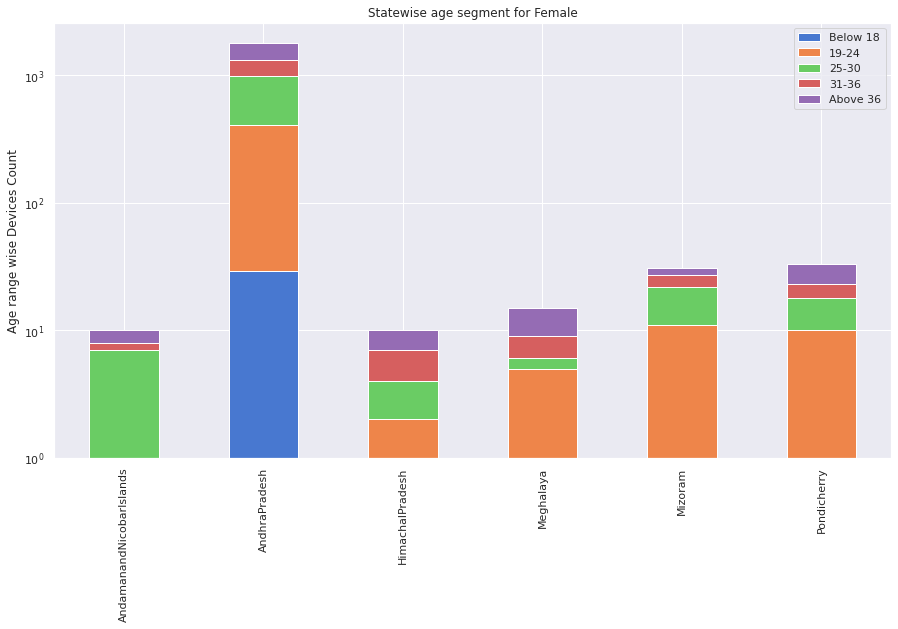

In [ ]:
    a=df31[(df31['age_range'] == 'Below 18') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    b=df31[(df31['age_range'] == '19-24') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    c=df31[(df31['age_range'] == '25-30') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    d=df31[(df31['age_range'] == '31-36') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    e=df31[(df31['age_range'] == 'Above 36') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
  
    
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Below 18' : a, '19-24' : b, '25-30' : c,'31-36' : d, 'Above 36' : e})
    ax1 = bd1.plot(kind='bar', stacked=True, log=True, legend='upper right',figsize=(15,8))
    #plt.xticks(np.arange(6),x)
    #plt.yticks(np.arange(0, 20000, 50))
    #plot.show(block=True)
    plt.ylabel('Age range wise Devices Count')
    plt.title('Statewise age segment for Female')

### Observation:

- Andaman has no Female user below 24 year age.

- All "Below 18" and "19-24" users can be targetted thru' promotional offer for E-learning platform etc. 

In [ ]:
most_brand.head(10)

,brand,eventcount
0,Xiaomi,1279
1,Samsung,1165
2,Huawei,861
3,vivo,482
4,OPPO,417
5,Meizu,320
6,Coolpad,234
7,HTC,71
8,Lenovo,67
9,LeTV,34


Text(0.5, 1.0, 'Statewise Top 10 brands')

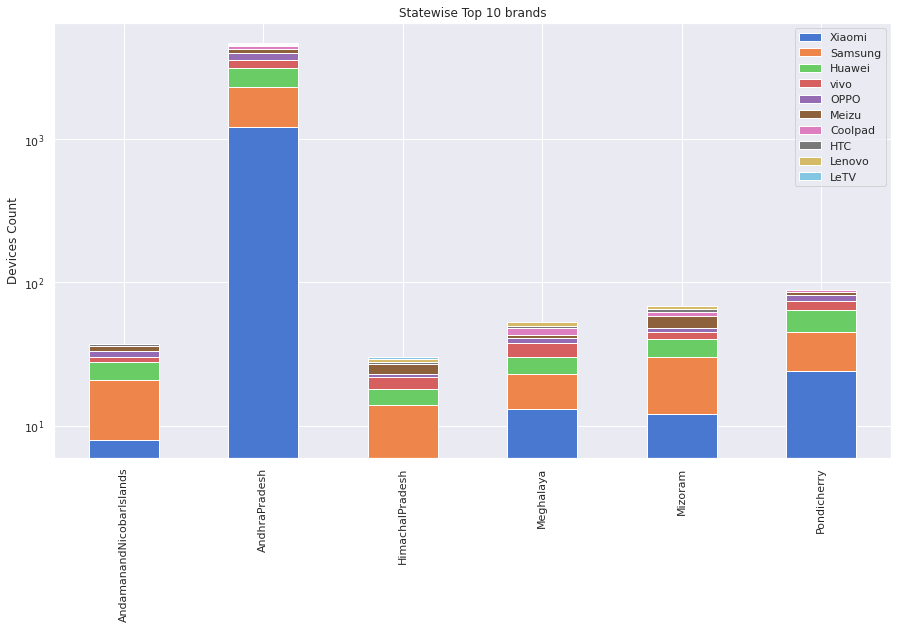

In [ ]:
    a=df31[df31['brand_eng'] == 'Xiaomi'].groupby(['state'])['device_id'].count()
    b=df31[df31['brand_eng'] == 'Samsung'].groupby(['state'])['device_id'].count()
    c=df31[df31['brand_eng'] == 'Huawei'].groupby(['state'])['device_id'].count()
    d=df31[df31['brand_eng'] == 'vivo'].groupby(['state'])['device_id'].count()
    e=df31[df31['brand_eng'] == 'OPPO'].groupby(['state'])['device_id'].count()
    f=df31[df31['brand_eng'] == 'Meizu'].groupby(['state'])['device_id'].count()
    g=df31[df31['brand_eng'] == 'Coolpad'].groupby(['state'])['device_id'].count()
    h=df31[df31['brand_eng'] == 'HTC'].groupby(['state'])['device_id'].count()
    i=df31[df31['brand_eng'] == 'Lenovo'].groupby(['state'])['device_id'].count()
    j=df31[df31['brand_eng'] == 'LeTV'].groupby(['state'])['device_id'].count()
    
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Xiaomi': a, 'Samsung' : b,'Huawei' : c,'vivo': d, 'OPPO' : e,'Meizu': f, 'Coolpad' : g,'HTC': h, 'Lenovo' : i,'LeTV': j})
    ax1 = bd1.plot(kind='bar', stacked=True, log=True, legend='upper right',figsize=(15,8))
    #plt.xticks(np.arange(6),x)
    #plt.yticks(np.arange(0, 20000, 50))
    #plot.show(block=True)
    plt.ylabel('Devices Count')
    plt.title('Statewise Top 10 brands')
    #plt.legend(['Xiaomi', 'Samsung' ,'Huawei' ,'vivo', 'OPPO' ,'Meizu', 'Coolpad','HTC', 'Lenovo' ,'LeTV' ])

### Observation:

- Bundled offer with respective top brands can be proposed for respective states. 

Text(0.5, 1.0, 'Statewise Top 10 brands - Male user')

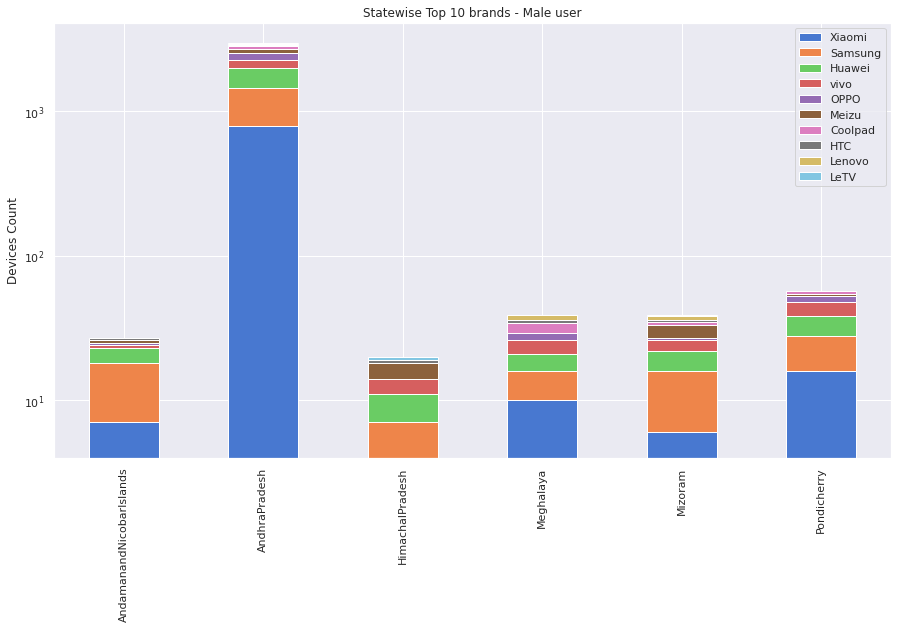

In [ ]:
    a=df31[(df31['brand_eng'] == 'Xiaomi') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    b=df31[(df31['brand_eng'] == 'Samsung') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    c=df31[(df31['brand_eng'] == 'Huawei') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    d=df31[(df31['brand_eng'] == 'vivo') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    e=df31[(df31['brand_eng'] == 'OPPO') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    f=df31[(df31['brand_eng'] == 'Meizu') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    g=df31[(df31['brand_eng'] == 'Coolpad') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    h=df31[(df31['brand_eng'] == 'HTC') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    i=df31[(df31['brand_eng'] == 'Lenovo') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    j=df31[(df31['brand_eng'] == 'LeTV') & (df31['gender'] == 'M')].groupby(['state'])['device_id'].count()
    
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Xiaomi': a, 'Samsung' : b,'Huawei' : c,'vivo': d, 'OPPO' : e,'Meizu': f, 'Coolpad' : g,'HTC': h, 'Lenovo' : i,'LeTV': j})
    ax1 = bd1.plot(kind='bar', stacked=True, log=True, legend='upper right',figsize=(15,8))
    #plt.xticks(np.arange(6),x)
    #plt.yticks(np.arange(0, 20000, 50))
    #plot.show(block=True)
    plt.ylabel('Devices Count')
    plt.title('Statewise Top 10 brands - Male user')
    #plt.legend(['Xiaomi', 'Samsung' ,'Huawei' ,'vivo', 'OPPO' ,'Meizu', 'Coolpad','HTC', 'Lenovo' ,'LeTV' ])

Text(0.5, 1.0, 'Statewise Top 10 brands - Female user')

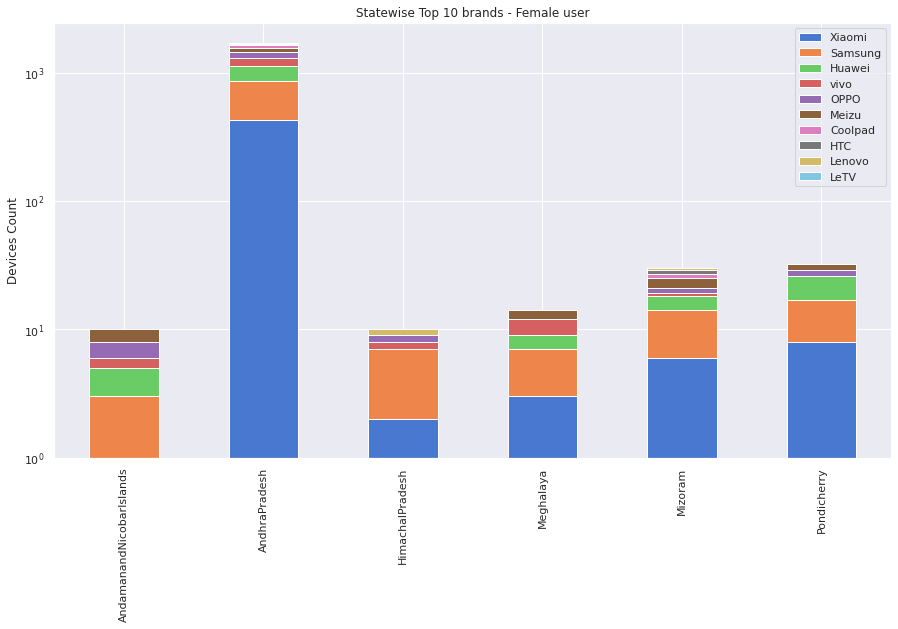

In [ ]:
    a=df31[(df31['brand_eng'] == 'Xiaomi') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    b=df31[(df31['brand_eng'] == 'Samsung') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    c=df31[(df31['brand_eng'] == 'Huawei') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    d=df31[(df31['brand_eng'] == 'vivo') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    e=df31[(df31['brand_eng'] == 'OPPO') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    f=df31[(df31['brand_eng'] == 'Meizu') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    g=df31[(df31['brand_eng'] == 'Coolpad') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    h=df31[(df31['brand_eng'] == 'HTC') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    i=df31[(df31['brand_eng'] == 'Lenovo') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    j=df31[(df31['brand_eng'] == 'LeTV') & (df31['gender'] == 'F')].groupby(['state'])['device_id'].count()
    
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Xiaomi': a, 'Samsung' : b,'Huawei' : c,'vivo': d, 'OPPO' : e,'Meizu': f, 'Coolpad' : g,'HTC': h, 'Lenovo' : i,'LeTV': j})
    ax1 = bd1.plot(kind='bar', stacked=True, log=True, legend='upper right',figsize=(15,8))
    #plt.xticks(np.arange(6),x)
    #plt.yticks(np.arange(0, 20000, 50))
    #plot.show(block=True)
    plt.ylabel('Devices Count')
    plt.title('Statewise Top 10 brands - Female user')
    #plt.legend(['Xiaomi', 'Samsung' ,'Huawei' ,'vivo', 'OPPO' ,'Meizu', 'Coolpad','HTC', 'Lenovo' ,'LeTV' ])

Text(0.5, 1.0, 'Age segment wise Top 10 brands')

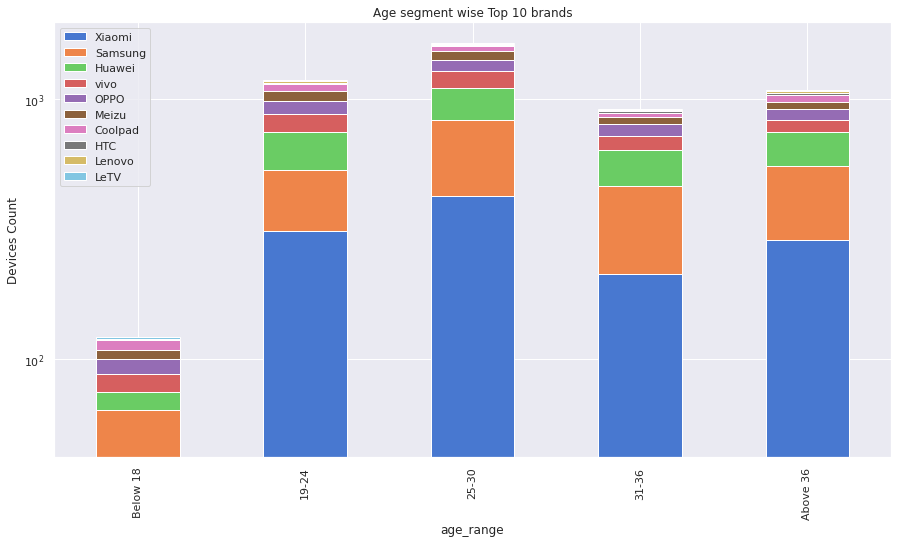

In [ ]:
    a=df31[df31['brand_eng'] == 'Xiaomi'].groupby(['age_range'])['device_id'].count()
    b=df31[df31['brand_eng'] == 'Samsung'].groupby(['age_range'])['device_id'].count()
    c=df31[df31['brand_eng'] == 'Huawei'].groupby(['age_range'])['device_id'].count()
    d=df31[df31['brand_eng'] == 'vivo'].groupby(['age_range'])['device_id'].count()
    e=df31[df31['brand_eng'] == 'OPPO'].groupby(['age_range'])['device_id'].count()
    f=df31[df31['brand_eng'] == 'Meizu'].groupby(['age_range'])['device_id'].count()
    g=df31[df31['brand_eng'] == 'Coolpad'].groupby(['age_range'])['device_id'].count()
    h=df31[df31['brand_eng'] == 'HTC'].groupby(['age_range'])['device_id'].count()
    i=df31[df31['brand_eng'] == 'Lenovo'].groupby(['age_range'])['device_id'].count()
    j=df31[df31['brand_eng'] == 'LeTV'].groupby(['age_range'])['device_id'].count()
    
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Xiaomi': a, 'Samsung' : b,'Huawei' : c,'vivo': d, 'OPPO' : e,'Meizu': f, 'Coolpad' : g,'HTC': h, 'Lenovo' : i,'LeTV': j})
    ax1 = bd1.plot(kind='bar', stacked=True, log=True, legend='upper right',figsize=(15,8))
    #plt.xticks(np.arange(6),x)
    #plt.yticks(np.arange(0, 20000, 50))
    #plot.show(block=True)
    plt.ylabel('Devices Count')
    plt.title('Age segment wise Top 10 brands')
    #plt.legend(['Xiaomi', 'Samsung' ,'Huawei' ,'vivo', 'OPPO' ,'Meizu', 'Coolpad','HTC', 'Lenovo' ,'LeTV' ])

Text(0.5, 1.0, 'Age segment wise Top 10 brands - Male users')

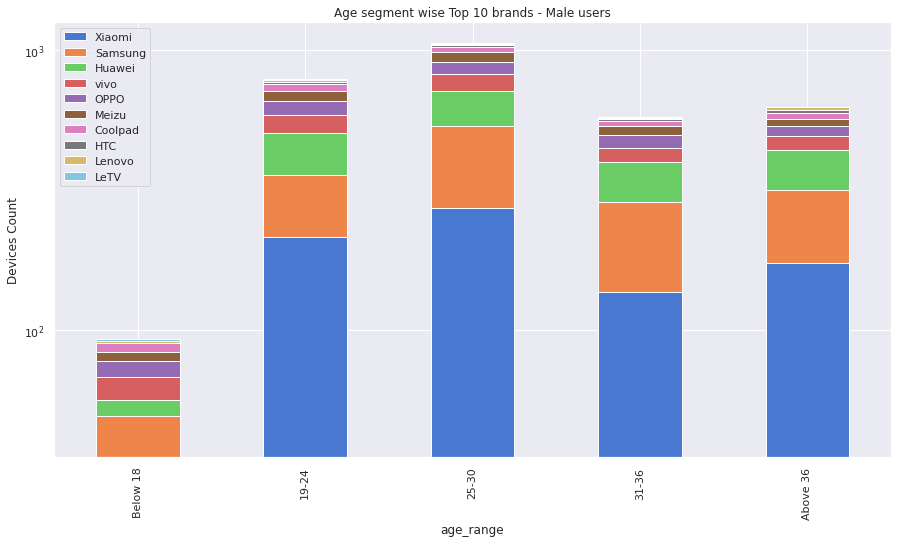

In [ ]:
    a=df31[(df31['brand_eng'] == 'Xiaomi') & (df31['gender'] == 'M')].groupby(['age_range'])['device_id'].count()
    b=df31[(df31['brand_eng'] == 'Samsung') & (df31['gender'] == 'M')].groupby(['age_range'])['device_id'].count()
    c=df31[(df31['brand_eng'] == 'Huawei') & (df31['gender'] == 'M')].groupby(['age_range'])['device_id'].count()
    d=df31[(df31['brand_eng'] == 'vivo') & (df31['gender'] == 'M')].groupby(['age_range'])['device_id'].count()
    e=df31[(df31['brand_eng'] == 'OPPO') & (df31['gender'] == 'M')].groupby(['age_range'])['device_id'].count()
    f=df31[(df31['brand_eng'] == 'Meizu') & (df31['gender'] == 'M')].groupby(['age_range'])['device_id'].count()
    g=df31[(df31['brand_eng'] == 'Coolpad') & (df31['gender'] == 'M')].groupby(['age_range'])['device_id'].count()
    h=df31[(df31['brand_eng'] == 'HTC') & (df31['gender'] == 'M')].groupby(['age_range'])['device_id'].count()
    i=df31[(df31['brand_eng'] == 'Lenovo') & (df31['gender'] == 'M')].groupby(['age_range'])['device_id'].count()
    j=df31[(df31['brand_eng'] == 'LeTV') & (df31['gender'] == 'M')].groupby(['age_range'])['device_id'].count()
    
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Xiaomi': a, 'Samsung' : b,'Huawei' : c,'vivo': d, 'OPPO' : e,'Meizu': f, 'Coolpad' : g,'HTC': h, 'Lenovo' : i,'LeTV': j})
    ax1 = bd1.plot(kind='bar', stacked=True, log=True, legend='upper right',figsize=(15,8))
    #plt.xticks(np.arange(6),x)
    #plt.yticks(np.arange(0, 20000, 50))
    #plot.show(block=True)
    plt.ylabel('Devices Count')
    plt.title('Age segment wise Top 10 brands - Male users')
    #plt.legend(['Xiaomi', 'Samsung' ,'Huawei' ,'vivo', 'OPPO' ,'Meizu', 'Coolpad','HTC', 'Lenovo' ,'LeTV' ])

Text(0.5, 1.0, 'Age segment wise Top 10 brands - Female users')

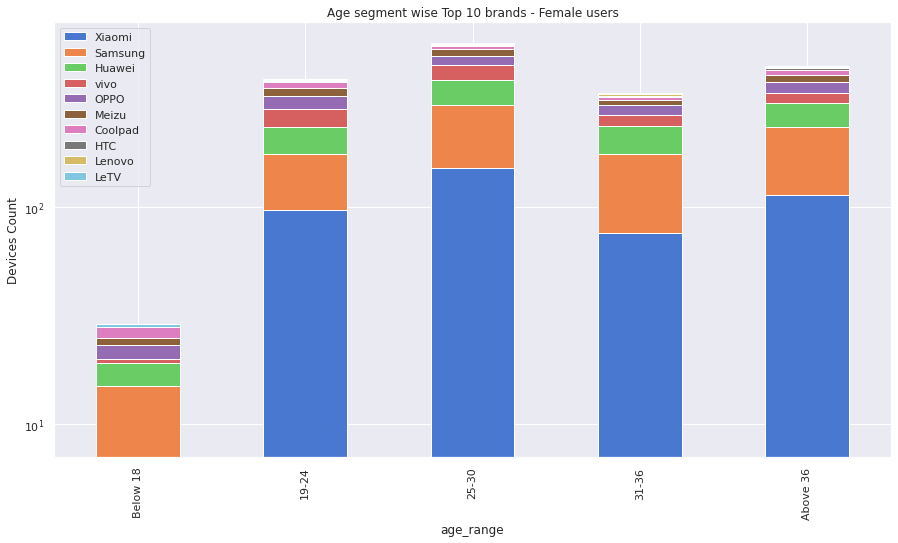

In [ ]:
    a=df31[(df31['brand_eng'] == 'Xiaomi') & (df31['gender'] == 'F')].groupby(['age_range'])['device_id'].count()
    b=df31[(df31['brand_eng'] == 'Samsung') & (df31['gender'] == 'F')].groupby(['age_range'])['device_id'].count()
    c=df31[(df31['brand_eng'] == 'Huawei') & (df31['gender'] == 'F')].groupby(['age_range'])['device_id'].count()
    d=df31[(df31['brand_eng'] == 'vivo') & (df31['gender'] == 'F')].groupby(['age_range'])['device_id'].count()
    e=df31[(df31['brand_eng'] == 'OPPO') & (df31['gender'] == 'F')].groupby(['age_range'])['device_id'].count()
    f=df31[(df31['brand_eng'] == 'Meizu') & (df31['gender'] == 'F')].groupby(['age_range'])['device_id'].count()
    g=df31[(df31['brand_eng'] == 'Coolpad') & (df31['gender'] == 'F')].groupby(['age_range'])['device_id'].count()
    h=df31[(df31['brand_eng'] == 'HTC') & (df31['gender'] == 'F')].groupby(['age_range'])['device_id'].count()
    i=df31[(df31['brand_eng'] == 'Lenovo') & (df31['gender'] == 'F')].groupby(['age_range'])['device_id'].count()
    j=df31[(df31['brand_eng'] == 'LeTV') & (df31['gender'] == 'F')].groupby(['age_range'])['device_id'].count()
    
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Xiaomi': a, 'Samsung' : b,'Huawei' : c,'vivo': d, 'OPPO' : e,'Meizu': f, 'Coolpad' : g,'HTC': h, 'Lenovo' : i,'LeTV': j})
    ax1 = bd1.plot(kind='bar', stacked=True, log=True, legend='upper right',figsize=(15,8))
    #plt.xticks(np.arange(6),x)
    #plt.yticks(np.arange(0, 20000, 50))
    #plot.show(block=True)
    plt.ylabel('Devices Count')
    plt.title('Age segment wise Top 10 brands - Female users')
    #plt.legend(['Xiaomi', 'Samsung' ,'Huawei' ,'vivo', 'OPPO' ,'Meizu', 'Coolpad','HTC', 'Lenovo' ,'LeTV' ])

Text(0, 0.5, 'Model Count')

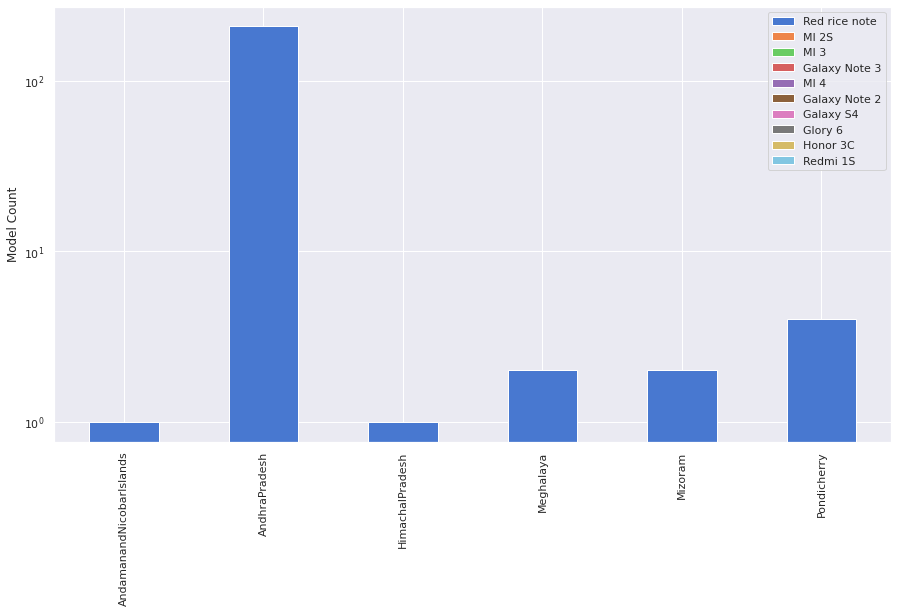

In [ ]:
    a=df31[df31['model_eng'] == 'Red rice note'].groupby(['state'])['device_id'].count()
    b=df31[df31['brand_eng'] == 'MI 2S'].groupby(['state'])['device_id'].count()
    c=df31[df31['brand_eng'] == 'MI 3'].groupby(['state'])['device_id'].count()
    d=df31[df31['brand_eng'] == 'Galaxy Note 3'].groupby(['state'])['device_id'].count()
    e=df31[df31['brand_eng'] == 'MI 4'].groupby(['state'])['device_id'].count()
    f=df31[df31['brand_eng'] == 'Galaxy Note 2'].groupby(['state'])['device_id'].count()
    g=df31[df31['brand_eng'] == 'Galaxy S4'].groupby(['state'])['device_id'].count()
    h=df31[df31['brand_eng'] == 'Glory 6'].groupby(['state'])['device_id'].count()
    i=df31[df31['brand_eng'] == 'Honor 3C'].groupby(['state'])['device_id'].count()
    j=df31[df31['brand_eng'] == 'Redmi 1S'].groupby(['state'])['device_id'].count()
    
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Red rice note': a, 'MI 2S' : b, 'MI 3' : c, 'Galaxy Note 3': d, 'MI 4' : e,
       'Galaxy Note 2': f, 'Galaxy S4': g, 'Glory 6' : h, 'Honor 3C': i, 'Redmi 1S': j})
    ax1 = bd1.plot(kind='bar', stacked=True, log= True, legend='upper right',figsize=(15,8))
    #plt.xticks(np.arange(6),x)
    #plt.yticks(np.arange(0, 20000, 50))
    #plot.show(block=True)
    plt.ylabel('Model Count')
    #plt.legend(['Xiaomi', 'Samsung' ,'Huawei' ,'vivo', 'OPPO' ,'Meizu', 'Coolpad','HTC', 'Lenovo' ,'LeTV' ])

Text(0, 0.5, 'Model Count')

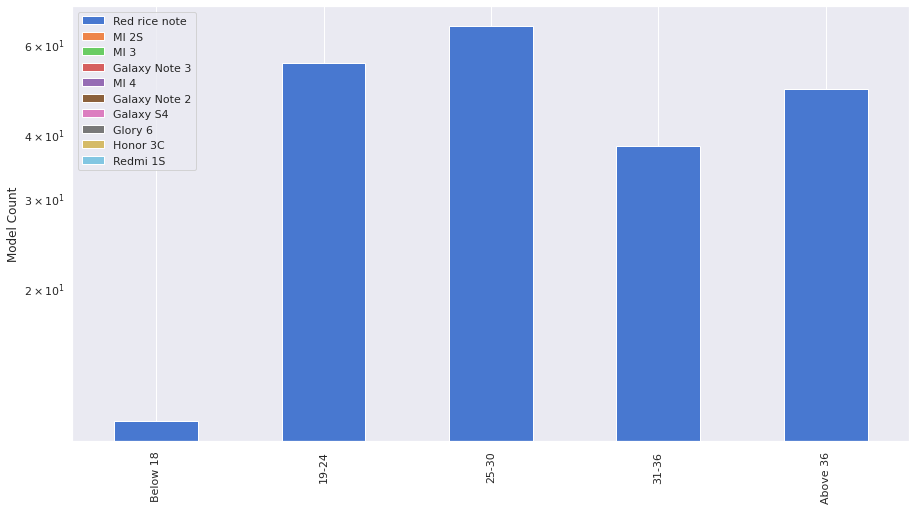

In [ ]:
    a=df31[df31['model_eng'] == 'Red rice note'].groupby(['age_range'])['device_id'].count()
    b=df31[df31['brand_eng'] == 'MI 2S'].groupby(['state'])['age_range'].count()
    c=df31[df31['brand_eng'] == 'MI 3'].groupby(['state'])['age_range'].count()
    d=df31[df31['brand_eng'] == 'Galaxy Note 3'].groupby(['age_range'])['device_id'].count()
    e=df31[df31['brand_eng'] == 'MI 4'].groupby(['state'])['age_range'].count()
    f=df31[df31['brand_eng'] == 'Galaxy Note 2'].groupby(['age_range'])['device_id'].count()
    g=df31[df31['brand_eng'] == 'Galaxy S4'].groupby(['age_range'])['device_id'].count()
    h=df31[df31['brand_eng'] == 'Glory 6'].groupby(['age_range'])['device_id'].count()
    i=df31[df31['brand_eng'] == 'Honor 3C'].groupby(['age_range'])['device_id'].count()
    j=df31[df31['brand_eng'] == 'Redmi 1S'].groupby(['age_range'])['device_id'].count()
    
    x=sorted(df31['state'].unique())
    bd1= pd.DataFrame({'Red rice note': a, 'MI 2S' : b, 'MI 3' : c, 'Galaxy Note 3': d, 'MI 4' : e,
       'Galaxy Note 2': f, 'Galaxy S4': g, 'Glory 6' : h, 'Honor 3C': i, 'Redmi 1S': j})
    ax1 = bd1.plot(kind='bar', stacked=True, log= True, legend='upper right',figsize=(15,8))
    #plt.xticks(np.arange(6),x)
    #plt.yticks(np.arange(0, 20000, 50))
    #plot.show(block=True)
    plt.ylabel('Model Count')
    #plt.legend(['Xiaomi', 'Samsung' ,'Huawei' ,'vivo', 'OPPO' ,'Meizu', 'Coolpad','HTC', 'Lenovo' ,'LeTV' ])

In [ ]:
city_all = pd.DataFrame(df31.groupby(['city','latitude','longitude'])['device_id'].count())
city_all.reset_index(inplace=True)
city_all

,city,latitude,longitude,device_id
0,Adilabad,19.691264,78.561122,1
1,Adilabad,19.696114,78.553230,1
2,Adilabad,19.699094,78.620733,1
3,Adilabad,19.701858,78.582543,1
4,Adilabad,19.704079,78.585136,1
...,...,...,...,...
5218,Yemmiganur,15.823326,77.573589,1
5219,Yemmiganur,15.824032,77.531712,1
5220,Yemmiganur,15.827393,77.558456,1
5221,Yemmiganur,15.828102,77.563845,1


In [ ]:
data = [go.Scattergeo(lon=city_all['longitude'], 
                              lat=city_all['latitude'], 
                              text=city_all['city'], name='',
                              marker=dict(size=city_all['device_id']*6, color='Green'))]

In [ ]:
layout = go.Layout(title=go.layout.Title(text='Device count among cities'), showlegend=False,
                   geo=go.layout.Geo(resolution=110, scope='asia', showframe=False, showcoastlines=True,
                                     landcolor="rgb(229, 229, 229)", countrycolor="blue", coastlinecolor="pink"))

In [ ]:
fig = go.Figure(data=data, layout=layout)

In [ ]:
fig.add_trace(go.Scattergeo(lon=[81.8463], lat=[25.4358], text=['India'], mode='text', showlegend=False, geo='geo'))

### Observation:

- Active device locations can be observed over India map. 

<a id=section5.3.6></a>
## 5.3.6 Summary: Correlation among all the columns:





In [ ]:
match_df_new=df31.copy()
match_df_new.drop(['state_geo'], axis=1,inplace=True)
match_df_new.drop(['Date_Time'], axis=1,inplace=True)
match_df_new.head(2)

,event_id,device_id,longitude,latitude,city,state,Day,Day_number,Time,gender,age,brand_eng,model_eng,age_range
0,1078723,-512424213979236423,83.398244,17.768149,Visakhapatnam,AndhraPradesh,Monday,0,2,M,31,Xiaomi,MI 2A,31-36
1,280014,-8879643774076165575,78.155397,16.390327,Wanparti,AndhraPradesh,Thursday,3,13,M,34,Samsung,Galaxy On7,31-36


In [ ]:
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in match_df_new.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    match_df_new[i] = number.fit_transform(match_df_new[i].astype('str'))

In [ ]:
match_df_new.head(3)

,event_id,device_id,longitude,latitude,city,state,Day,Day_number,Time,gender,age,brand_eng,model_eng,age_range
0,115,1293,4894,3336,107,1,1,0,12,1,20,63,382,2
1,3167,2491,609,1339,110,1,4,3,5,1,23,55,262,2
2,2321,1611,4588,4369,107,1,4,3,3,1,19,28,408,1


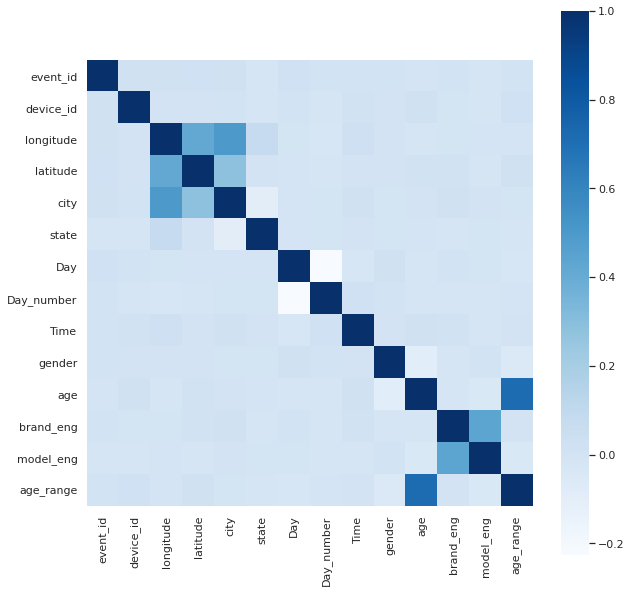

In [ ]:
features_correlation = match_df_new.corr()
plt.figure(figsize=(10,10))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

### Observation:

Columns are not correlated much. 

<a id=section6></a>
## 6 Conclusions:






- **20-25 and 25-30 age** groups are mostly uses the devices (multiple times).  
- Mostly the devices are being used (multiple times) during **morning 8-11 AM and evening during 7-9 PM**.
- The devices are being used **uniformly throughout the week**.
- **Visakhapatnam** has most users (multiple times)
- **Andaman & Pondicherry** have saddle curve for **weekday calling**, mostly attributed for **dissimilar call habits** between **Male and Female users**.
- No such specific pattern observed for **Weekday/weekend with the Gender and Age**.
- HimachalPradesh and Andaman have only city Shimla and PortBlair respectively for the user and Meghalaya & Mizoram are having two cities each , Pondicherry has users from three cities, whereas **AndhraPradesh** is having **104 cities** among which **Visakhapatnam holds 31% users**.
- **Andaman** has no **Female user below 24 year** age.

<a id=section6.1></a>
## 6.1 Actionable Insights:





- **Mizoram, Meghalaya and HimachalPradesh** to be considered for **promotional event** for **young group** of people.
- **Mizoram, HimachalPradesh** to be also considered for **"Female" focused promotional event**.
- **Mizoram and HimachalPradesh** users mostly talk/call during **weekday-1 (Tuesday) and weekday-2 (Wenesday)**, so **weekend based "special" offer** may be proposed to them.
- **Pondicherry and Meghalaya** most events occured during **weekend**; **weekday "special tariff program"** may be proposed to engage more user.
- **Andaman (Male)** users can be specifically focused for **weekend offer**.
- **Mizoram** users are rarely uses during day time so **promotional event considering business hours** can be benefacial for Mizoram.
- **Special tariff** for **night calling** may be helpful for all **6 states**.
- **Bundled offer** along with those **top 10 brands new phone** purchase will significantly generate revenue for **InsaidTelecom**.
- **AndhraPradesh** might be be having good infrastructure hence state specific special offer might influence more users with less efforts.
- All **"Below 18" and "19-24"** users can be targetted thru' **promotional offer** for **E-learning platform** etc.

<a id=section6.2></a>
## 6.2 Limitation of the study:





- The study has been **solely carried out over data set of device usage** of **user including phone brand, model, age & call time information**. Hence, it **does not contain** any **financial analysis** of the **InsaidTelecom**.


<img src="https://github.com/pathakchiranjit/Capstone_CDF_April21/blob/main/Picture/summary.png?raw=true" align='left'><br/>